# Churn Prediction 

In [637]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [638]:
train = pd.read_csv('C:/Users/calca/Downloads/ml_case_training_data (1).csv')

In [639]:
train_hist = pd.read_csv('C:/Users/calca/Downloads/ml_case_training_hist_data (1).csv')
train_target =  pd.read_csv('C:/Users/calca/Downloads/ml_case_training_output (1).csv')

In [640]:
train_hist=train_hist.pivot(index='id', columns='price_date', values=["price_p1_var","price_p2_var","price_p3_var","price_p1_fix","price_p2_fix",'price_p3_fix'])

In [641]:
df = pd.merge(train,
                  train_hist,
                  on=['id'],
                  how='inner')

train = pd.merge(df,
                  train_target,
                  on=['id'],
                  how='inner')

merging between different levels can give an unintended result (1 levels on the left,2 on the right)


In [642]:
train['churn'].value_counts()

0    14501
1     1595
Name: churn, dtype: int64

## Data visualization

In [359]:
def plot_stacked_bars(dataframe, title_, size_=(20, 12), rot_=0, legend_="upper right"):
    ax = dataframe.plot(kind="bar",
    stacked=True,
    figsize=size_,
    rot=rot_,
    title=title_)
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=15):
    for p in ax.patches:
        value = str(round(p.get_height(),1))
        if value == '0.0':
            continue
    ax.annotate(value,
            ((p.get_x()+ p.get_width()/2)*pad, (p.get_y()+p.get_height()/2)*pad),
                color=colour,size=textsize)


In [360]:
churn = train[["id","churn"]]
churn.columns = ["Companies", "churn"]


In [361]:
churn_total = churn.groupby(churn["churn"]).count()
churn_percentage = churn_total/churn_total.sum()*100

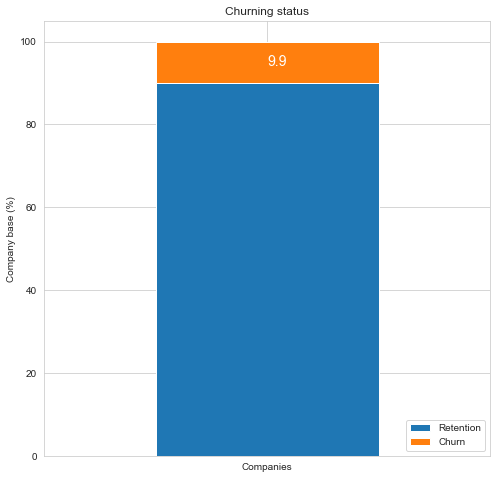

In [362]:
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (8,8), legend_="lower right")


In [363]:
activity = train[["id","activity_new", "churn"]]

In [364]:
activity = activity.groupby([activity["activity_new"],
                             activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0], ascending=False)

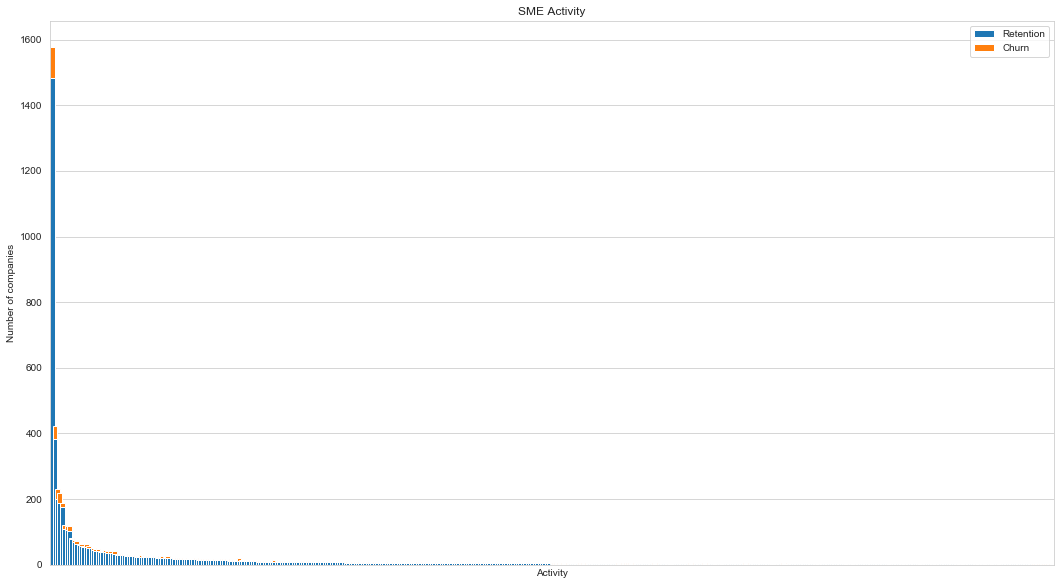

In [366]:
activity.plot(kind="bar",
figsize=(18, 10),
width=2,
stacked=True,
title="SME Activity")
# Labels
plt.ylabel("Number of companies")
plt.xlabel("Activity")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Remove the label for the xticks as the categories are encoded and we can't draw any meaning from them yet
plt.xticks([])
plt.show()


In [367]:
activity_total = activity.fillna(0)[0]+activity.fillna(0)[1]
activity_percentage = activity.fillna(0)[1]/(activity_total)*100
pd.DataFrame({"Percentage churn": activity_percentage,
 "Total companies": activity_total }).sort_values(by="Percentage churn",
 ascending=False).head(10)

,Percentage churn,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


In [369]:
channel = train[["id","channel_sales", "churn"]]


In [370]:
channel = channel.groupby([channel["channel_sales"],
 channel["churn"]])["id"].count().unstack(level=1).fillna(0)

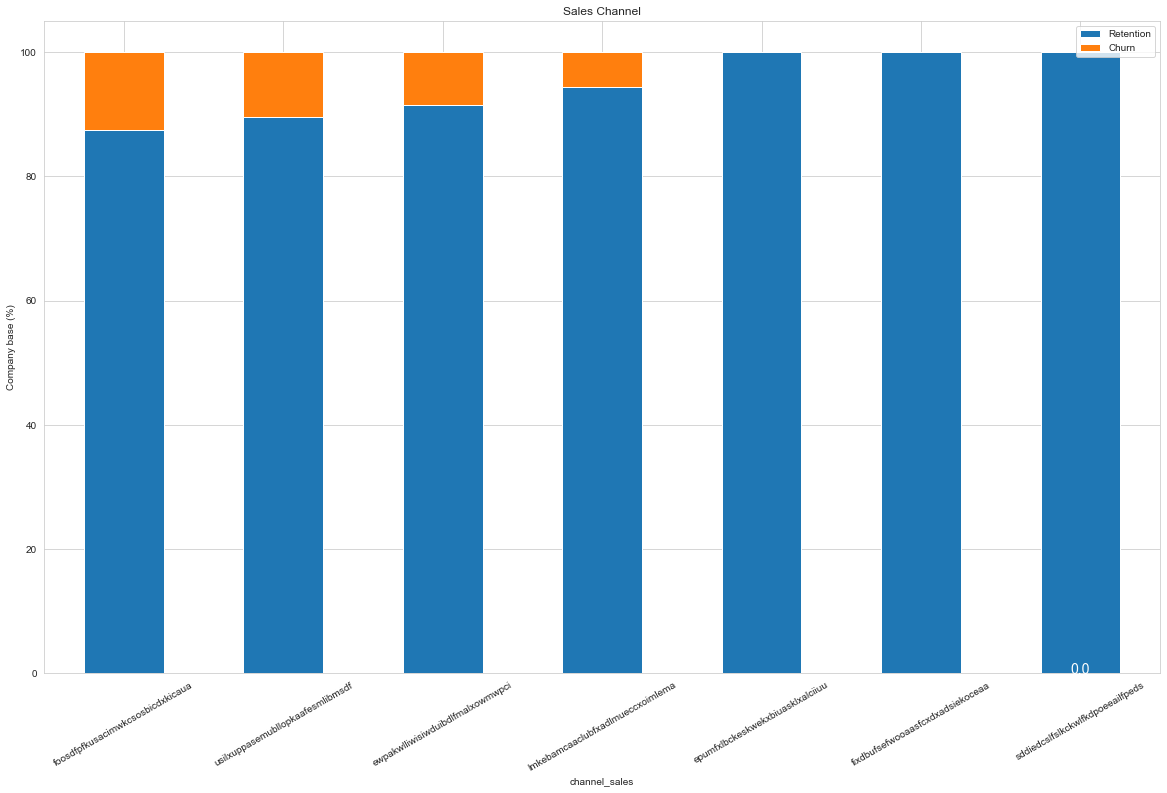

In [371]:
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

In [372]:
channel_total = channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage = channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn percentage": channel_percentage,
 "Total companies": channel_total }).sort_values(by="Churn percentage",
 ascending=False).head(10)


,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


In [373]:
consumption = train[["id","cons_12m", "cons_gas_12m","cons_last_month", "imp_cons", "has_gas", "churn"]]


In [374]:
def plot_distribution(dataframe, column, ax, bins_=50):
 """
 Plot variable distirbution in a stacked histogram of churned or retained company
 """
 # Create a temporal dataframe with the data to be plot
 temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
 "Churn":dataframe[dataframe["churn"]==1][column]})
 # Plot the histogram
 temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
 # X-axis label
 ax.set_xlabel(column)
 # Change the x-axis to plain style
 ax.ticklabel_format(style='plain', axis='x')

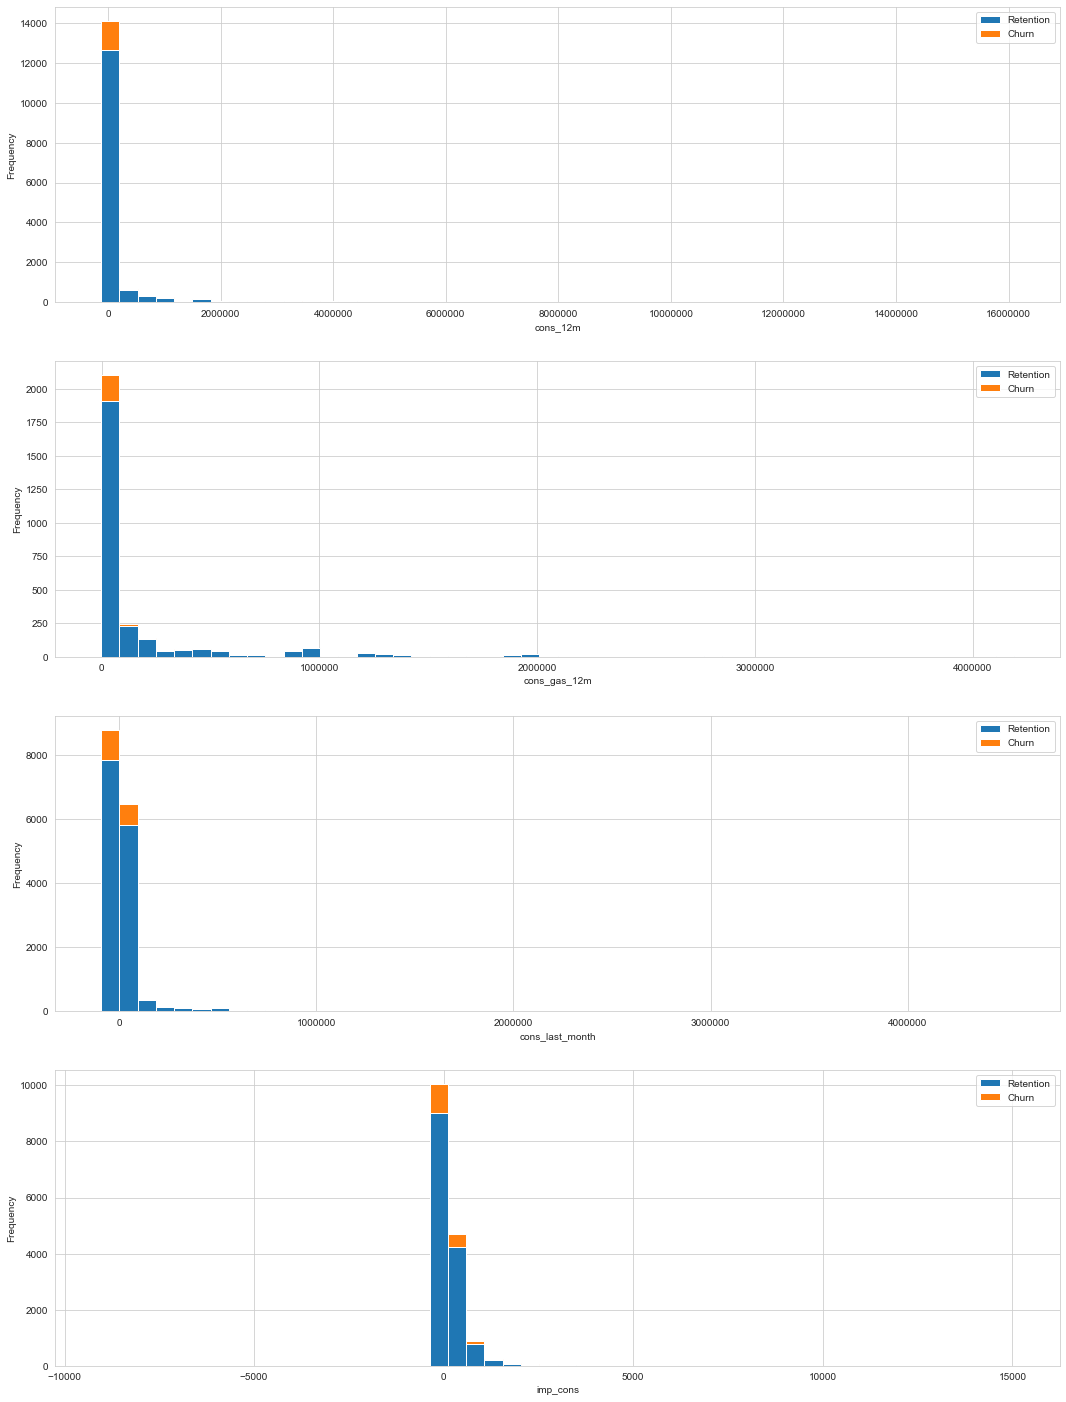

In [375]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
plot_distribution(consumption, "cons_12m", axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"] == "t"], "cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

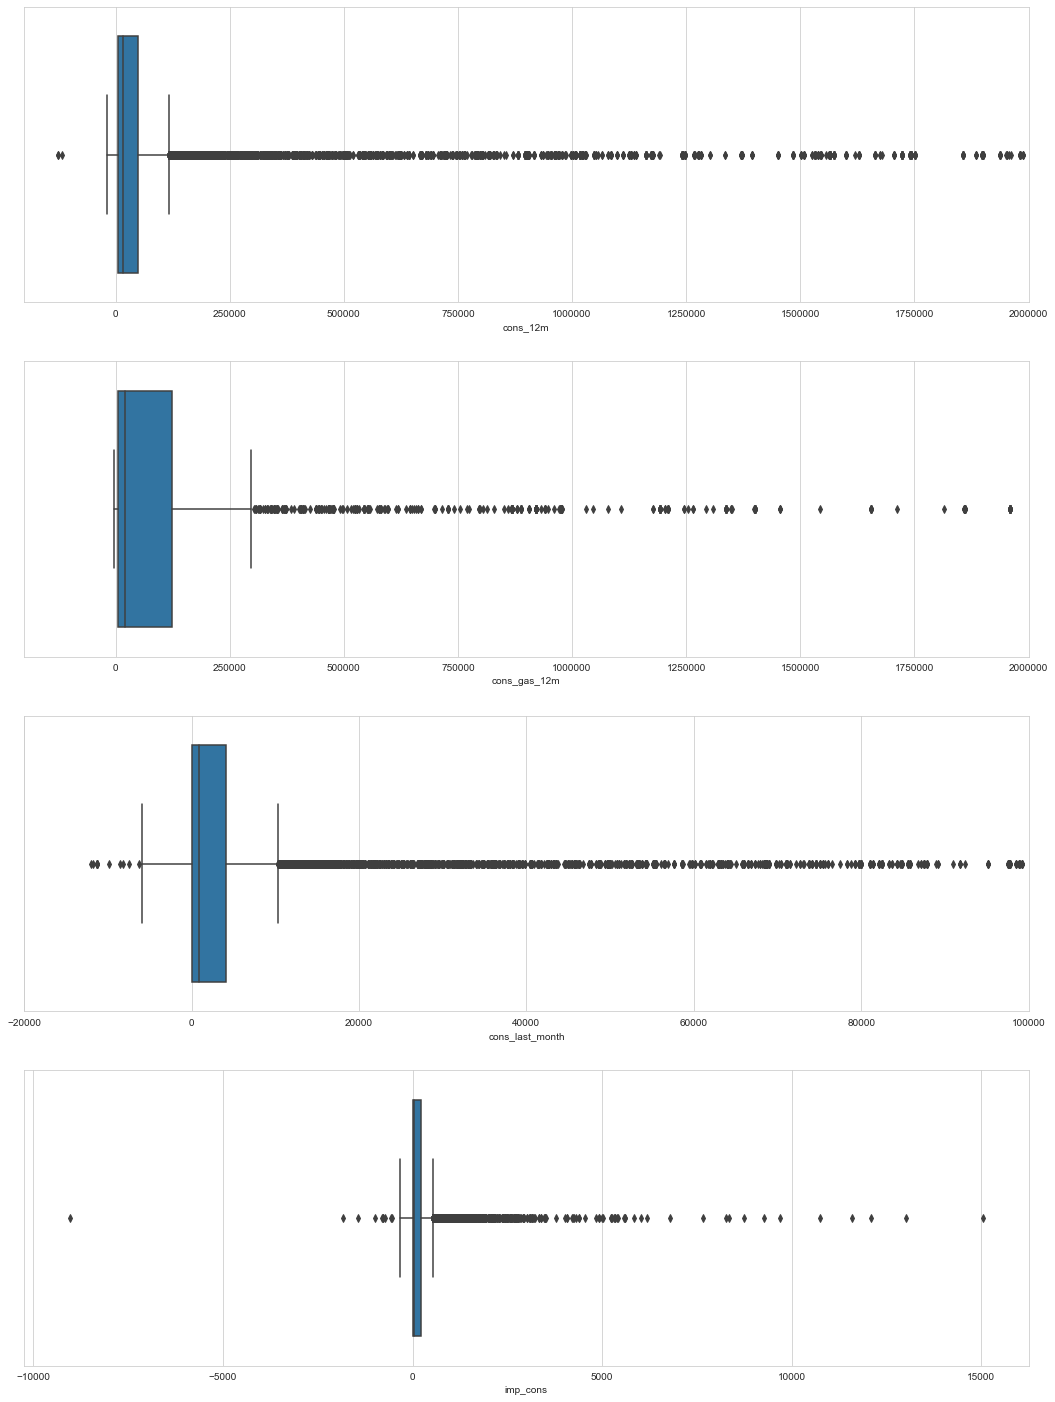

In [377]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])
# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
# Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

In [378]:
dates = train[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()
dates["date_activ"] = pd.to_datetime(dates["date_activ"], format='%Y-%m-%d')
dates["date_end"] = pd.to_datetime(dates["date_end"], format='%Y-%m-%d')
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format='%Y-%m-%d')
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format='%Y-%m-%d')


In [381]:
def plot_dates(dataframe, column, fontsize_=12):
 """
 Plot monthly churn and retention distribution
 """
 # Group by month
 temp = dataframe[[column,"churn","id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
 # Plot
 ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0)
 # Change x-axis labels to months
 ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
 # Change xlabel size
 plt.xticks(fontsize=fontsize_)
 # Rename y-axis
 plt.ylabel("Number of companies")
 # Rename legend
 plt.legend(["Retention", "Churn"], loc="upper right")
 plt.show()
    
    
    
def line_format(label):
 """
 Convert time label to the format of pandas line plot
 """
 month = label.month_name()[:1]
 if label.month_name() == "January":
    month += f'\n{label.year}'
 return month


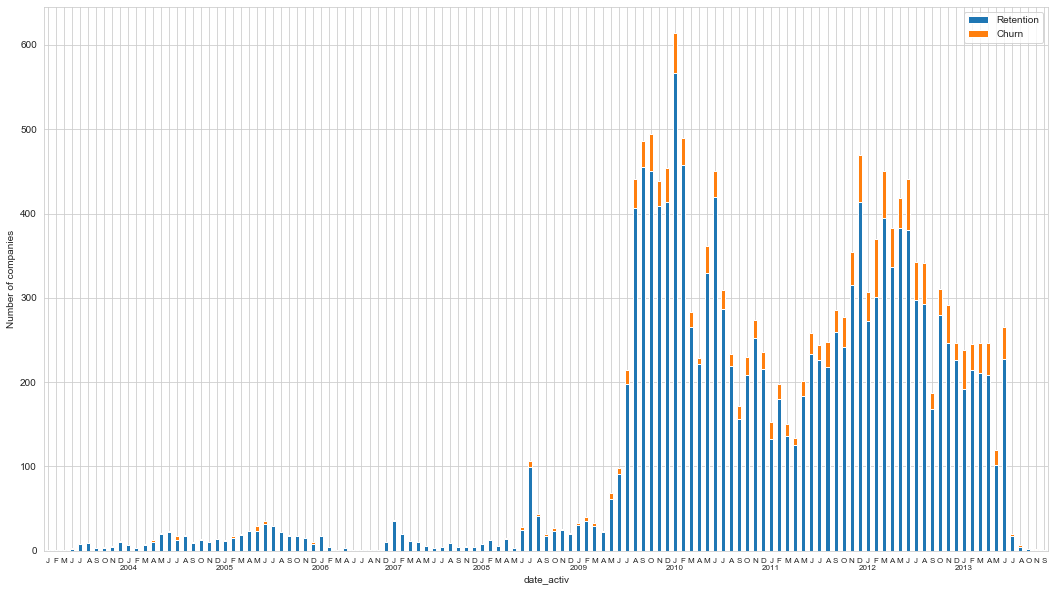

In [382]:
plot_dates(dates, "date_activ", fontsize_=8)

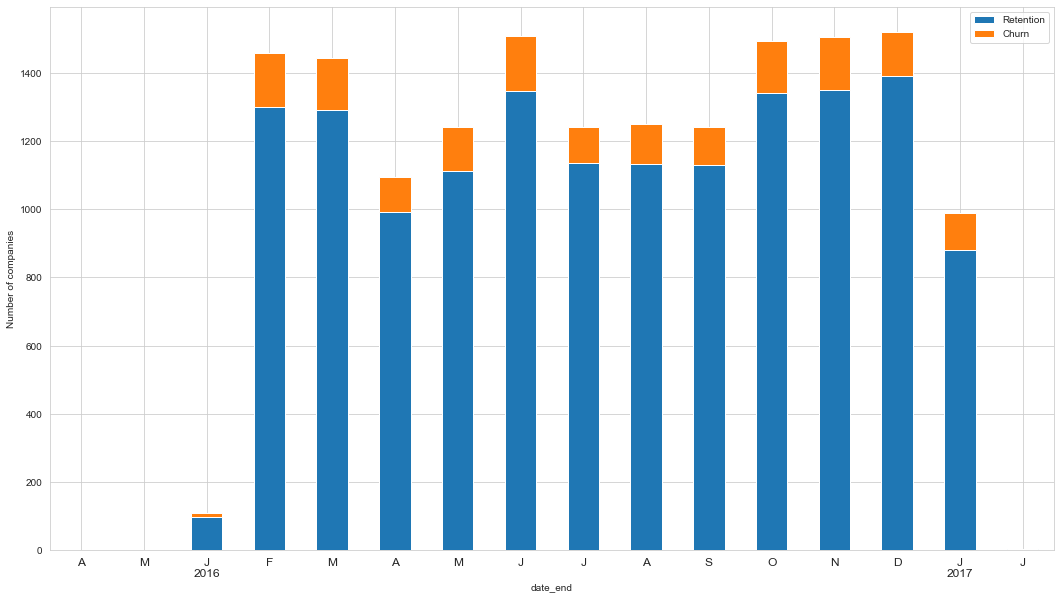

In [383]:
plot_dates(dates, "date_end")

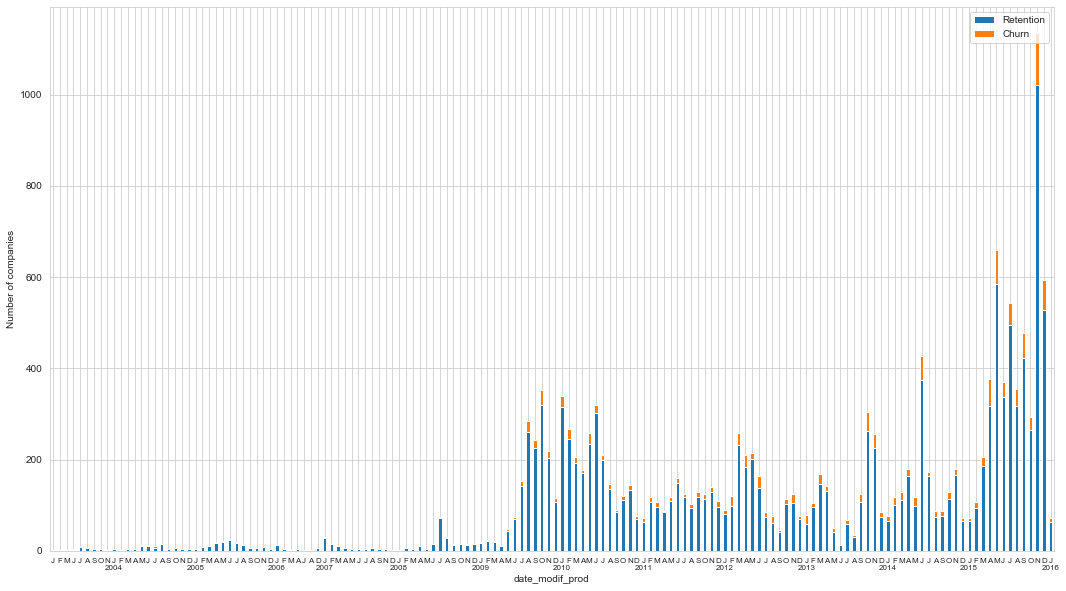

In [384]:
plot_dates(dates, "date_modif_prod", fontsize_=8)

In [385]:
forecast = train[["id","forecast_base_bill_ele","forecast_base_bill_year",
 "forecast_bill_12m","forecast_cons","forecast_cons_12m",
 "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
 "forecast_price_energy_p1","forecast_price_energy_p2",
 "forecast_price_pow_p1","churn"]]

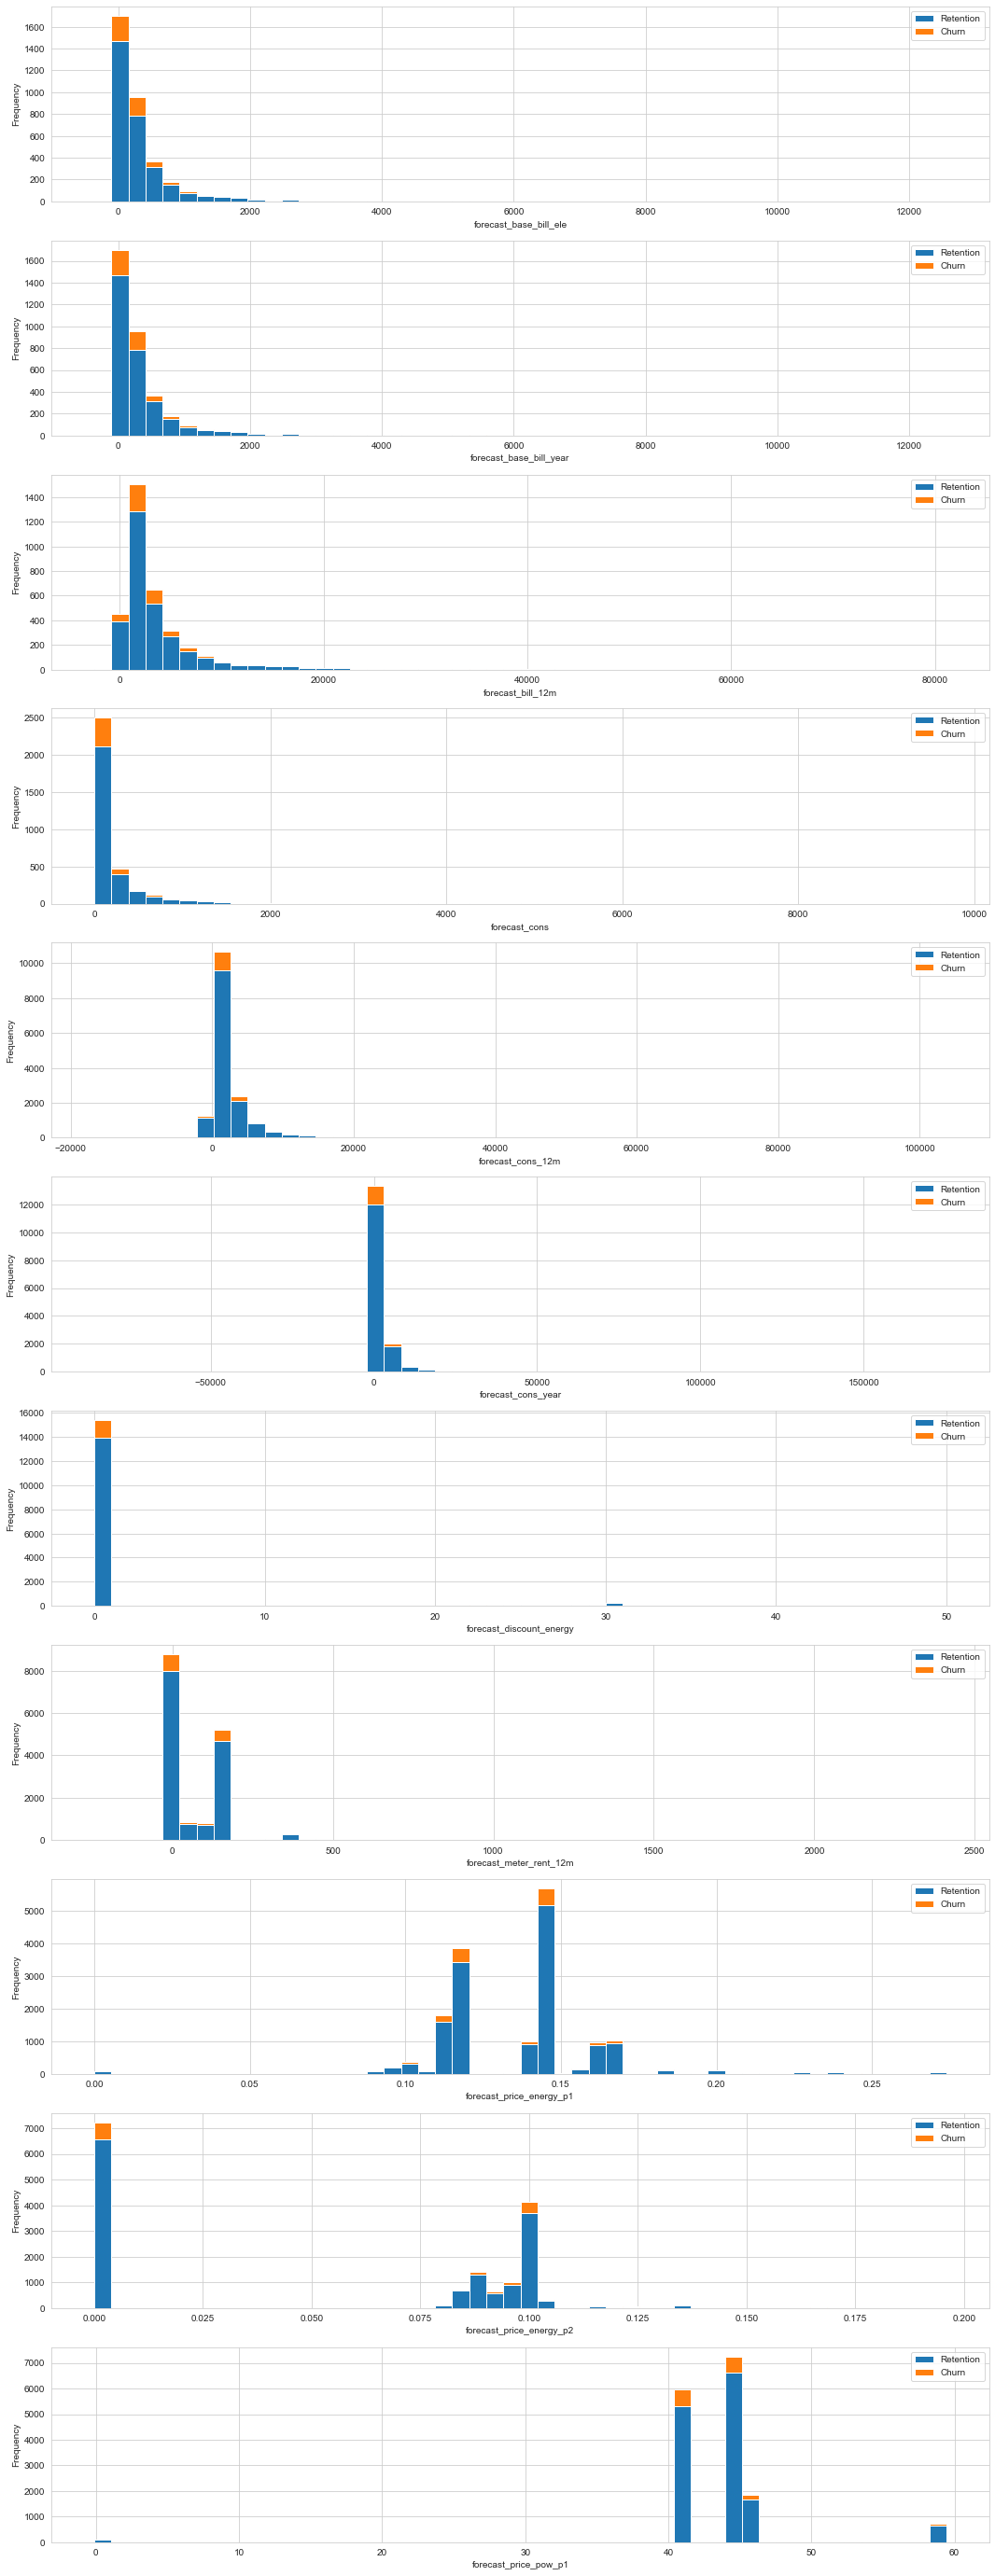

In [386]:
fig, axs = plt.subplots(nrows=11, figsize=(18,50))
# Plot histogram
plot_distribution(train, "forecast_base_bill_ele", axs[0])
plot_distribution(train, "forecast_base_bill_year", axs[1])
plot_distribution(train, "forecast_bill_12m", axs[2])
plot_distribution(train, "forecast_cons", axs[3])
plot_distribution(train, "forecast_cons_12m", axs[4])
plot_distribution(train, "forecast_cons_year", axs[5])
plot_distribution(train, "forecast_discount_energy", axs[6])
plot_distribution(train, "forecast_meter_rent_12m", axs[7])
plot_distribution(train, "forecast_price_energy_p1", axs[8])
plot_distribution(train, "forecast_price_energy_p2", axs[9])
plot_distribution(train, "forecast_price_pow_p1", axs[10])

In [388]:
contract_type = train[["id", "has_gas", "churn"]]


In [389]:
contract = contract_type.groupby([contract_type["churn"],contract_type["has_gas"]])["id"].count().unstack(level=0)

In [391]:
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)


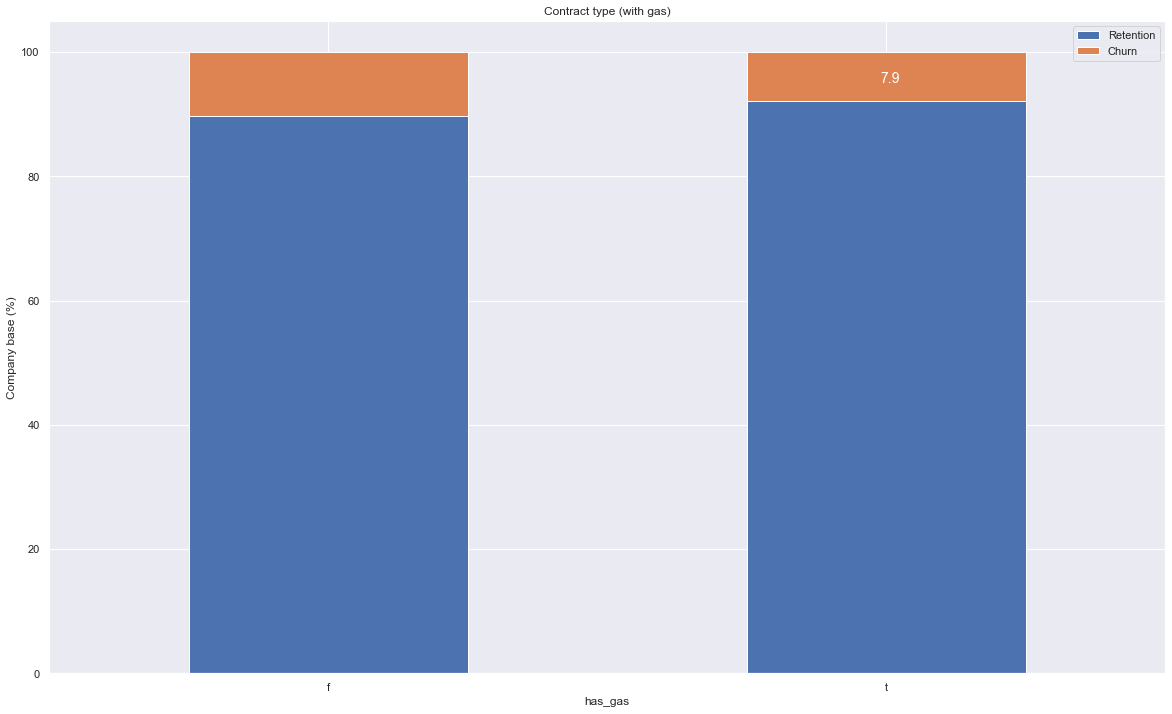

In [394]:

plot_stacked_bars(contract_percentage, "Contract type (with gas)")


In [395]:
margin = train[["id","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]

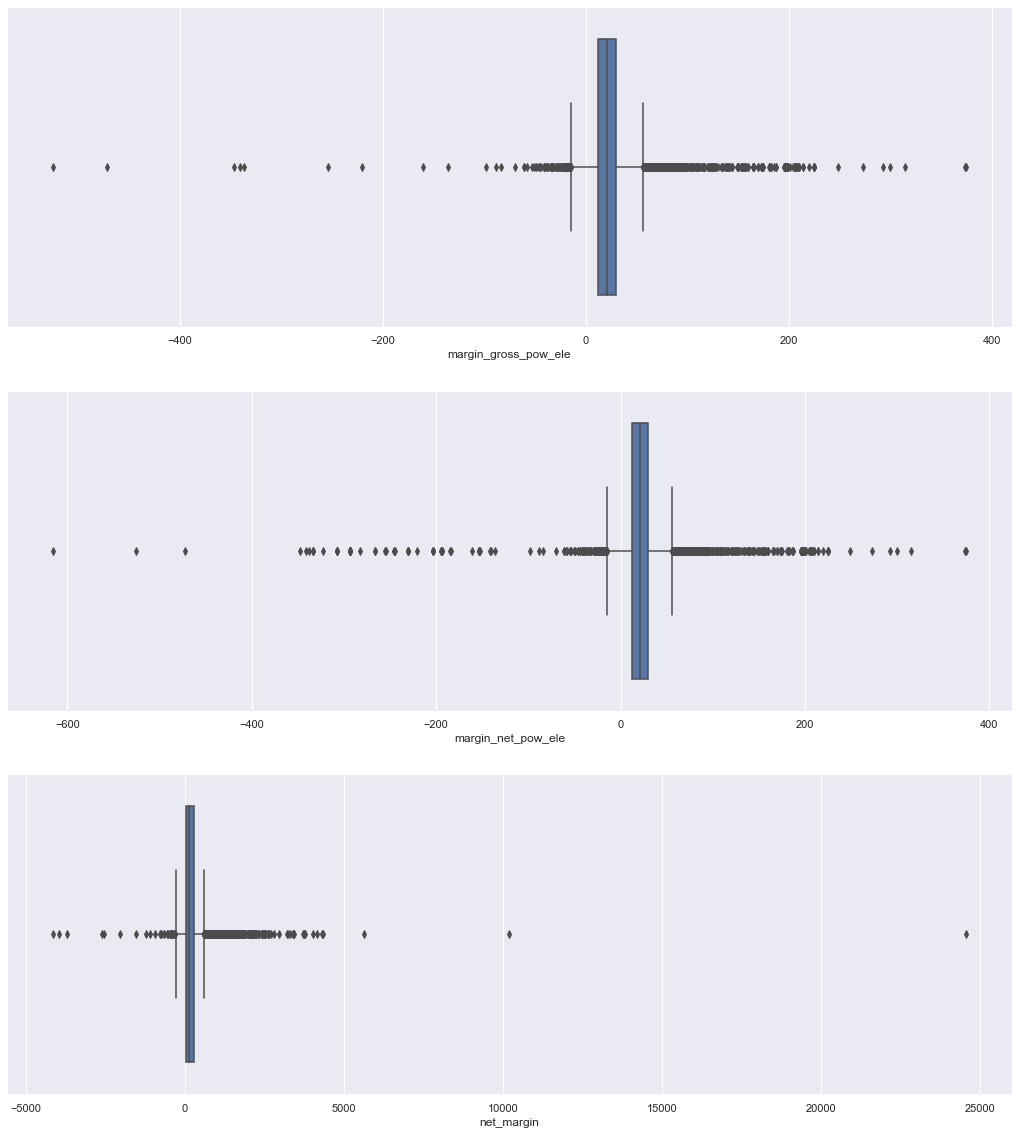

In [396]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

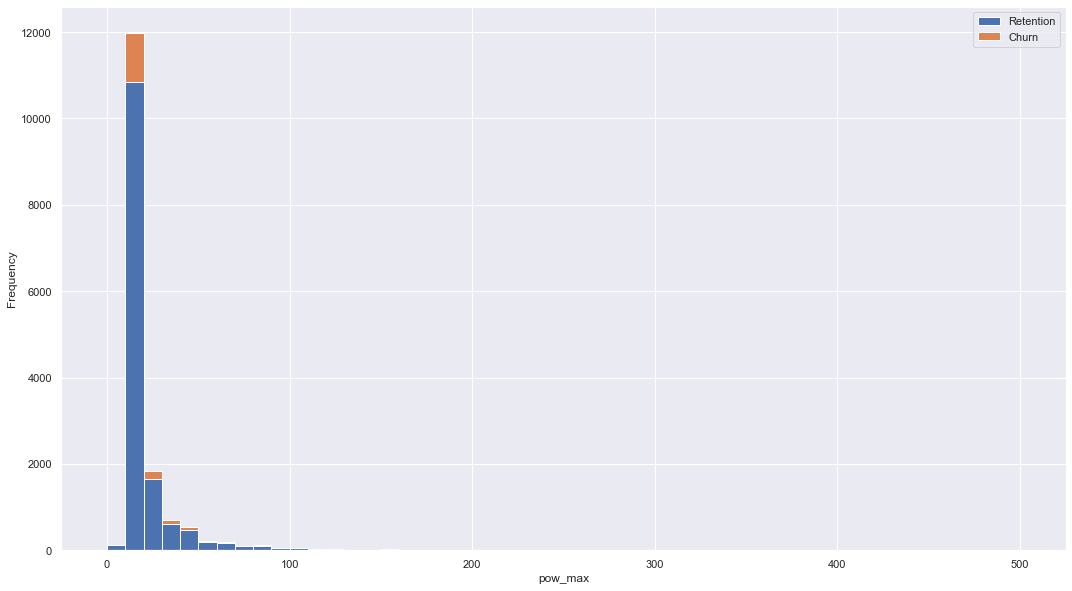

In [397]:
power = train[["id","pow_max", "churn"]].fillna(0)
fig, axs = plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, "pow_max", axs)


In [398]:
others = train[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

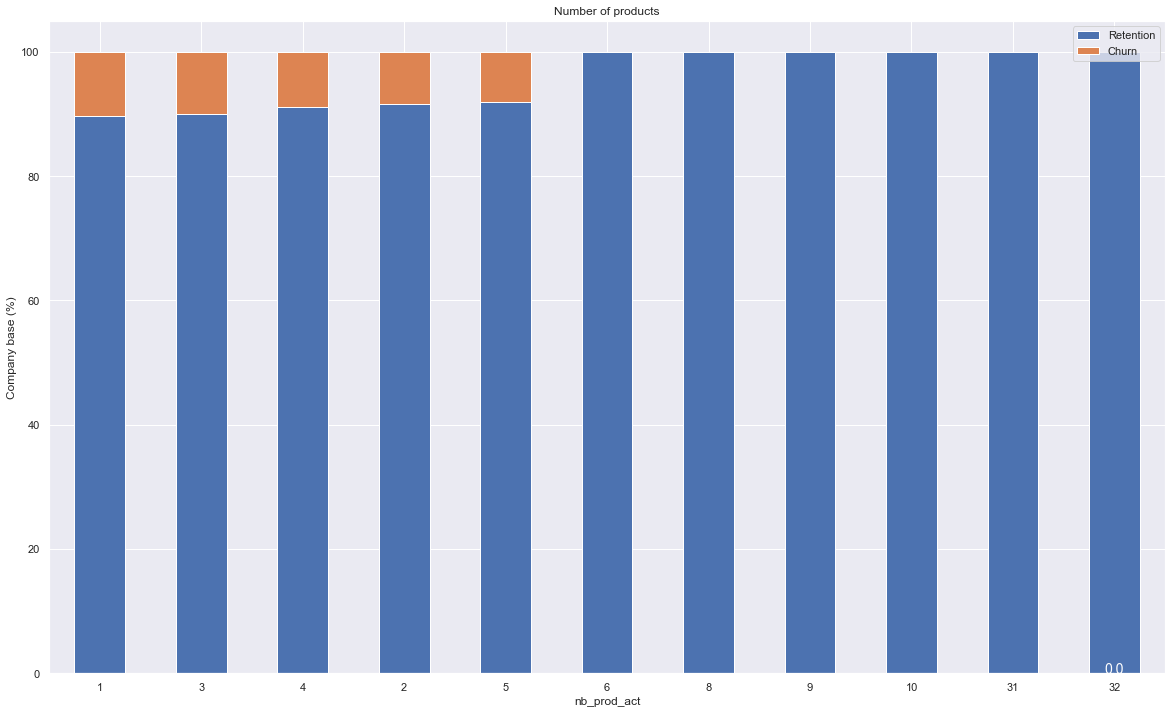

In [399]:
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of products")

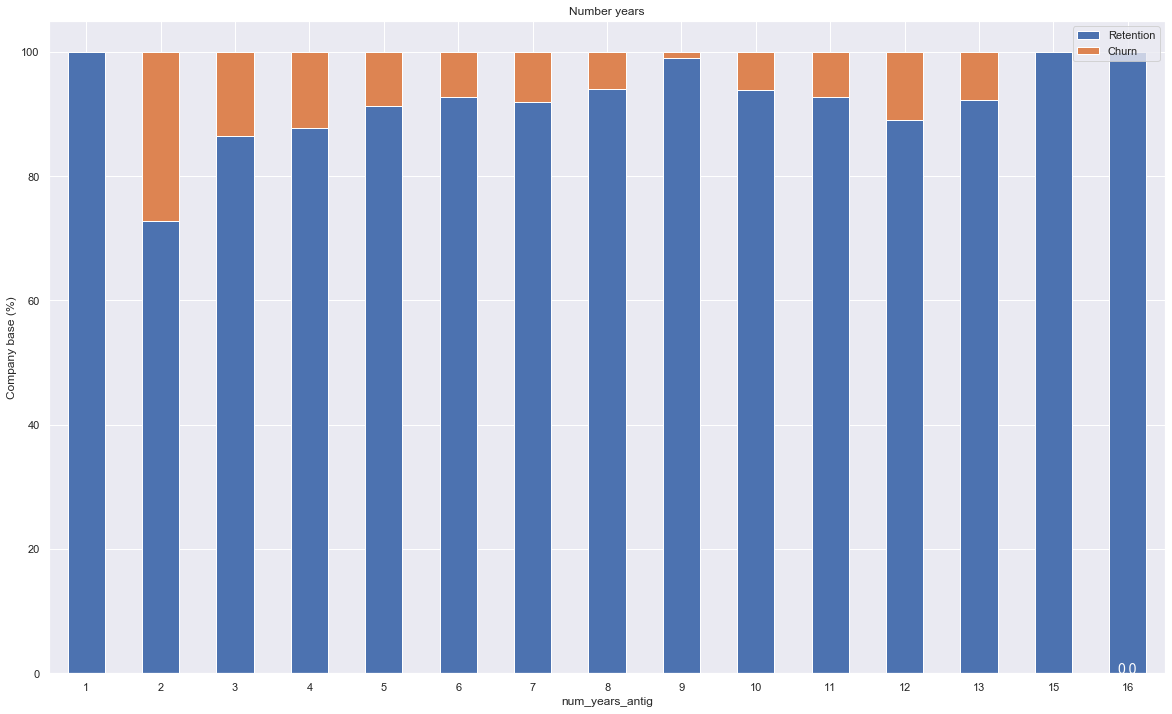

In [400]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")


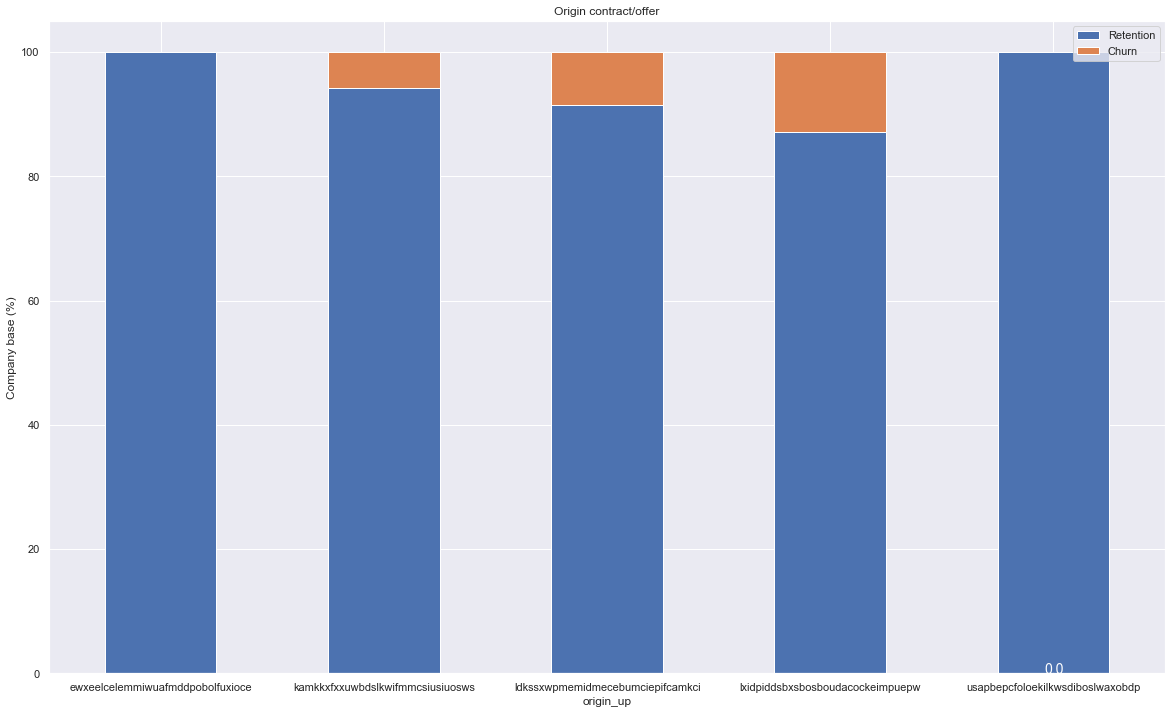

In [401]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

## Data cleaning

In [456]:
train.isnull().sum()/len(train)*100

id                              0.000000
activity_new                   59.300447
campaign_disc_ele             100.000000
channel_sales                  26.205268
cons_12m                        0.000000
                                 ...    
(price_p3_fix, 2015-09-01)      0.639911
(price_p3_fix, 2015-10-01)      0.739314
(price_p3_fix, 2015-11-01)      0.416252
(price_p3_fix, 2015-12-01)      0.832505
churn                           0.000000
Length: 105, dtype: float64

In [643]:
train=train.dropna(thresh=train.shape[0]*0.6,how='all',axis=1)

In [644]:
from datetime import date
train['date_activ'] = pd.to_datetime(train['date_activ'],format='%Y-%m-%d')
train['date_end'] = pd.to_datetime(train['date_end'],format='%Y-%m-%d')
train['date_modif_prod'] = pd.to_datetime(train['date_modif_prod'],format='%Y-%m-%d')
train['date_renewal'] = pd.to_datetime(train['date_renewal'],format='%Y-%m-%d')



## Feature engineering

### Missing Data

In [645]:

train['duration_contract']=(train['date_activ'] - train['date_end']).apply(lambda x :x.days)
train['day_to_modif']=(train['date_activ'] - train['date_modif_prod']).apply(lambda x :x.days)
train['day_to_renewal']=(train['date_activ'] - train['date_renewal']).apply(lambda x :x.days)


In [646]:
train['has_gas'] =train['has_gas'].map({'f':0,'t':1})
train['channel_sales'] =train['channel_sales'].map({'foosdfpfkusacimwkcsosbicdxkicaua':0,'lmkebamcaaclubfxadlmueccxoimlema':1,
                                                  'usilxuppasemubllopkaafesmlibmsdf':2,'ewpakwlliwisiwduibdlfmalxowmwpci':3,
                                                   'sddiedcslfslkckwlfkdpoeeailfpeds':4,'epumfxlbckeskwekxbiuasklxalciiuu':5,'fixdbufsefwooaasfcxdxadsiekoceaa':6})

train['origin_up'] =train['origin_up'].map({'lxidpiddsbxsbosboudacockeimpuepw':0,'kamkkxfxxuwbdslkwifmmcsiusiuosws':1,
                                                  'ldkssxwpmemidmecebumciepifcamkci':2,'usapbepcfoloekilkwsdiboslwaxobdp':3,
                                                   'ewxeelcelemmiwuafmddpobolfuxioce':4})

In [647]:
# Remove negative values
train.loc[train.cons_12m < 0,"cons_12m"] = np.nan
train.loc[train.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
train.loc[train.cons_last_month < 0,"cons_last_month"] = np.nan
train.loc[train.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
train.loc[train.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
train.loc[train.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
train.loc[train.imp_cons < 0,"imp_cons"] = np.nan


In [648]:
train=train.select_dtypes(include=['int64','float64'])
for i in train.columns:
    train.fillna(train[i].median(),inplace=True)
train.isnull().sum()

channel_sales                 0
cons_12m                      0
cons_gas_12m                  0
cons_last_month               0
forecast_cons_12m             0
                             ..
(price_p3_fix, 2015-12-01)    0
churn                         0
duration_contract             0
day_to_modif                  0
day_to_renewal                0
Length: 96, dtype: int64

In [649]:
# Apply log10 transformation
train["cons_12m"] = np.log10(train["cons_12m"]+1)
train["cons_gas_12m"] = np.log10(train["cons_gas_12m"]+1)
train["cons_last_month"] = np.log10(train["cons_last_month"]+1)
train["forecast_cons_12m"] = np.log10(train["forecast_cons_12m"]+1)
train["forecast_cons_year"] = np.log10(train["forecast_cons_year"]+1)
train["forecast_meter_rent_12m"] = np.log10(train["forecast_meter_rent_12m"]+1)
train["imp_cons"] = np.log10(train["imp_cons"]+1)


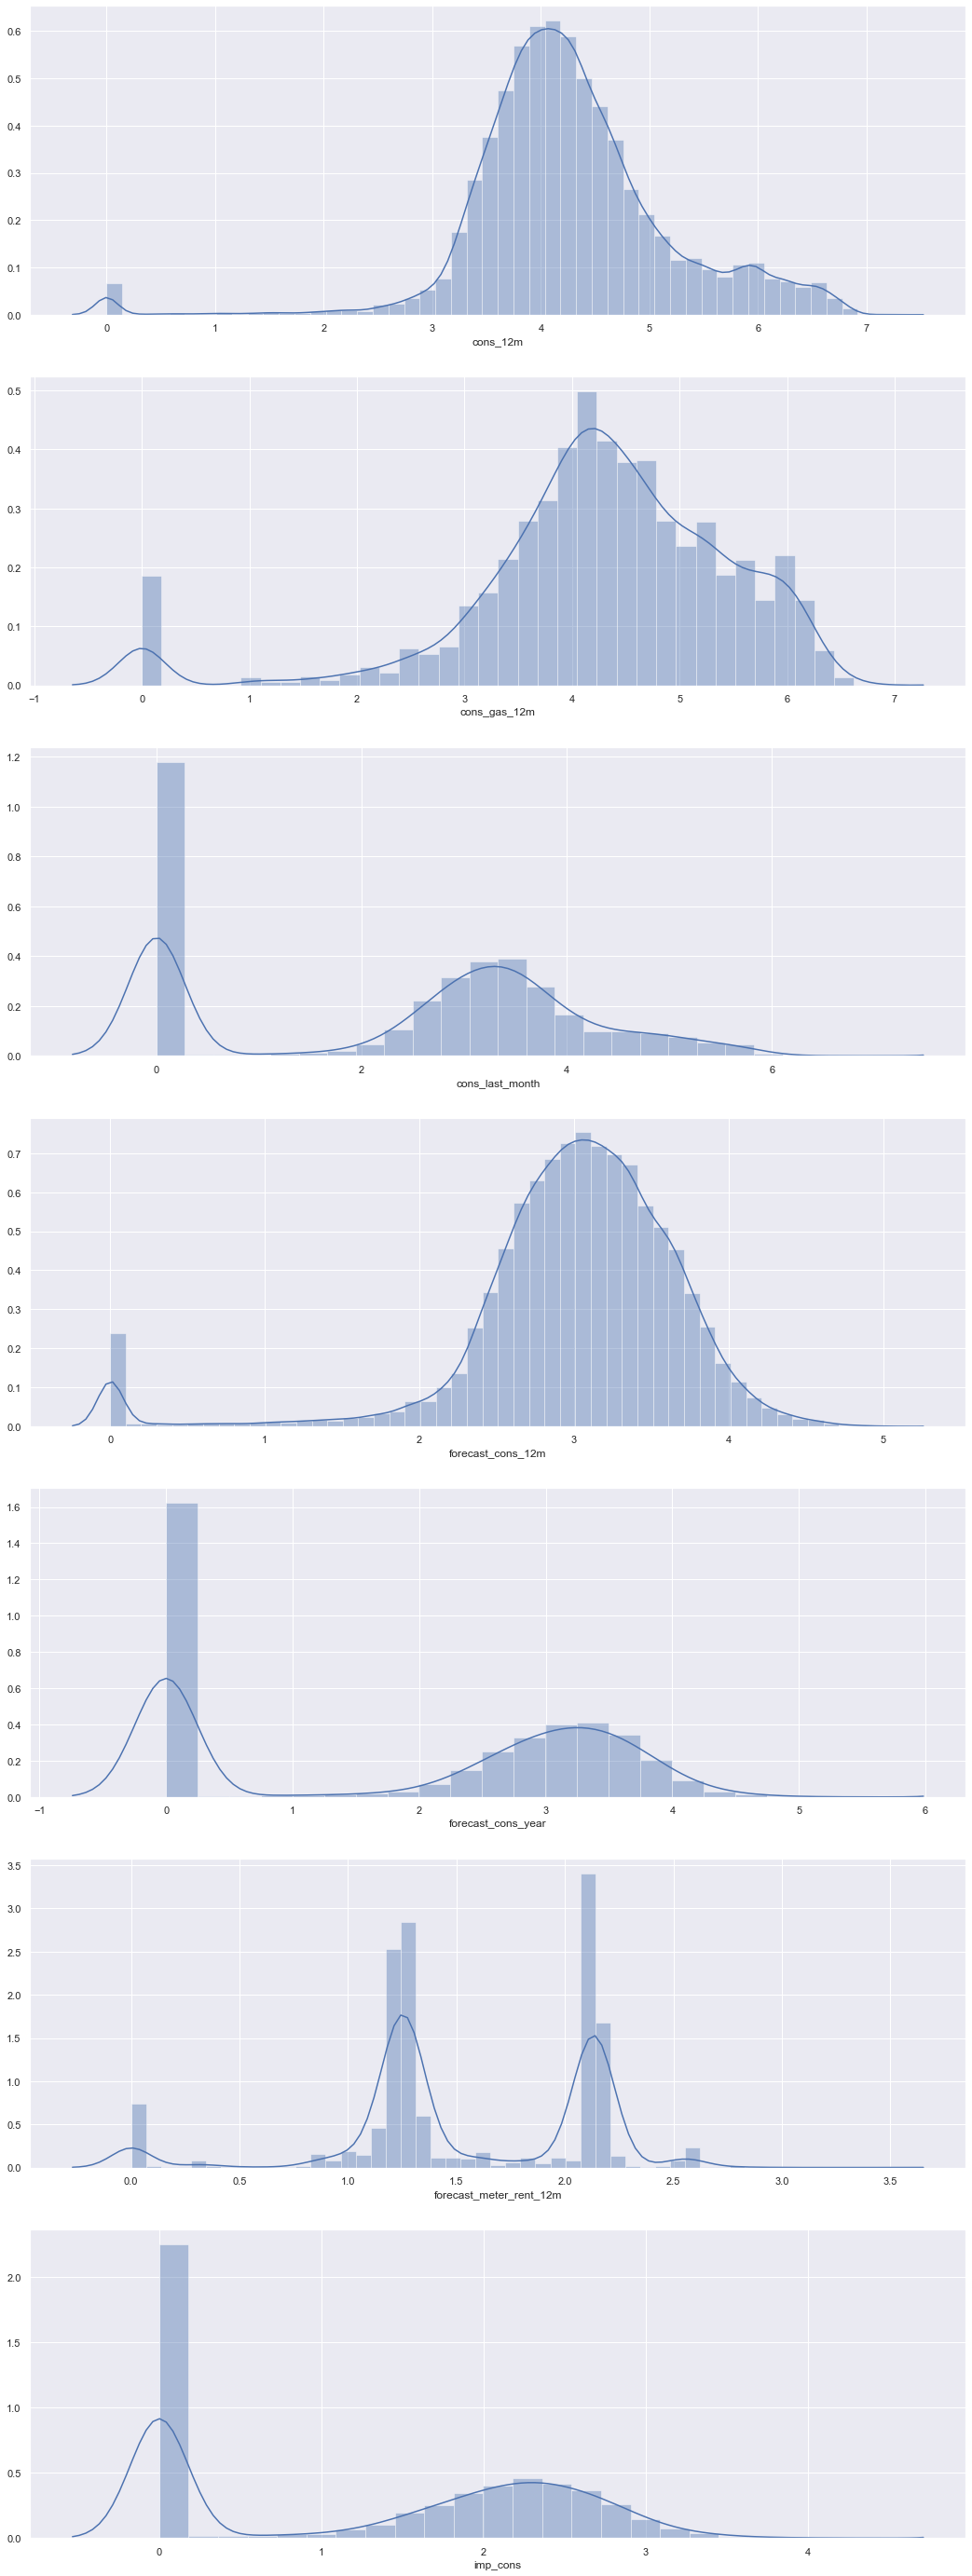

In [491]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histograms
sns.distplot((train["cons_12m"].dropna()), ax=axs[0])
sns.distplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

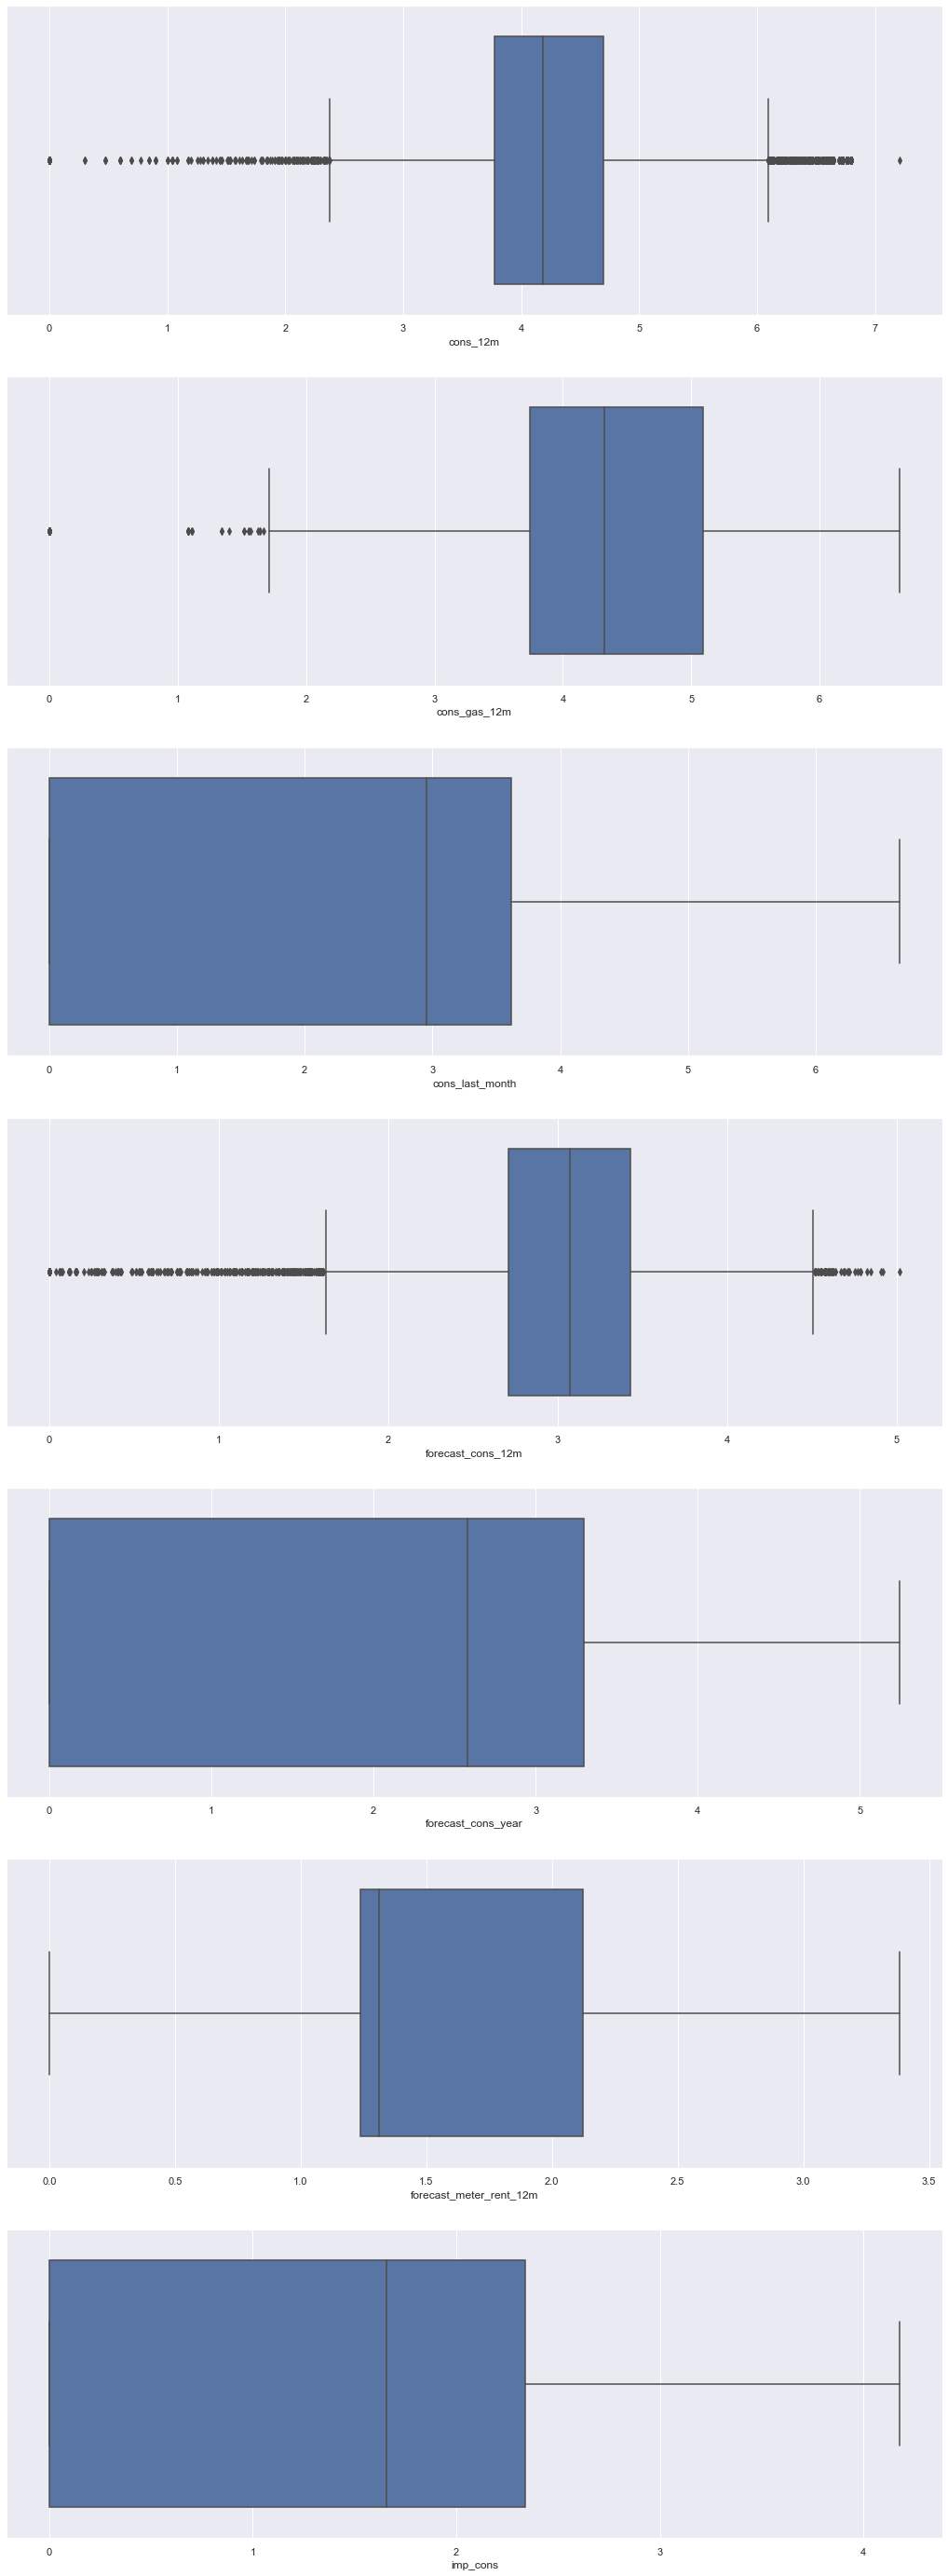

In [492]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

### High correlation variables

In [511]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [494]:
calc_vif(train)

,variables,VIF
0,channel_sales,1.448754
1,cons_12m,69.425536
2,cons_gas_12m,11.302195
3,cons_last_month,14.774655
4,forecast_cons_12m,57.683651
...,...,...
91,"(price_p3_fix, 2015-12-01)",2086.543567
92,churn,1.141565
93,duration_contract,581.912108
94,day_to_modif,2.037455


In [650]:
train.drop(['cons_last_month','day_to_renewal',('price_p3_fix', '2015-12-01'),'forecast_cons_12m','forecast_cons_year',('price_p3_fix', '2015-10-01'),('price_p3_fix', '2015-09-01'),'cons_12m',('price_p3_fix', '2015-08-01')],axis=1,inplace=True)

In [496]:
calc_vif(train)

,variables,VIF
0,channel_sales,1.439136
1,cons_gas_12m,10.900568
2,forecast_discount_energy,2.012693
3,forecast_meter_rent_12m,21.807731
4,forecast_price_energy_p1,1222.296131
...,...,...
83,"(price_p3_fix, 2015-08-01)",4489.337761
84,"(price_p3_fix, 2015-11-01)",2381.119690
85,churn,1.139694
86,duration_contract,158.556917


### Outlier

In [651]:
# def replace_outliers_z_score(dataframe, column, Z=3):
#  """
#  Replace outliers with the mean values using the Z score.
#  Nan values are also replaced with the mean values.
#  Parameters
#  ----------
#  dataframe : pandas dataframe
#  Contains the data where the outliers are to be found
#  column : str
#  Usually a string with the name of the column

#  Returns
#  -------
#  Dataframe
#  With outliers under the lower and above the upper bound removed
#  """
#  from scipy.stats import zscore

#  df = dataframe.copy(deep=True)
#  df.dropna(inplace=True, subset=[column])

#  # Calculate mean without outliers
#  df["zscore"] = zscore(df[column])
#  mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

#  # Replace with mean values
#  dataframe[column] = dataframe[column].fillna(mean_)
#  dataframe["zscore"] = zscore(dataframe[column])
#  no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
#  dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

#  # Print message
#  print("Replaced:", no_outliers, " outliers in ", column)
#  return dataframe.drop(columns="zscore")


In [652]:
# for c in train.columns:
#     if c != "id" and c !='churn':
#         features = replace_outliers_z_score(train,c)

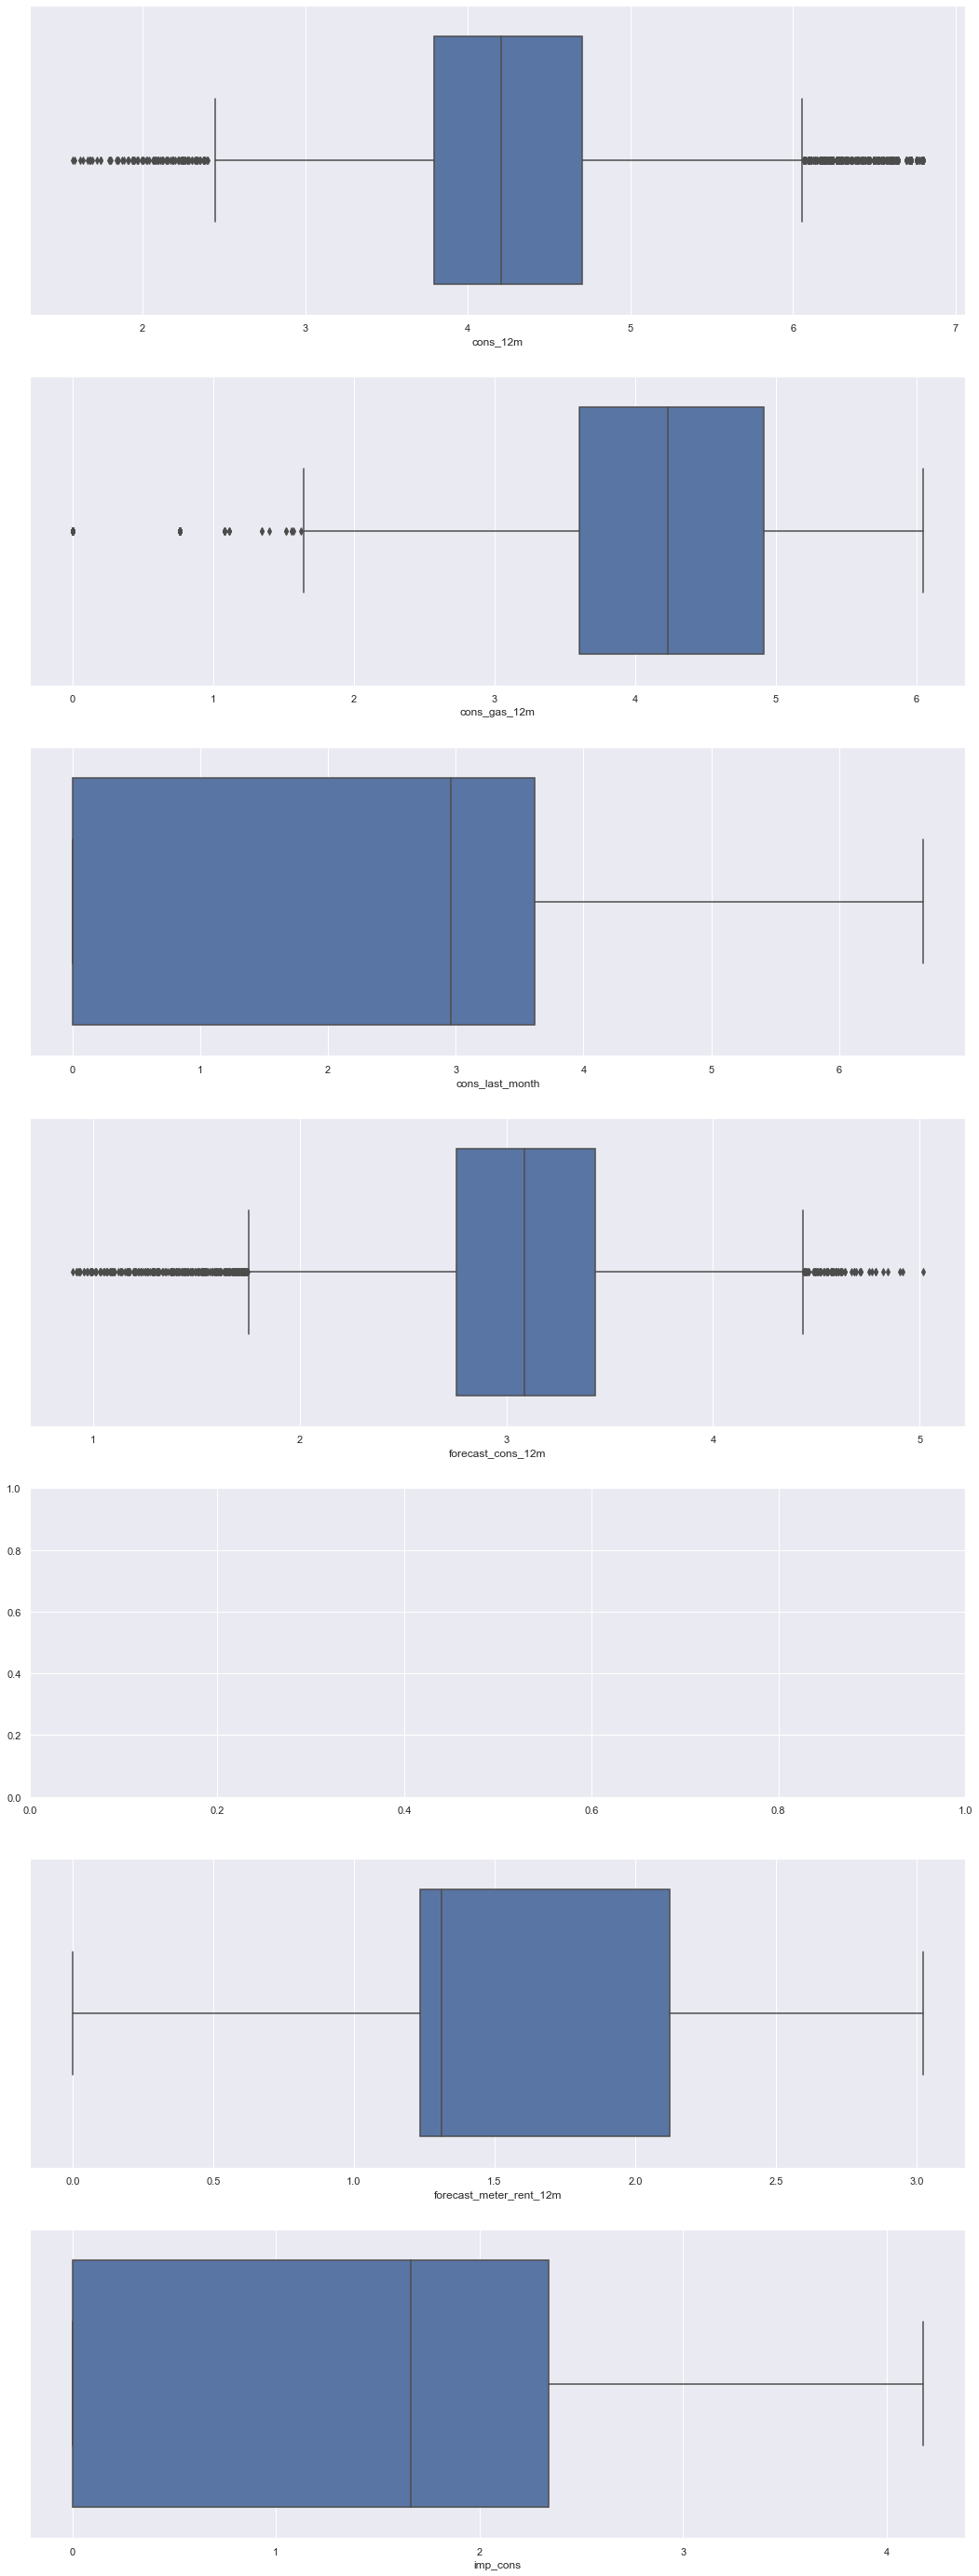

In [437]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
#sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

In [653]:
from sklearn.ensemble import IsolationForest
import numpy as np


clf = IsolationForest(  max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(train)
train['outlier']= preds
train = train[train['outlier']==1].drop('outlier',axis=1)

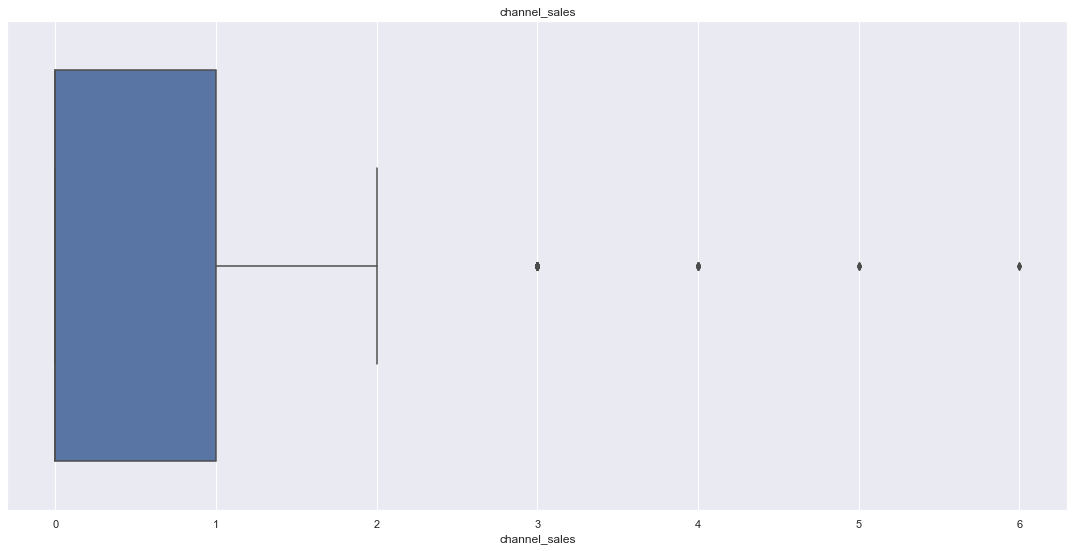

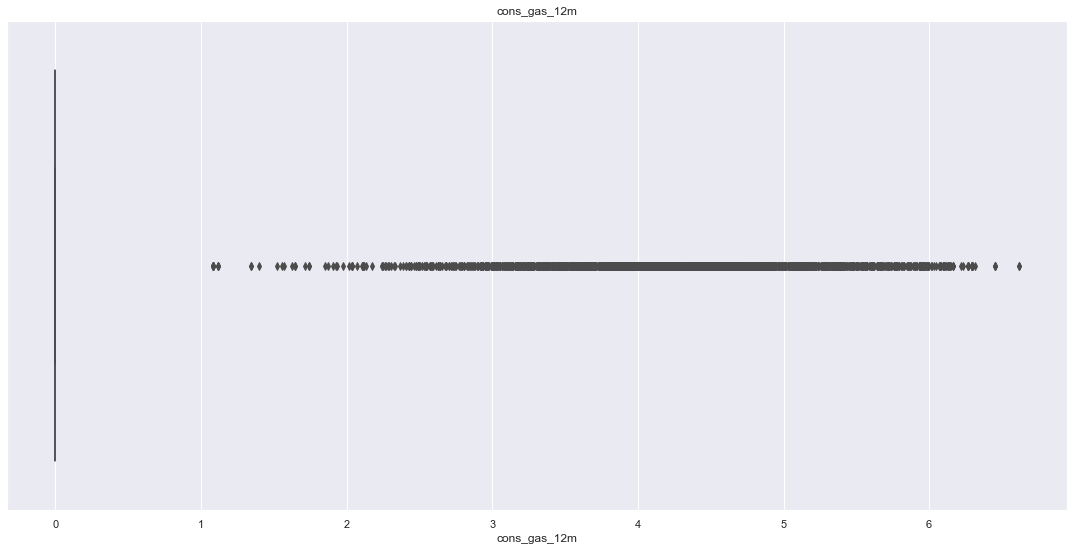

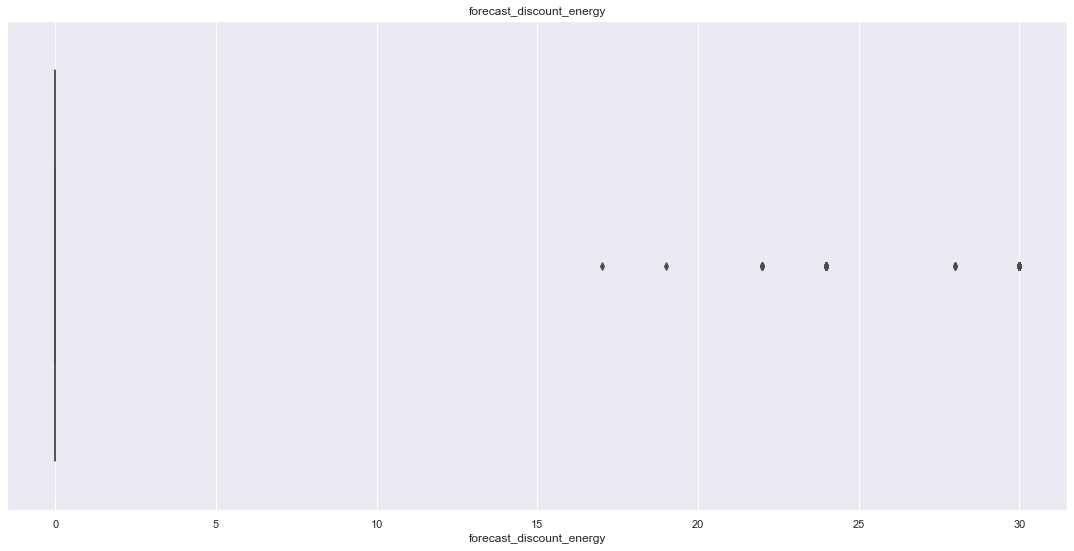

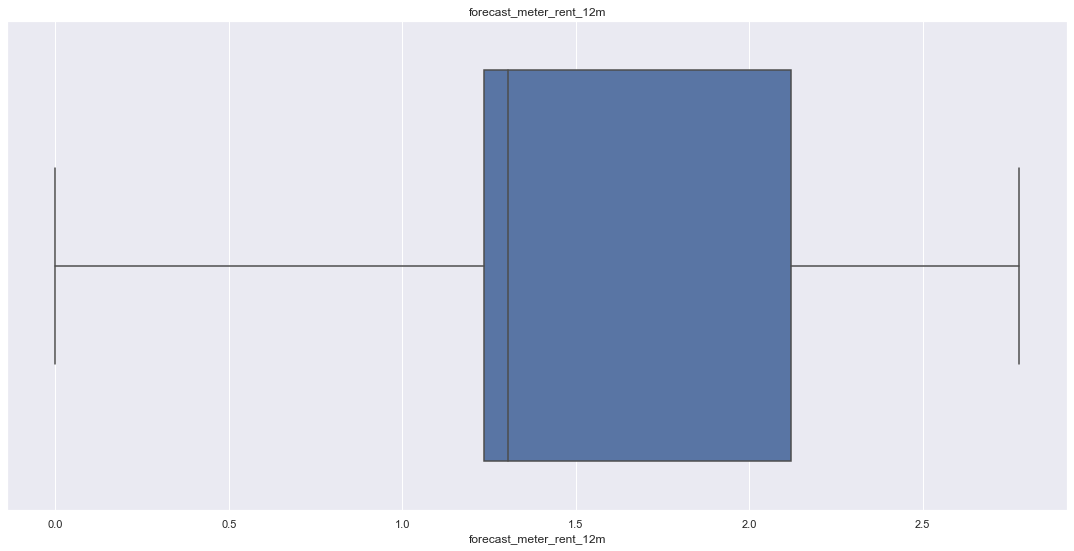

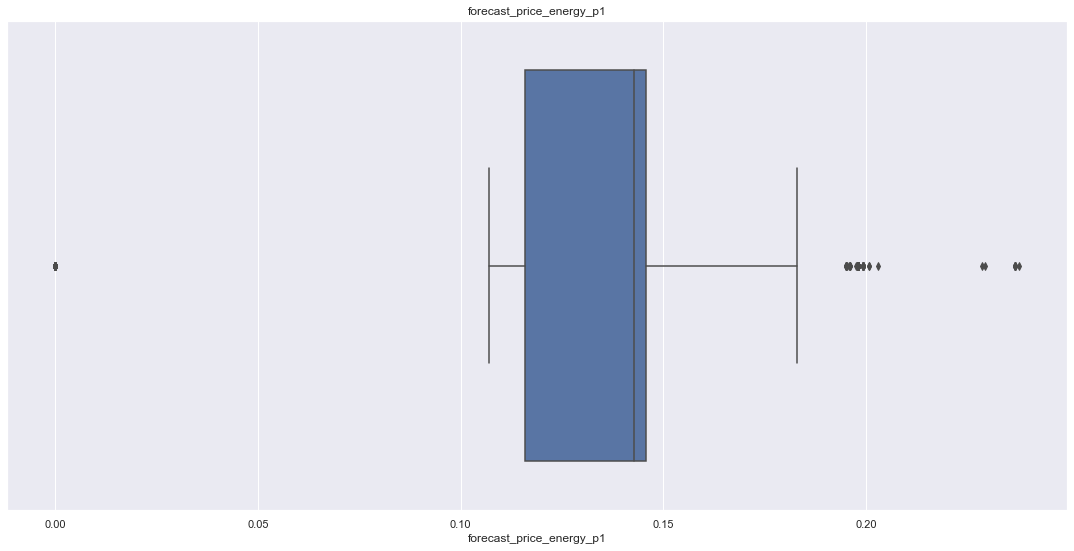

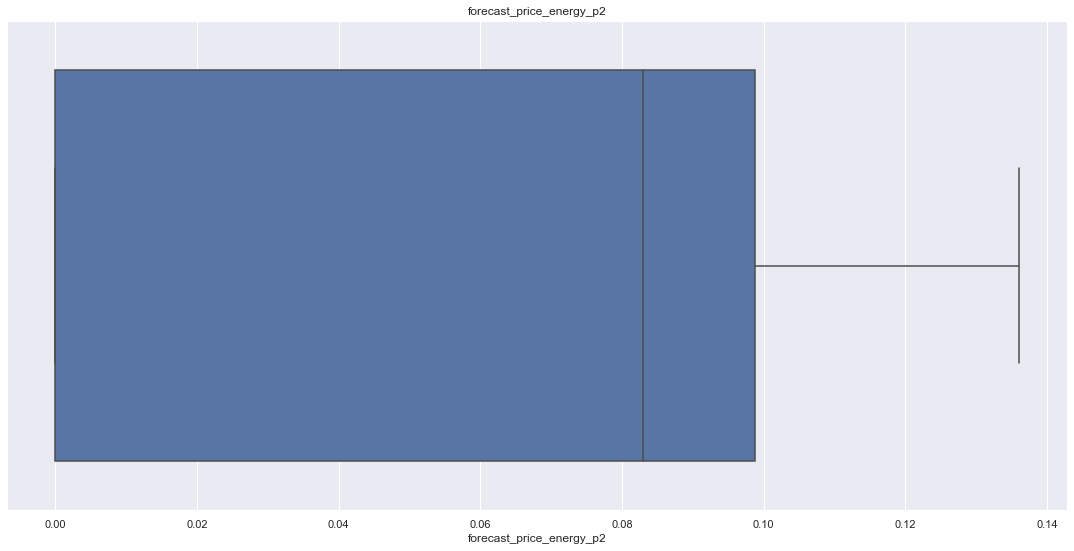

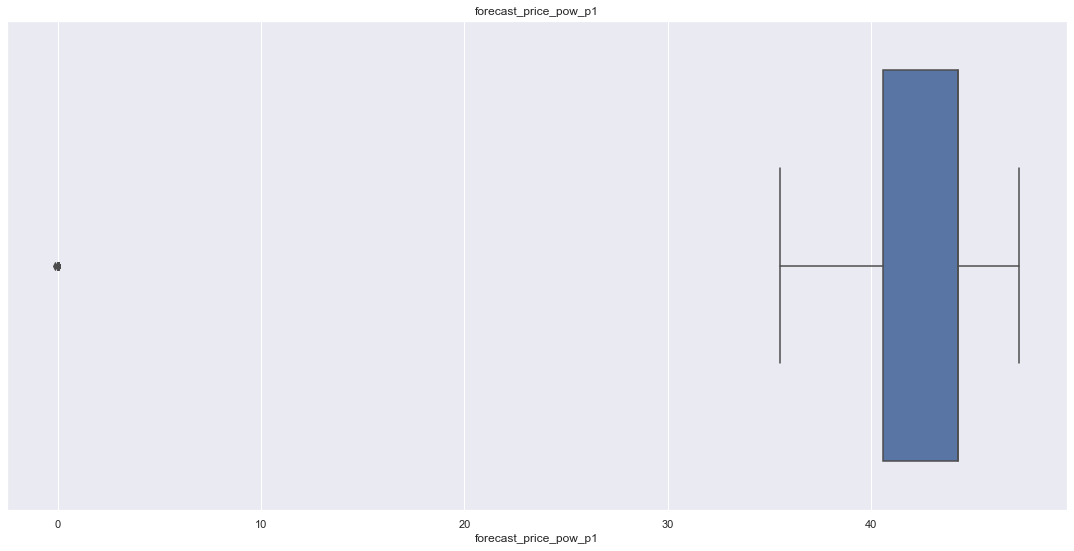

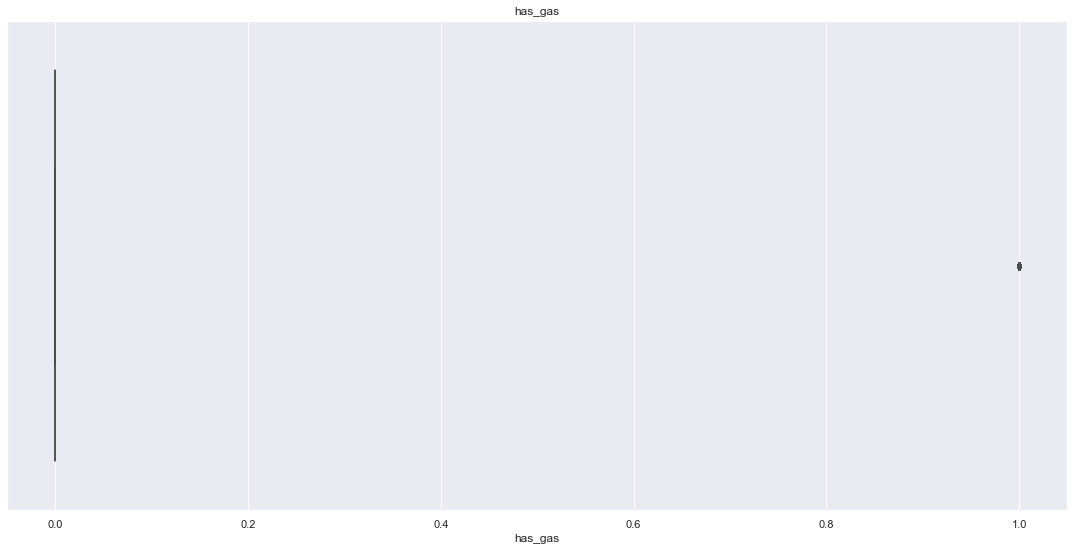

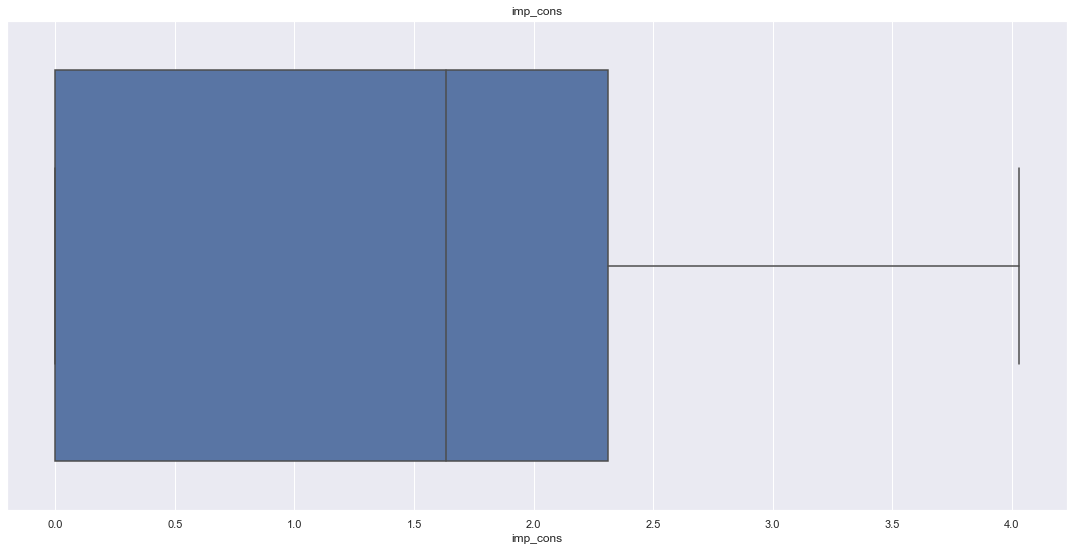

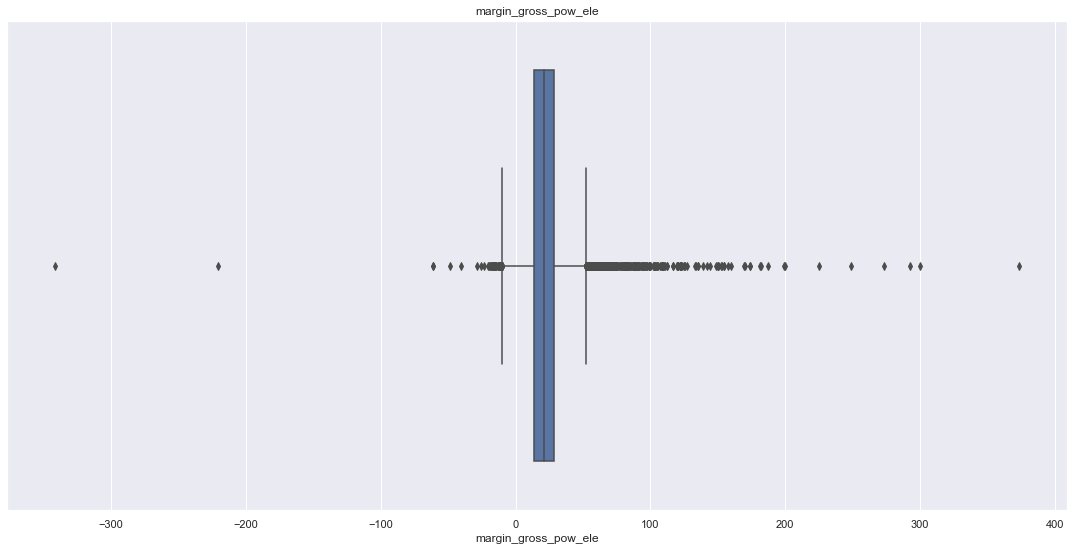

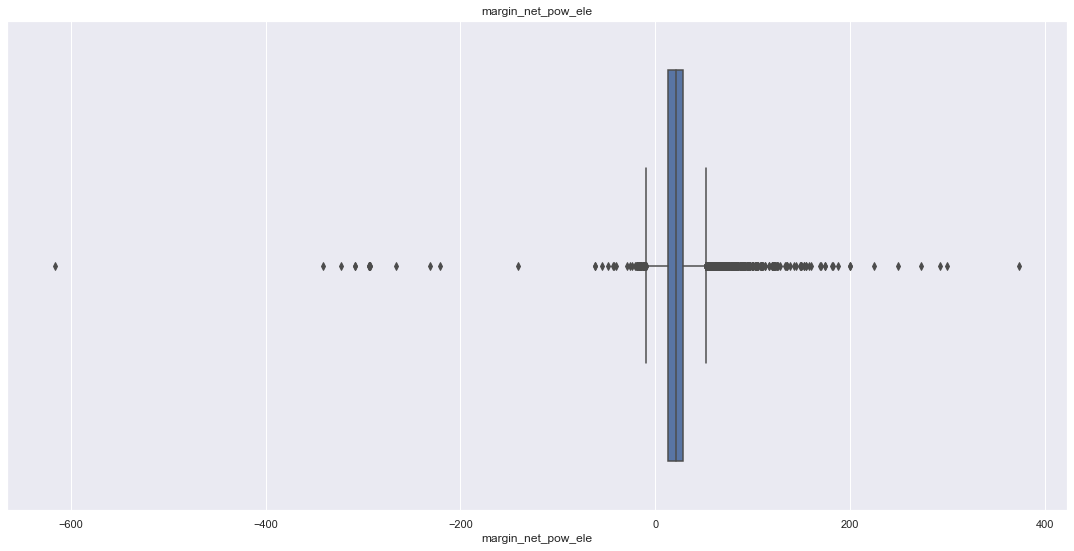

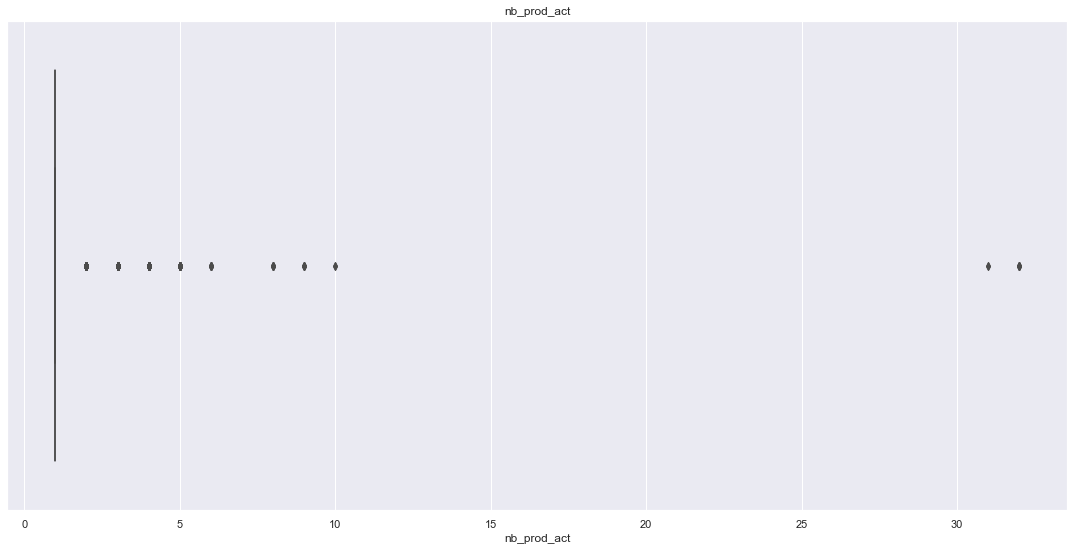

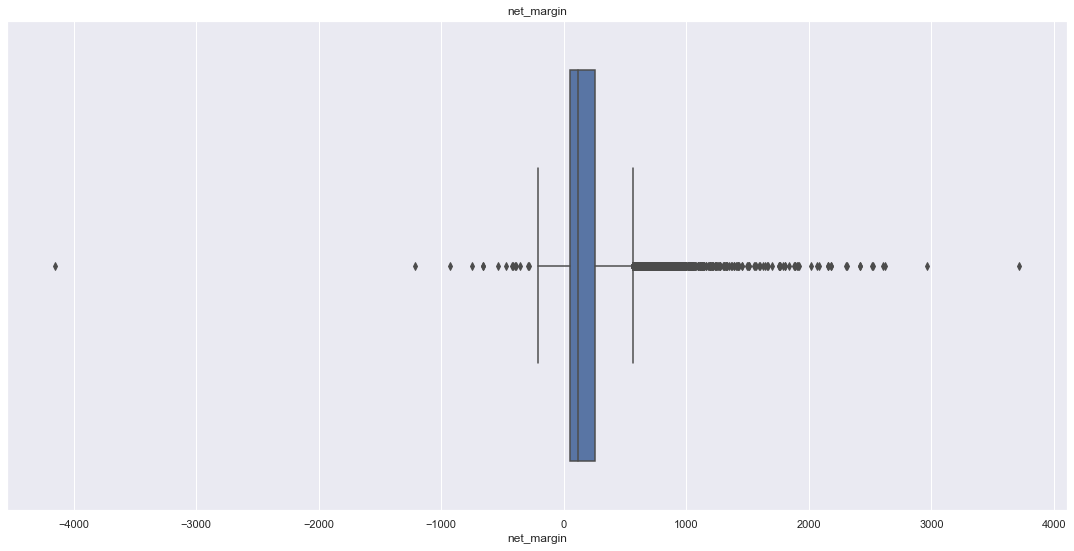

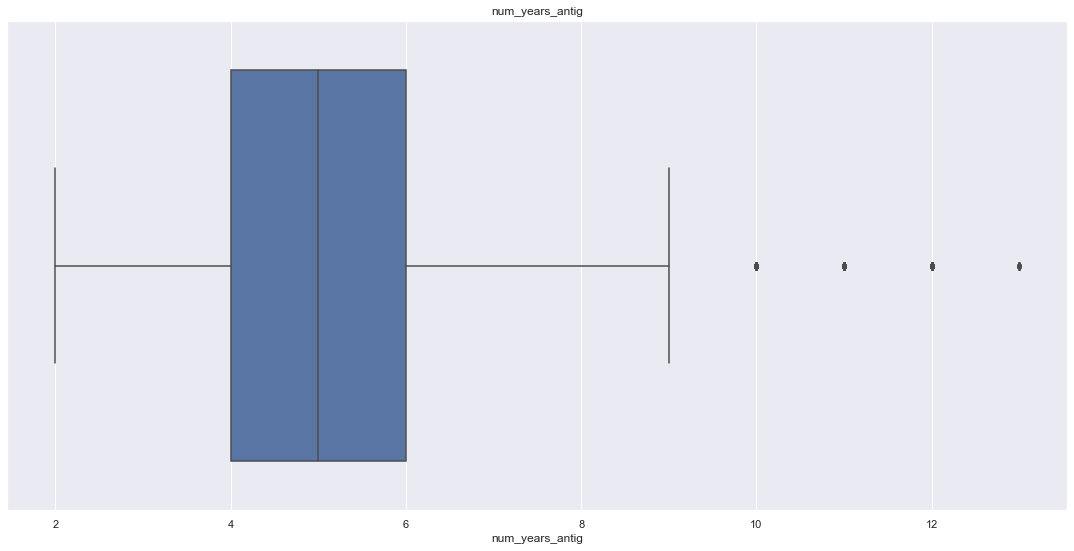

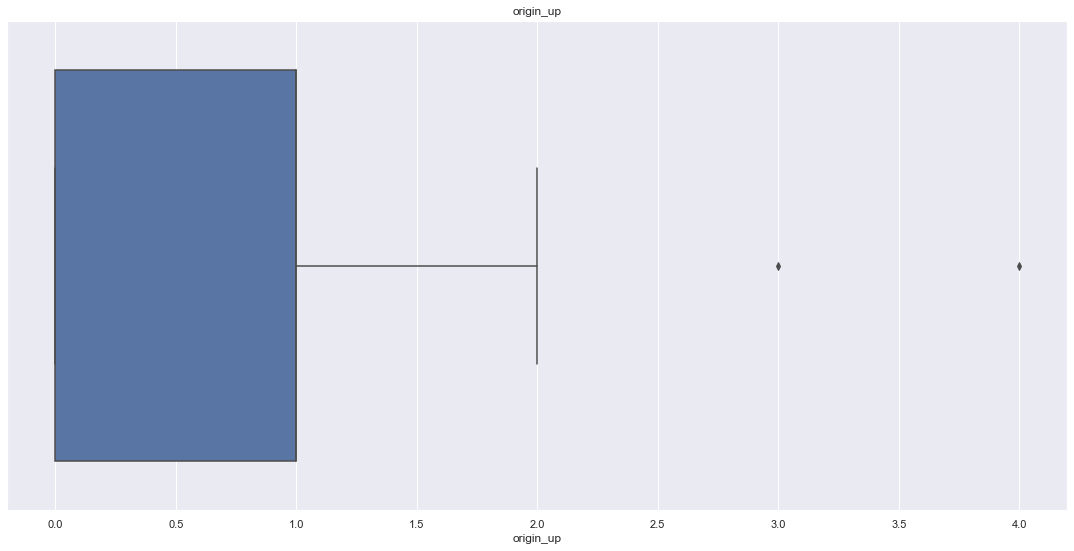

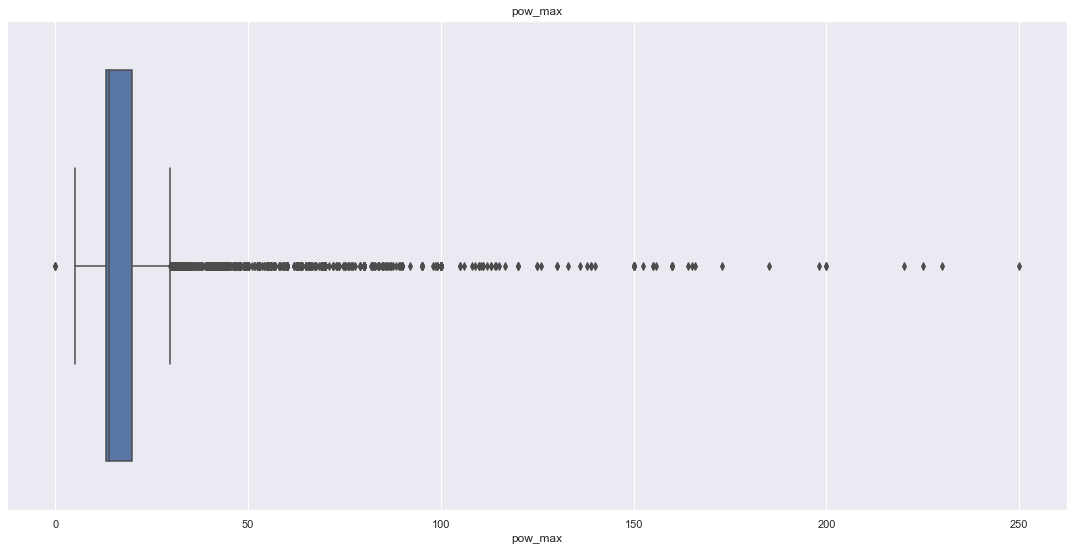

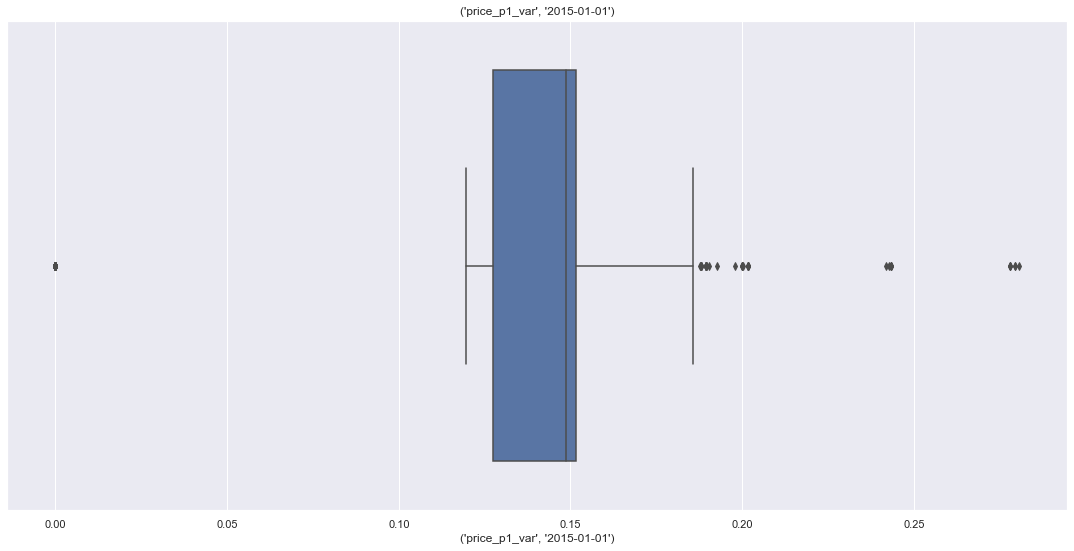

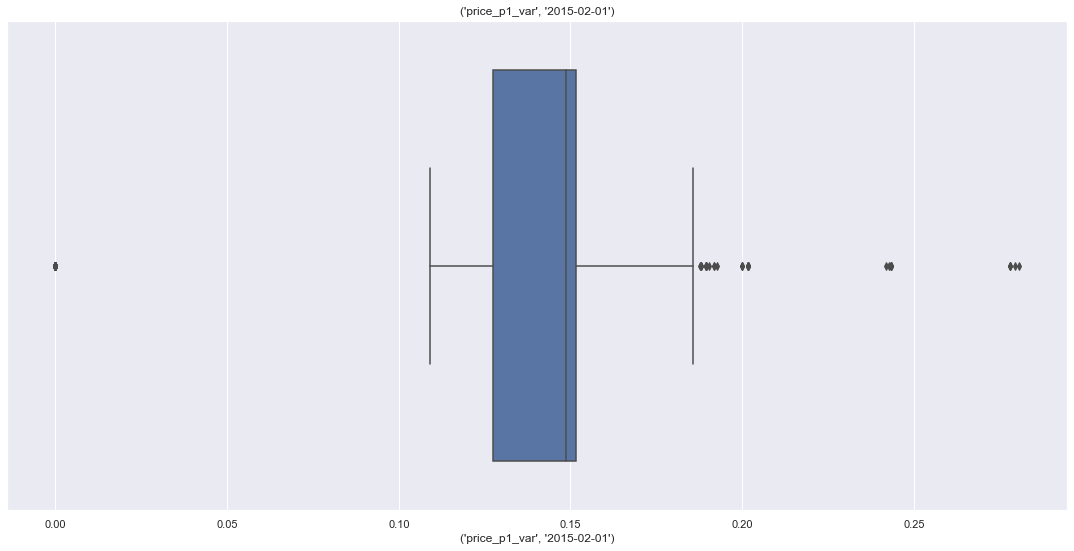

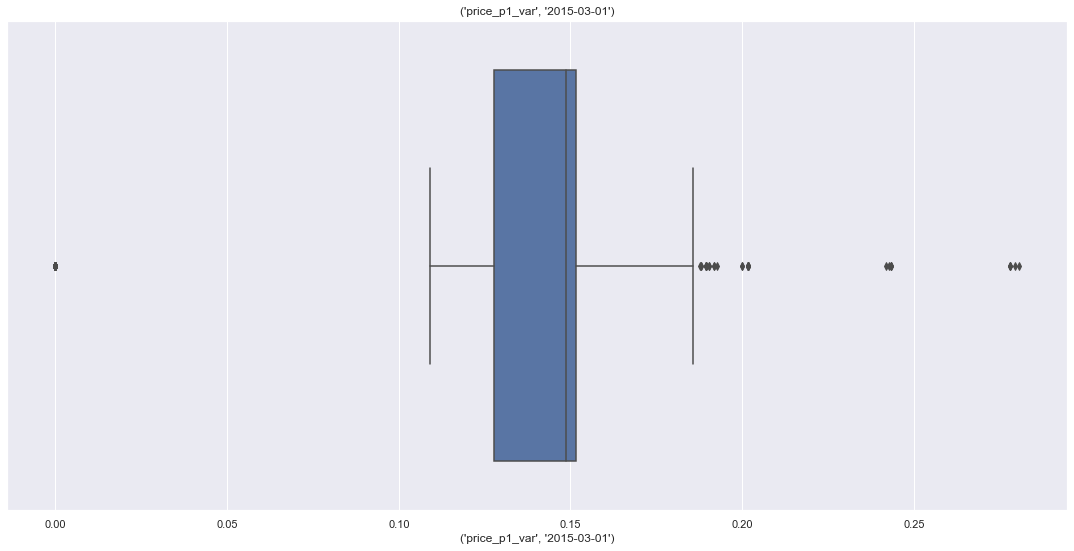

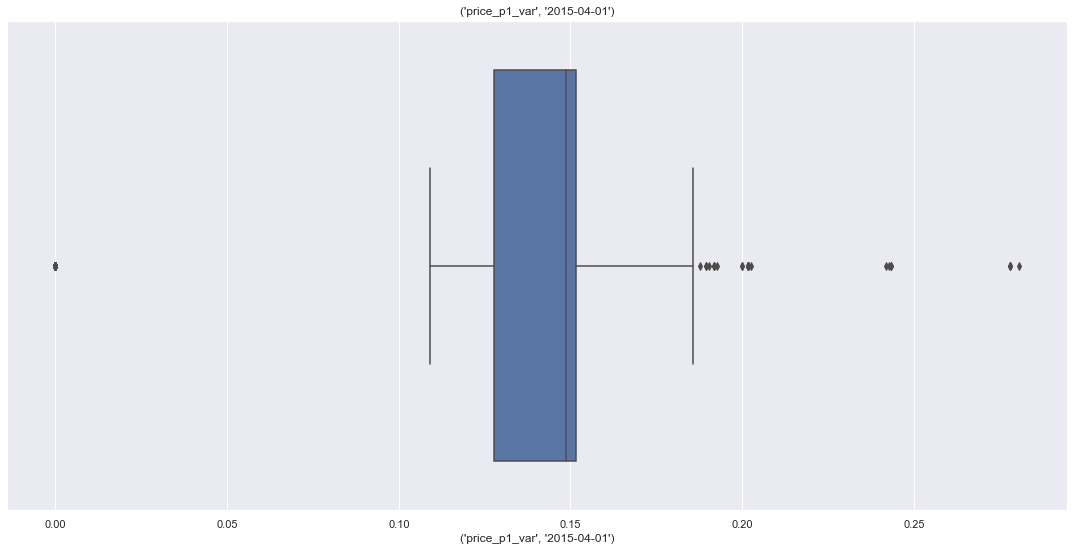

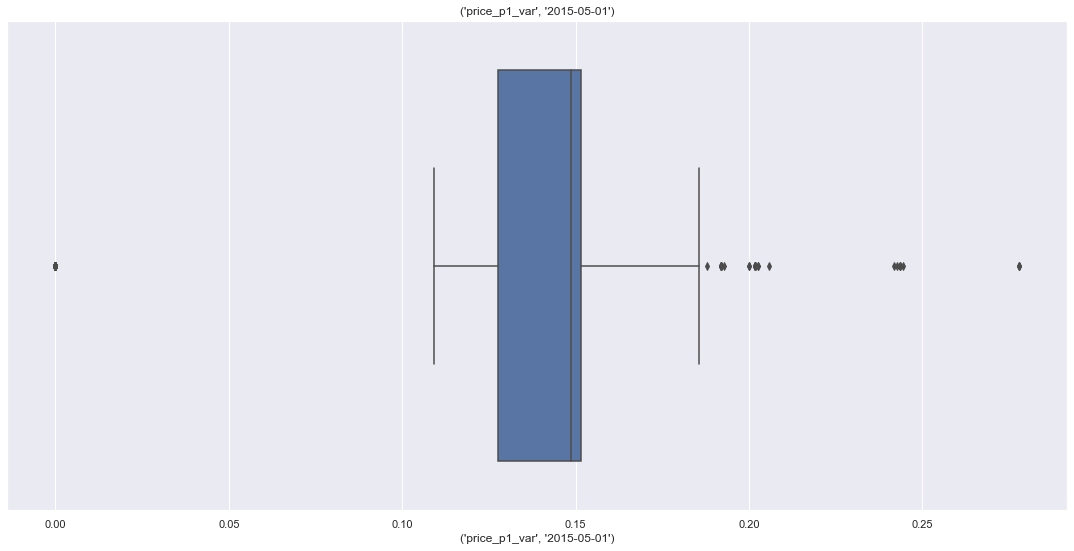

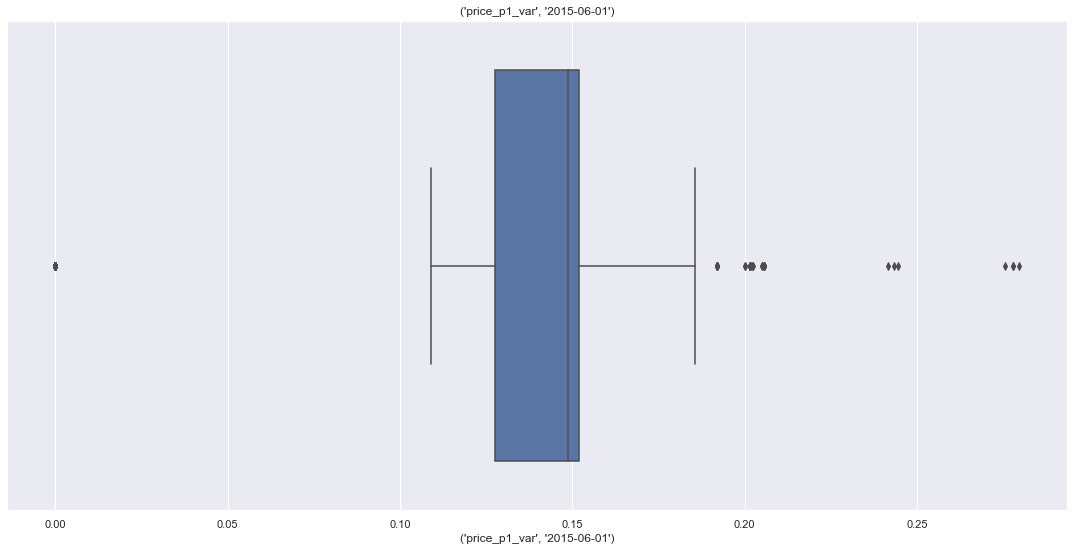

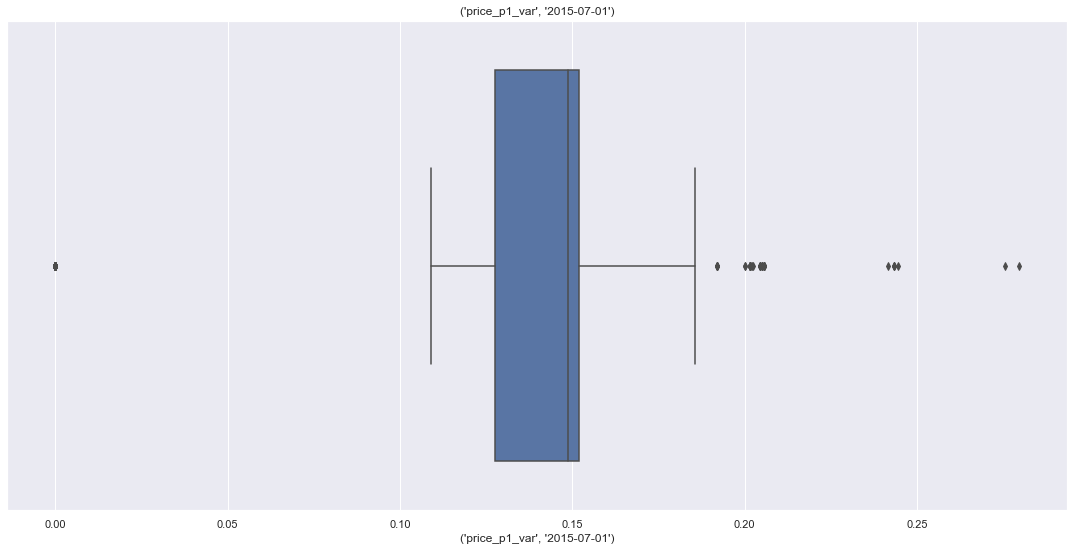

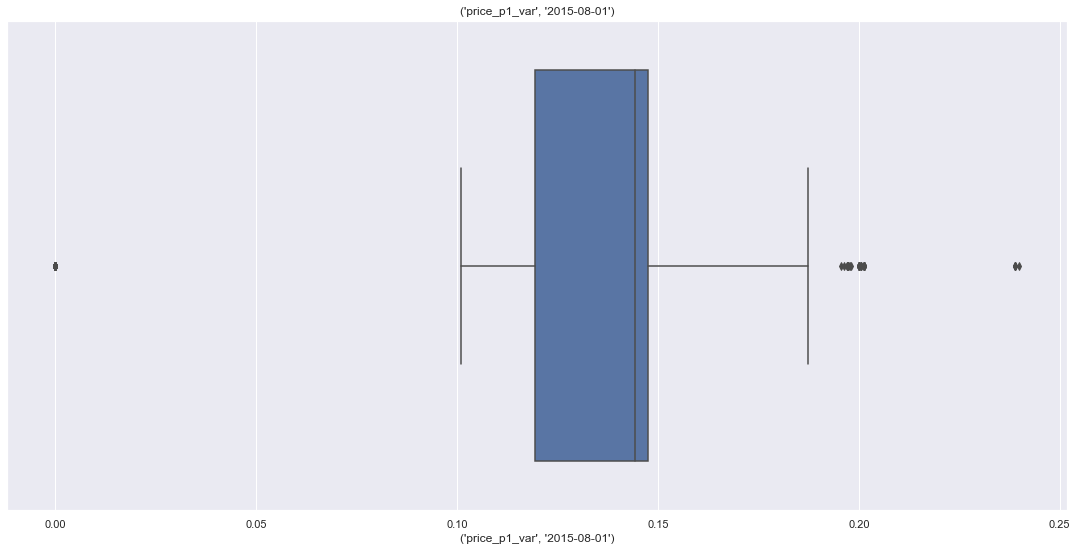

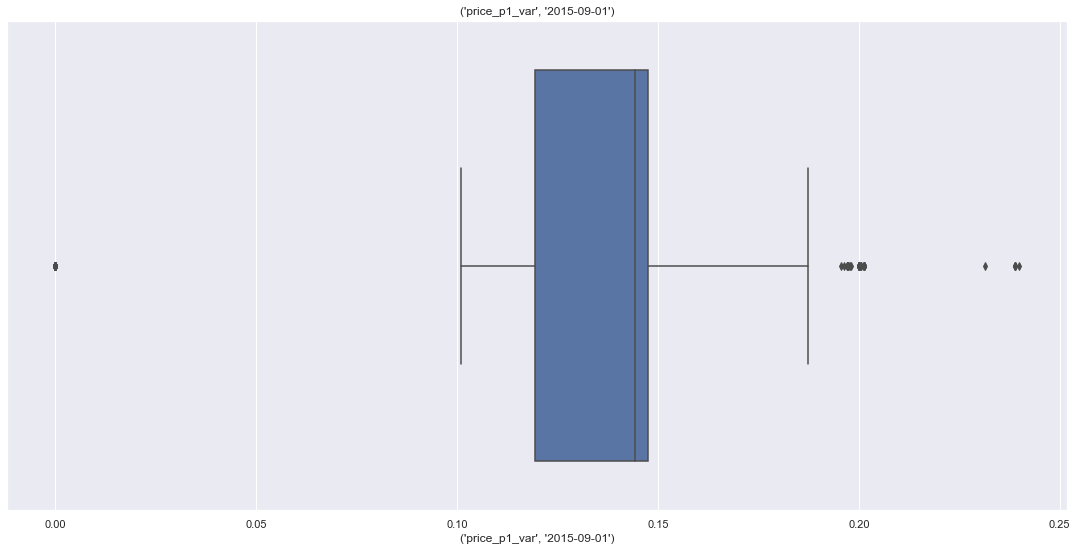

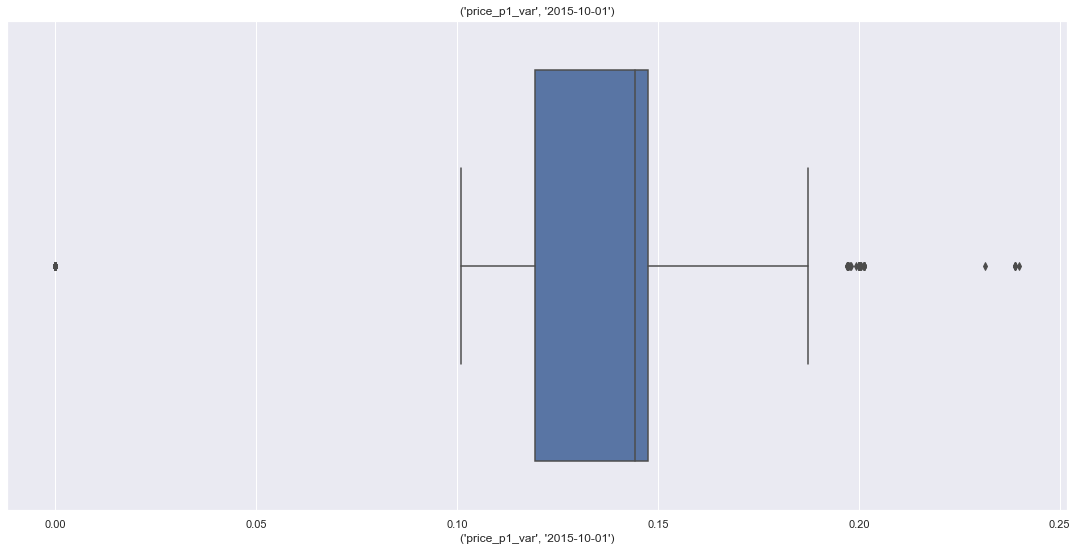

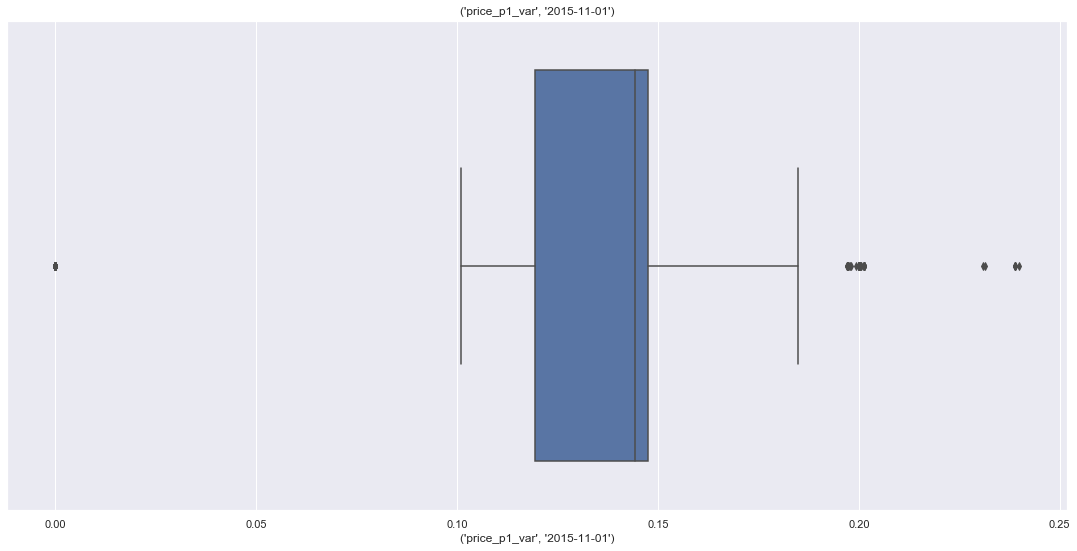

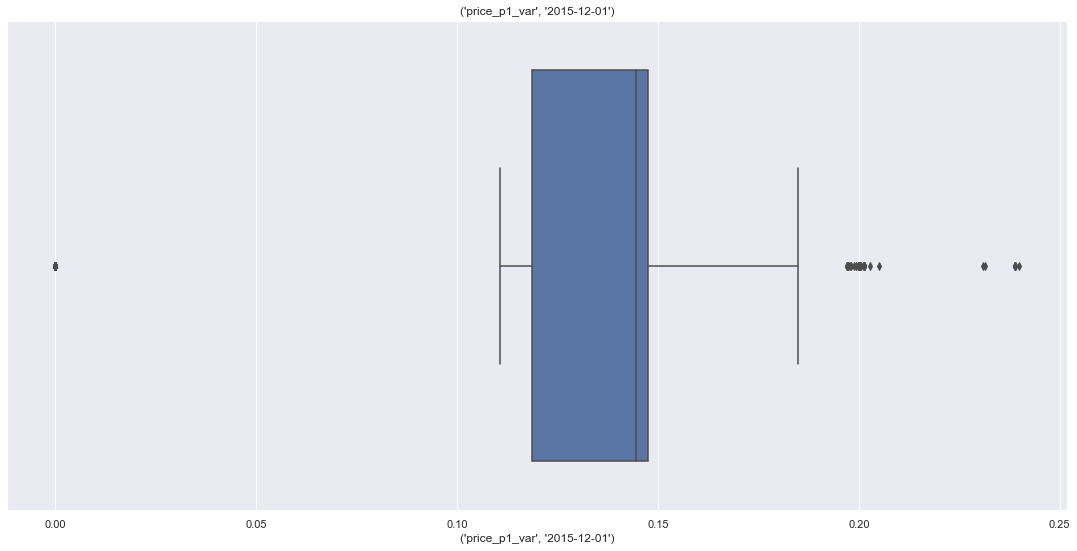

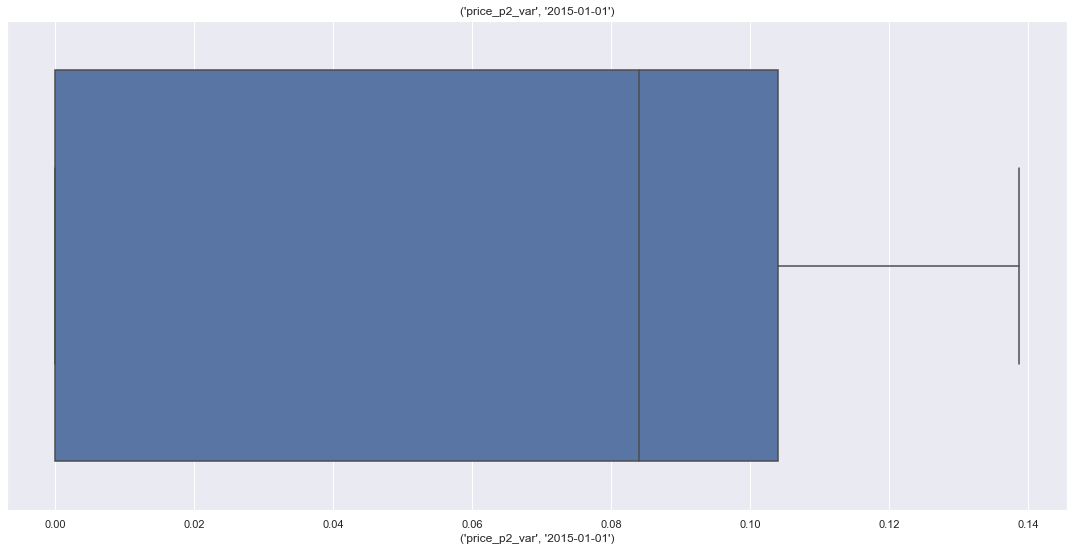

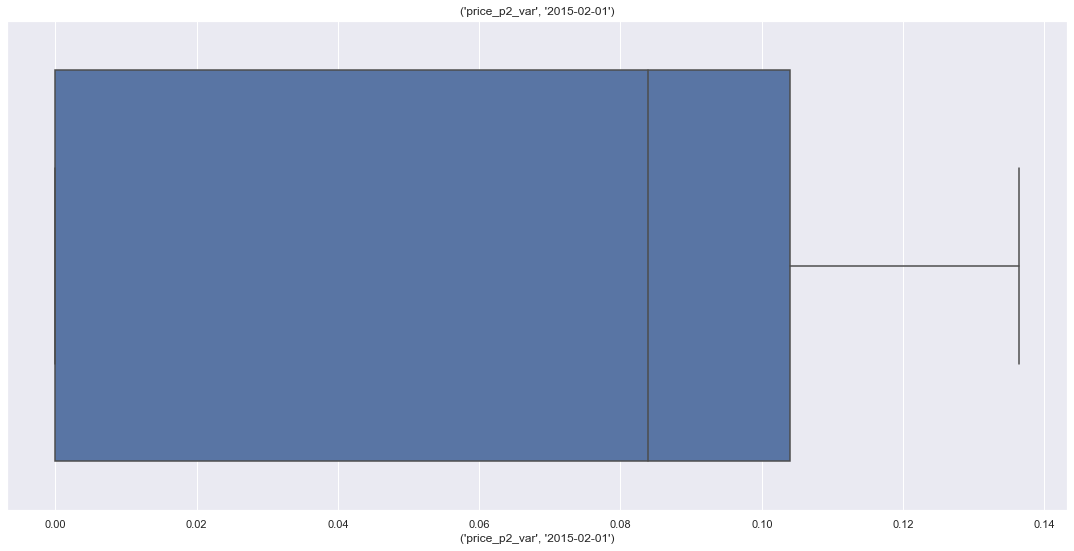

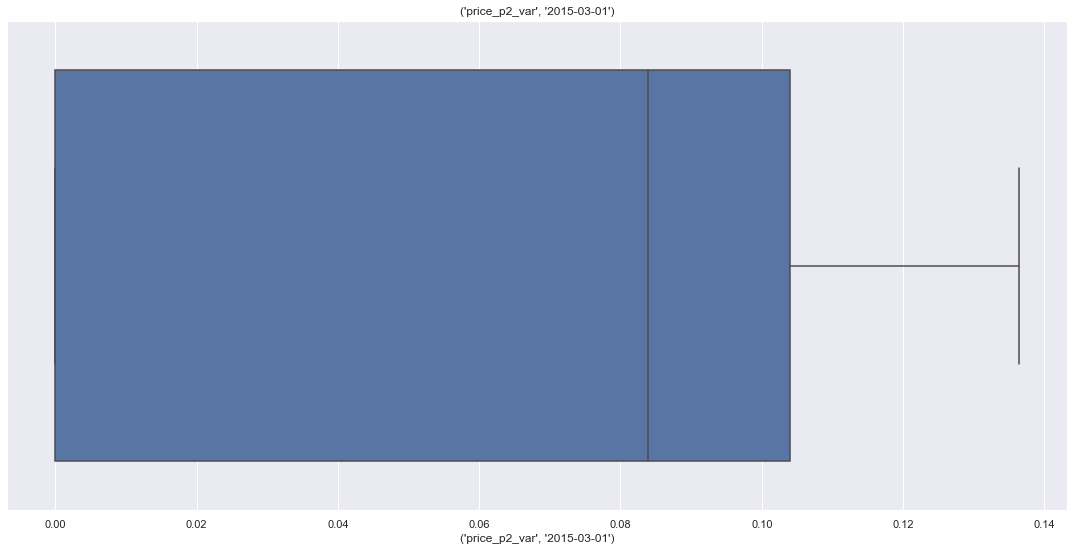

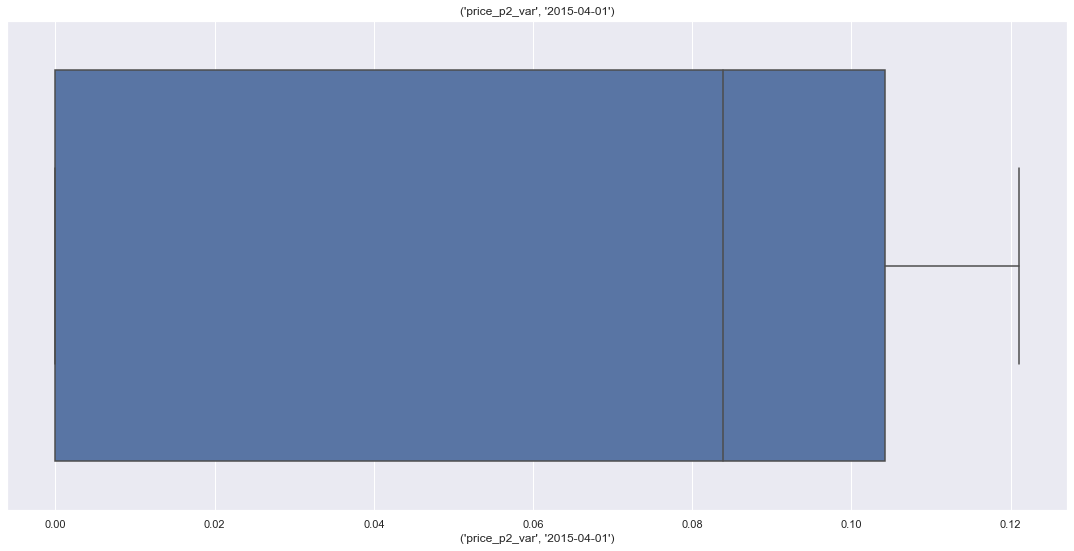

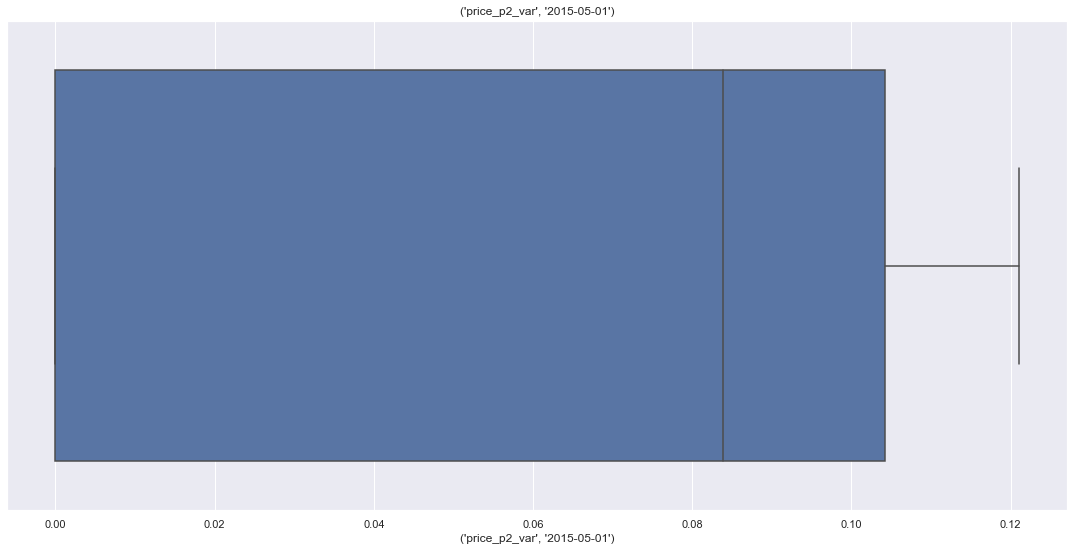

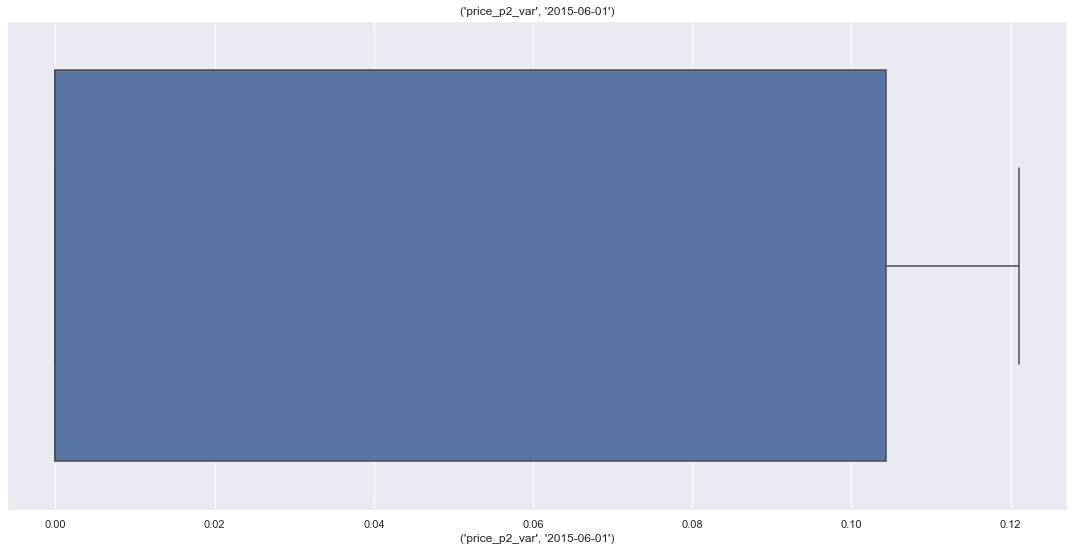

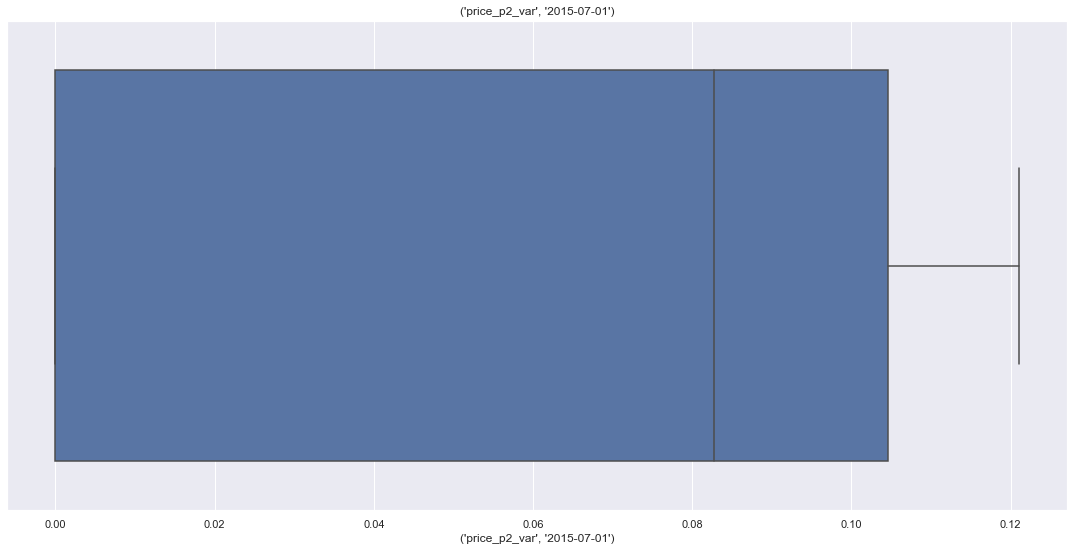

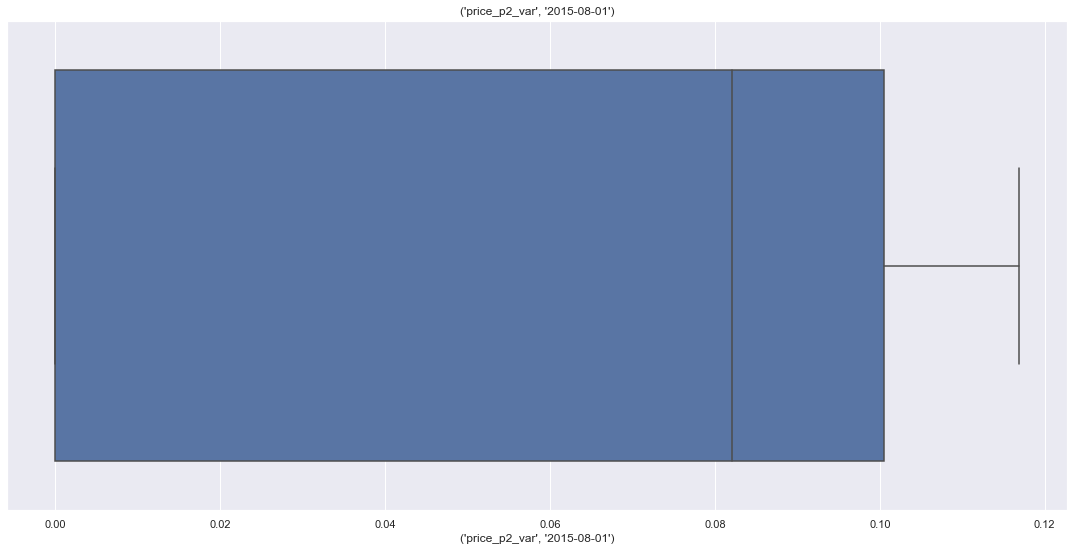

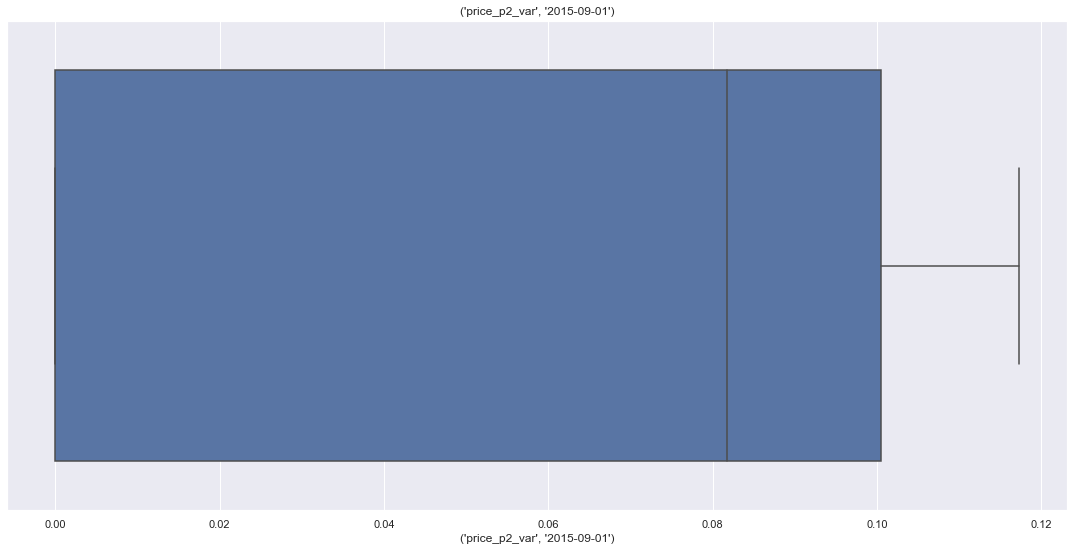

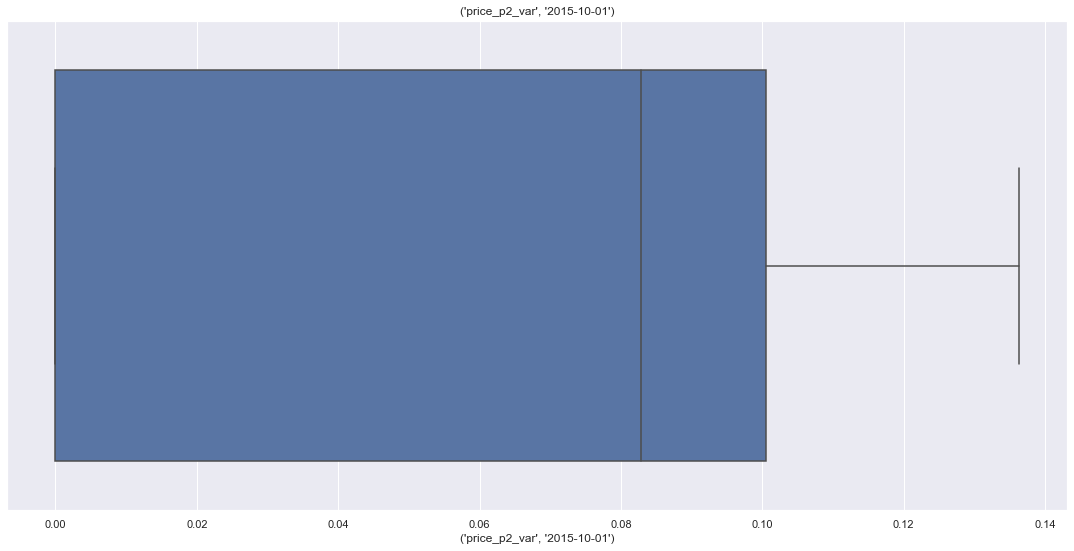

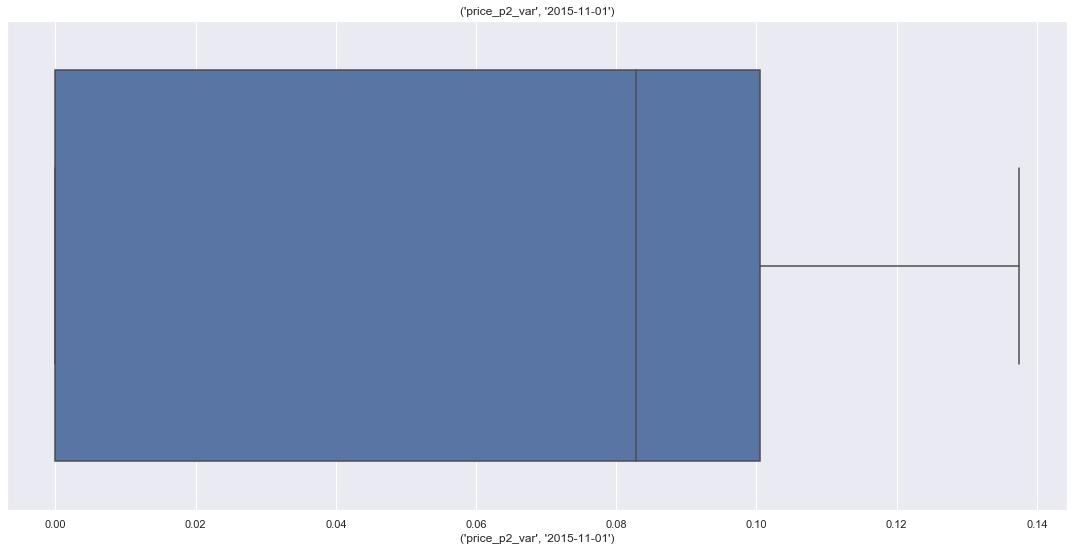

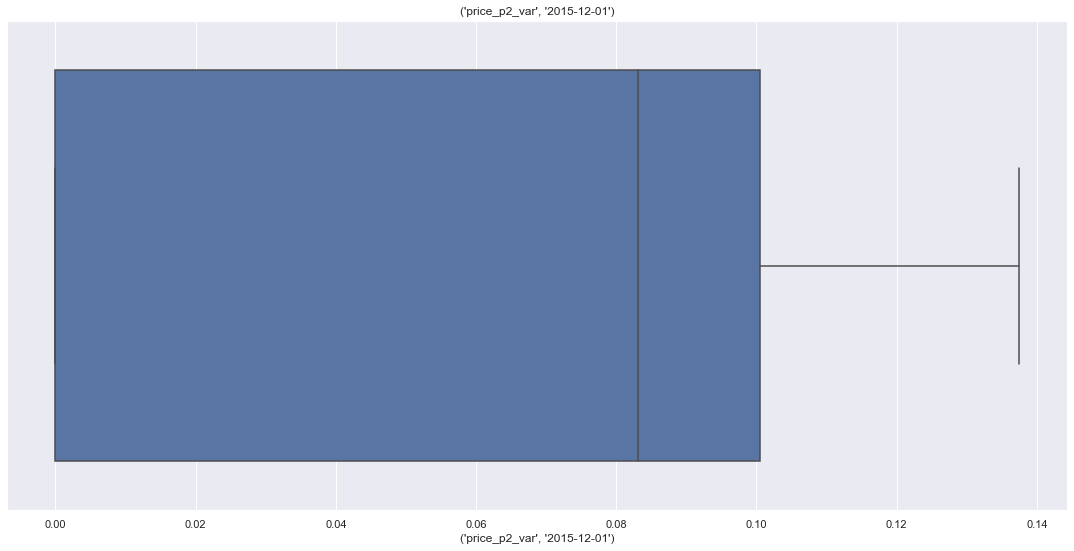

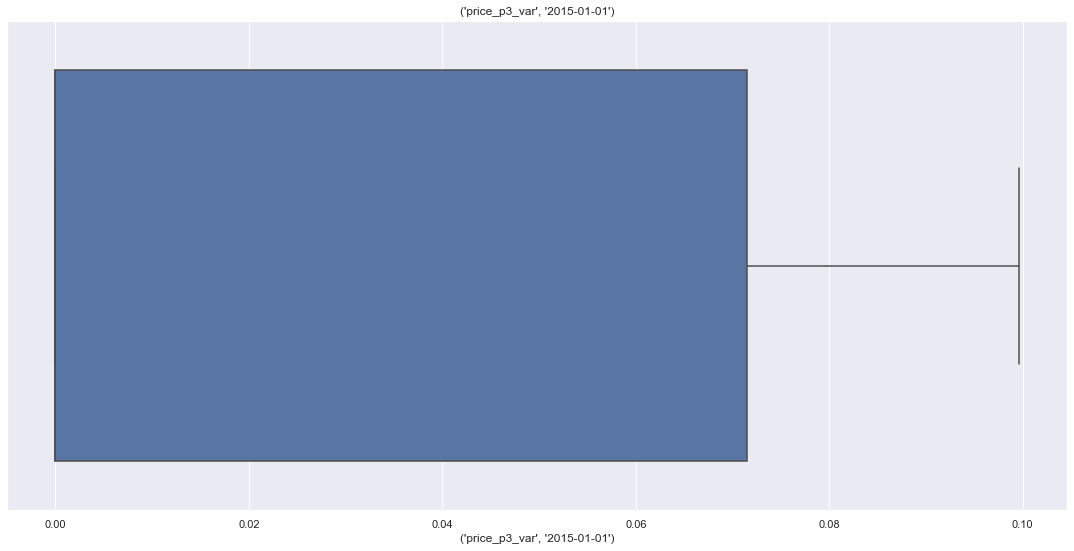

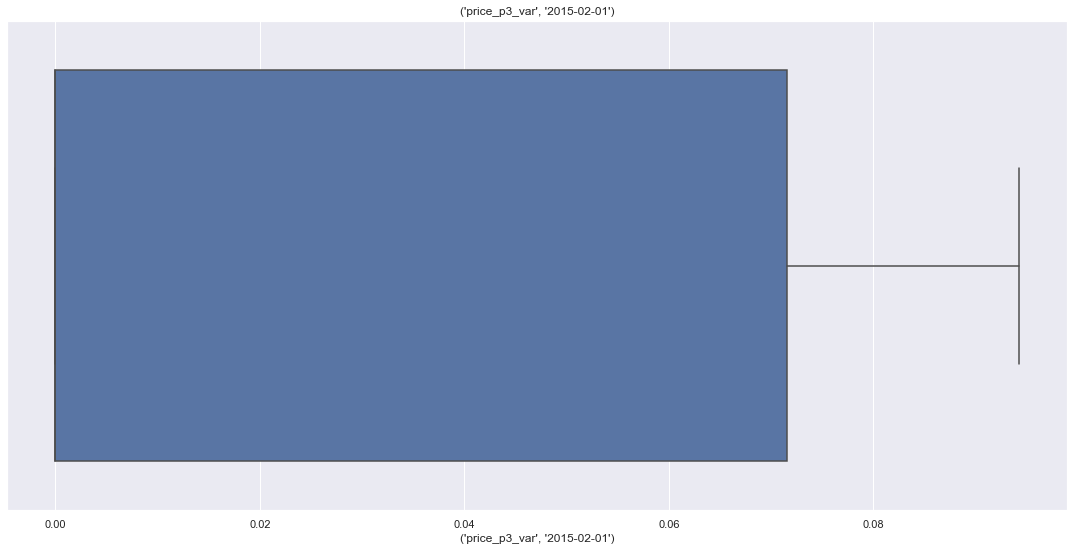

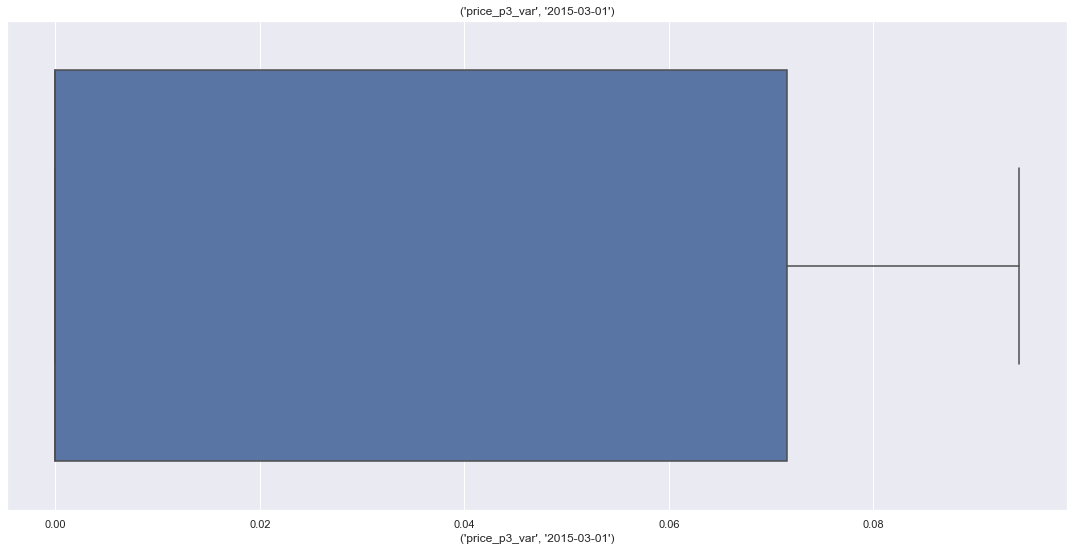

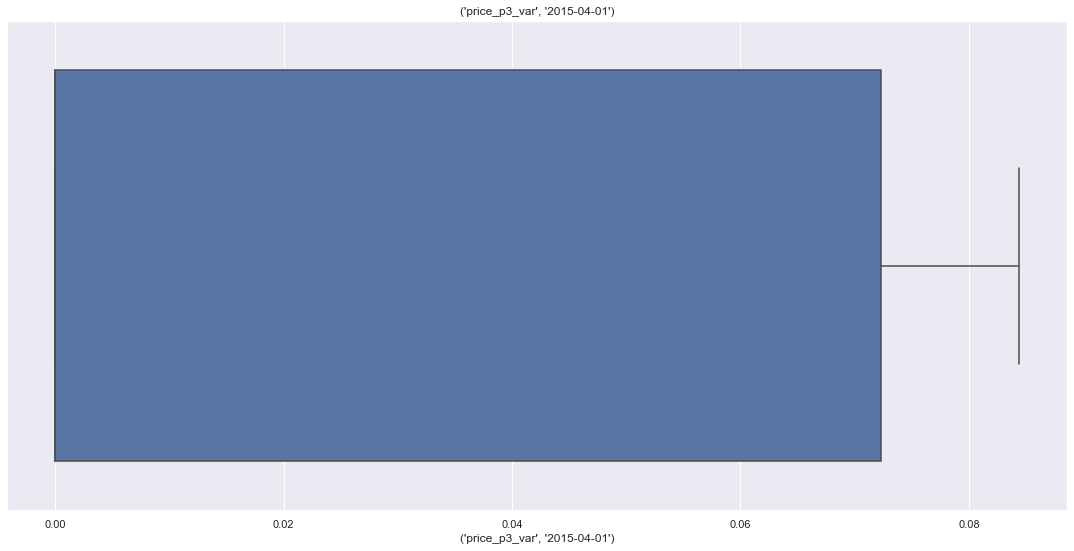

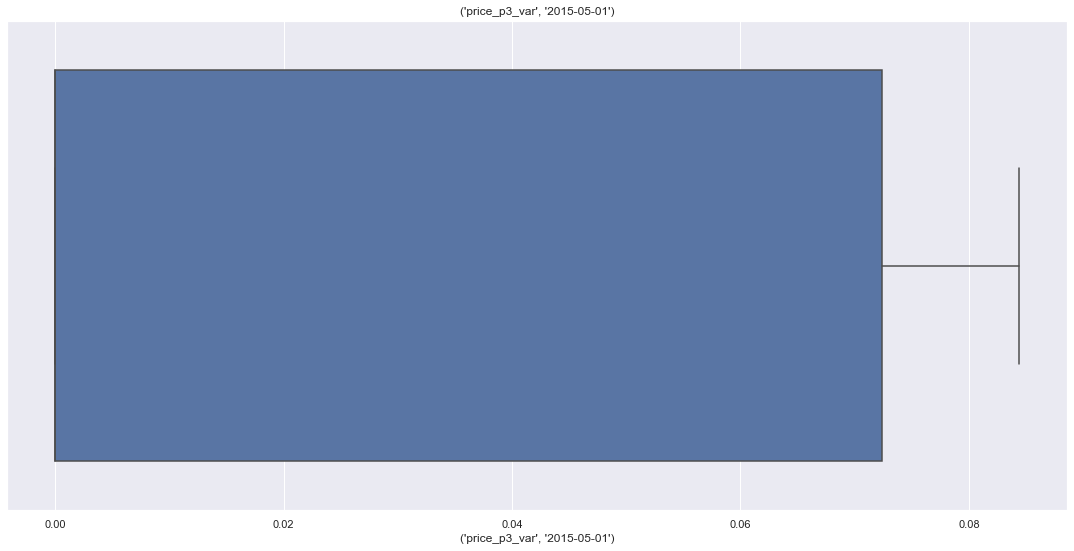

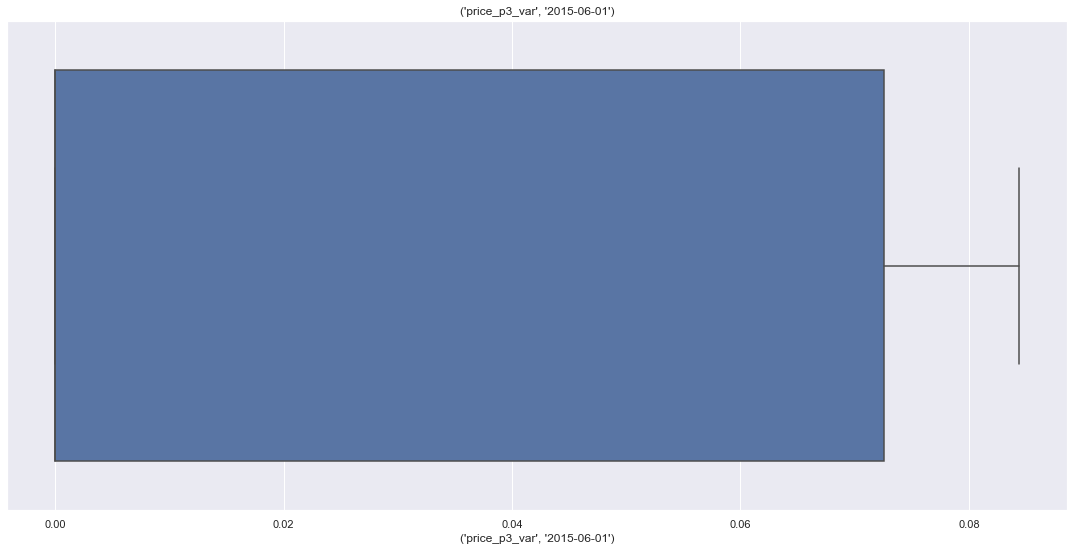

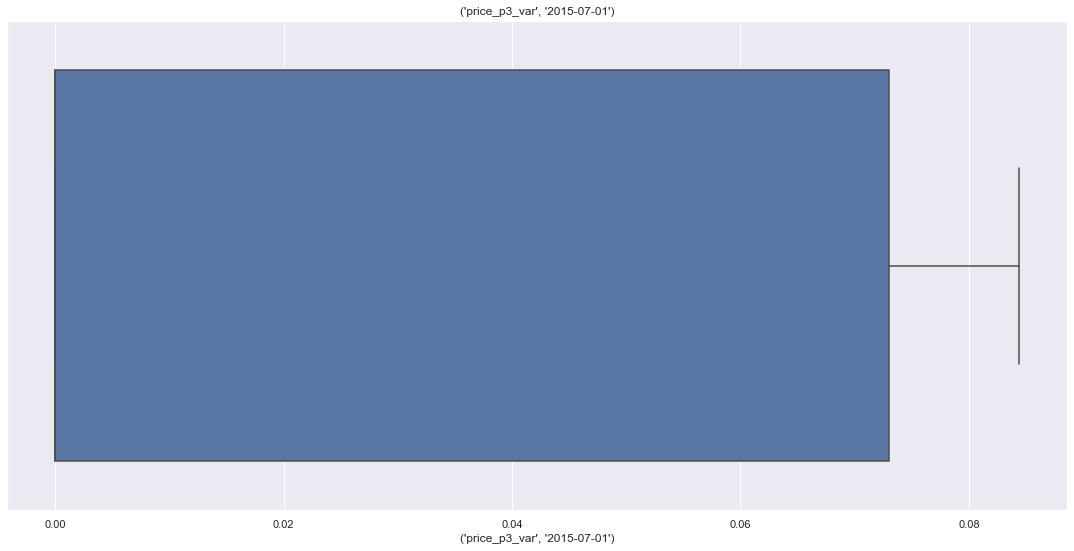

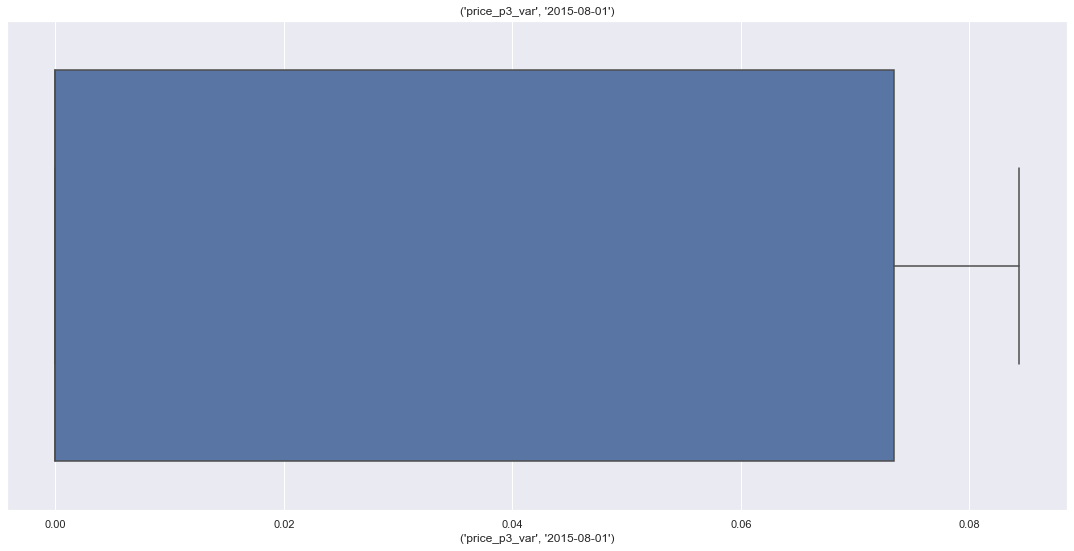

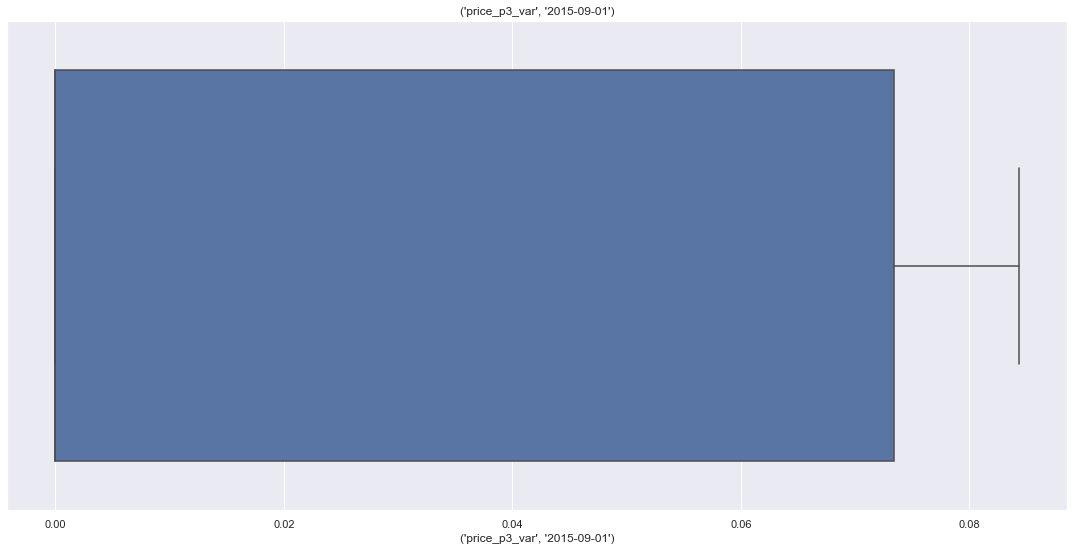

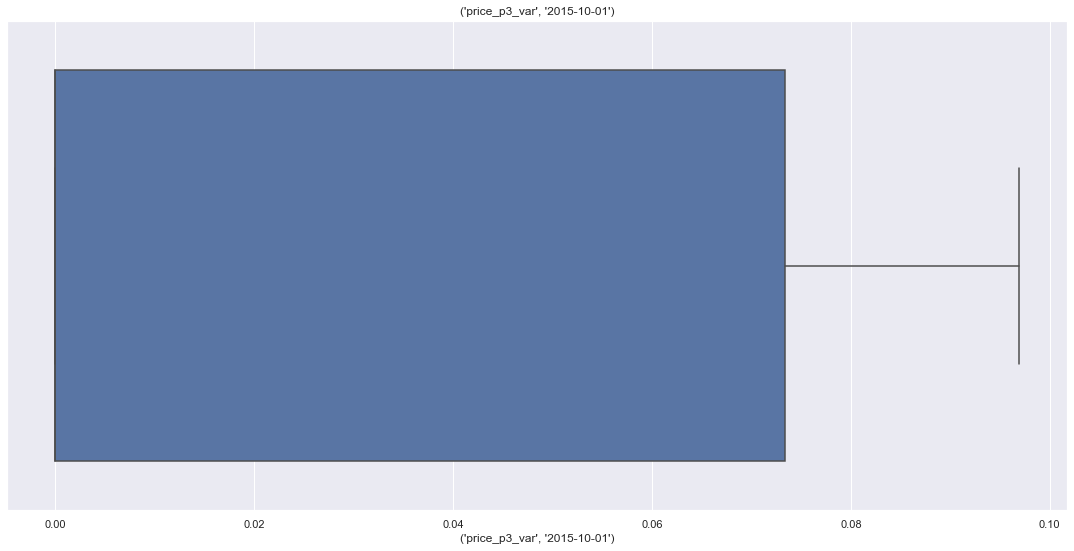

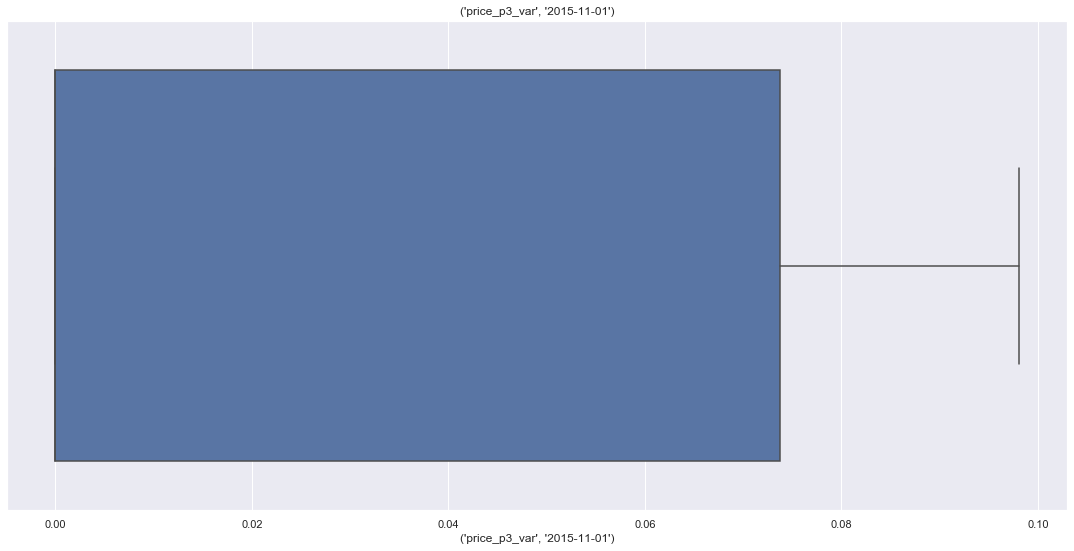

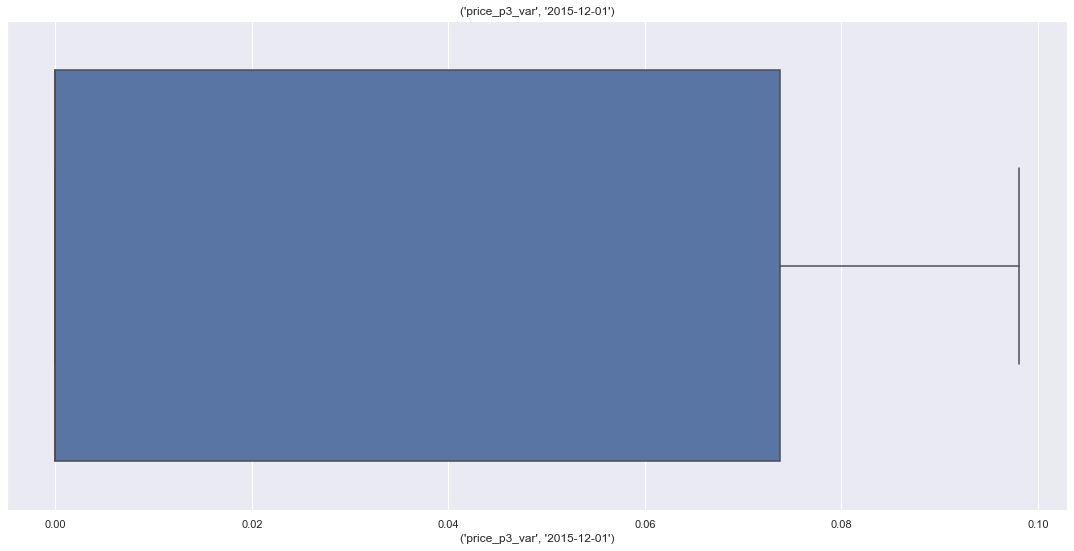

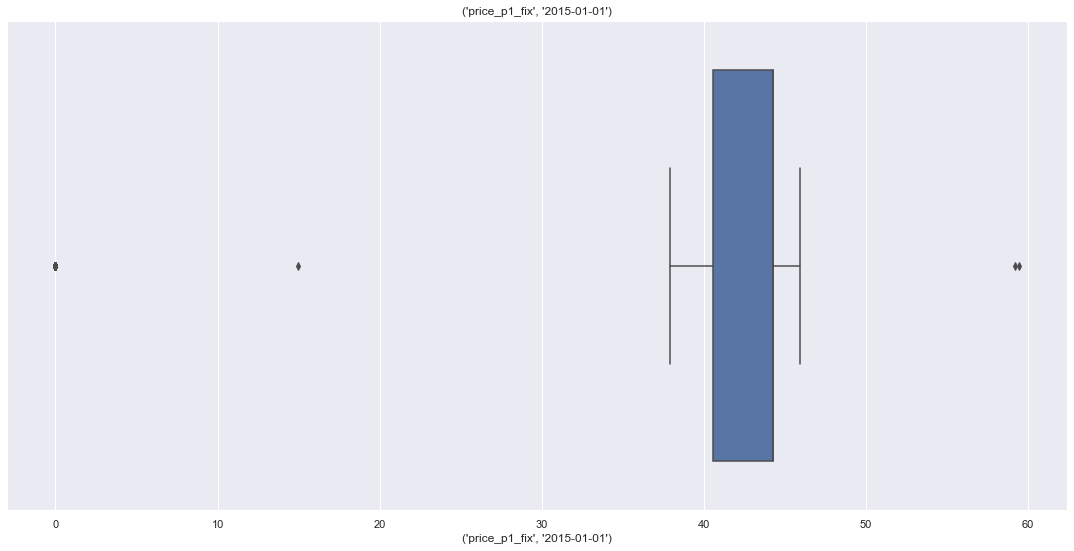

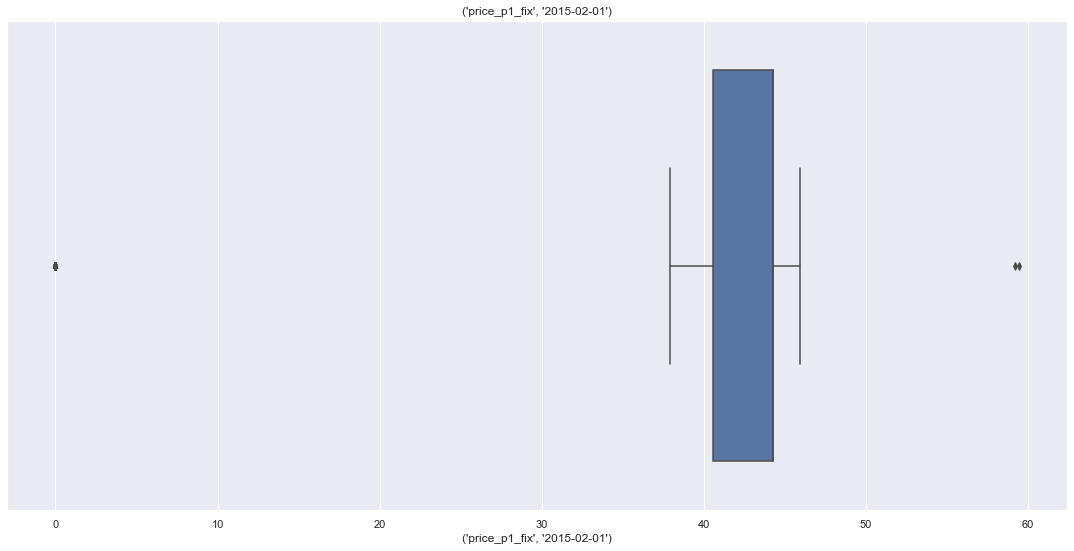

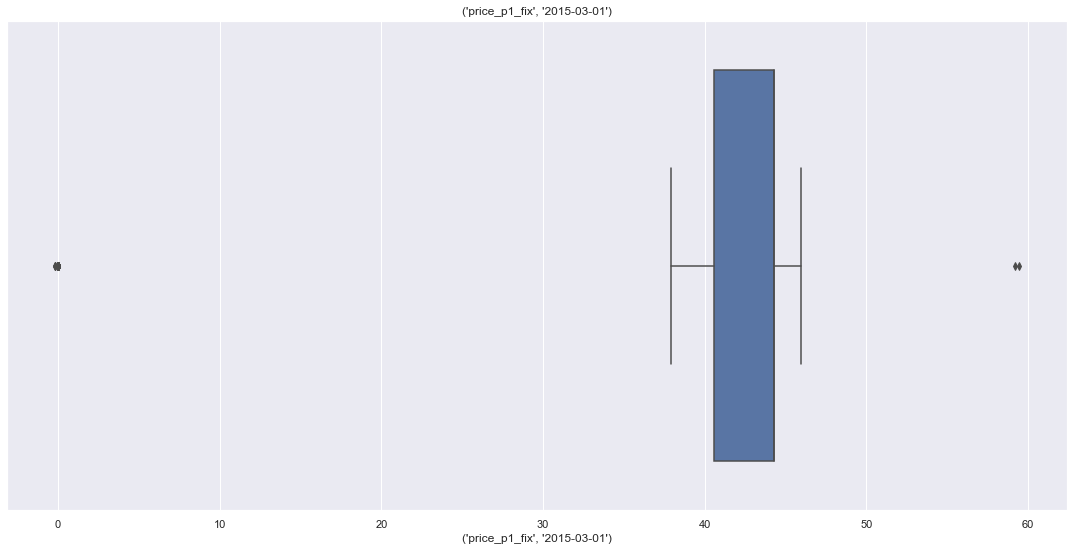

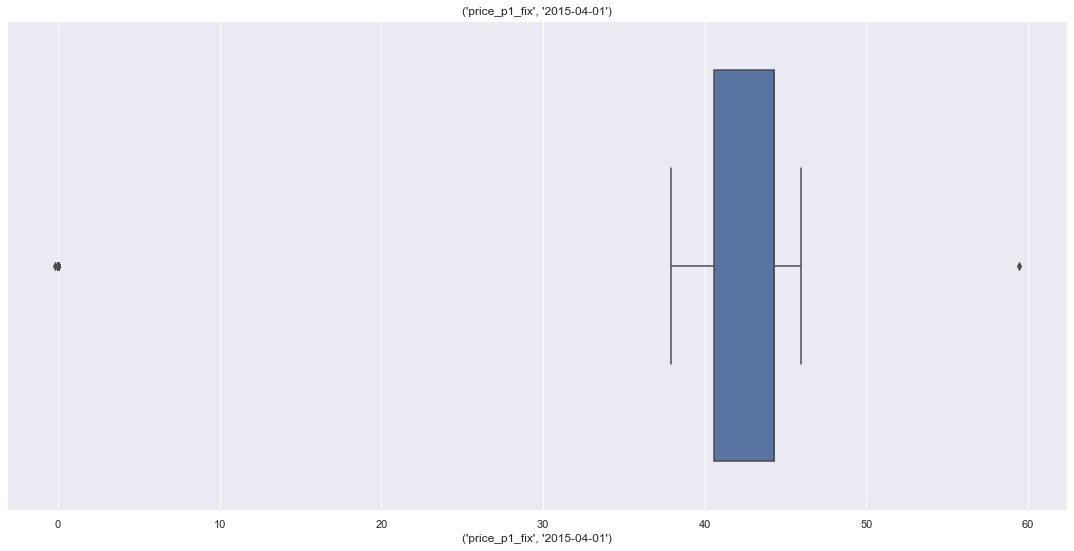

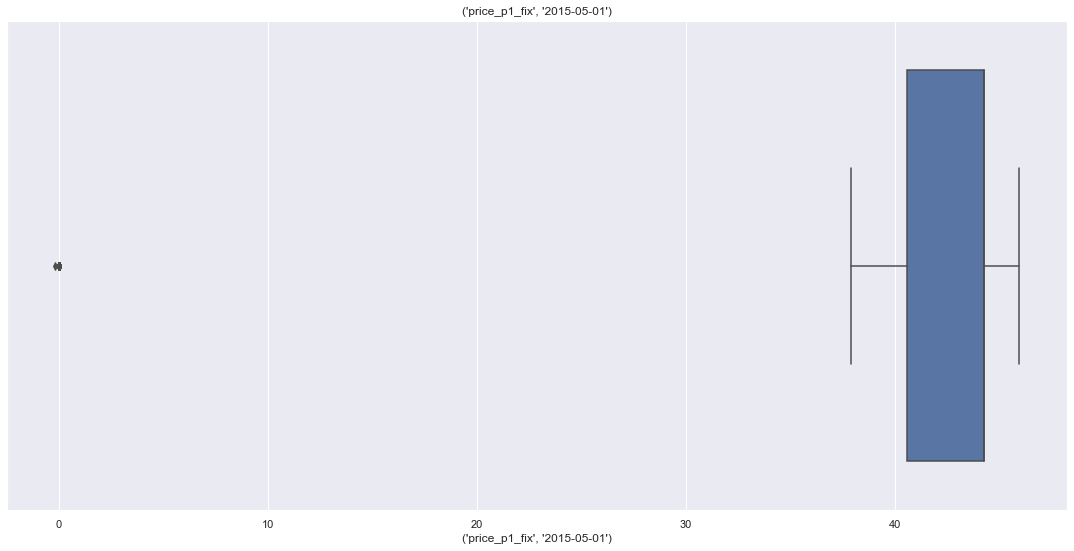

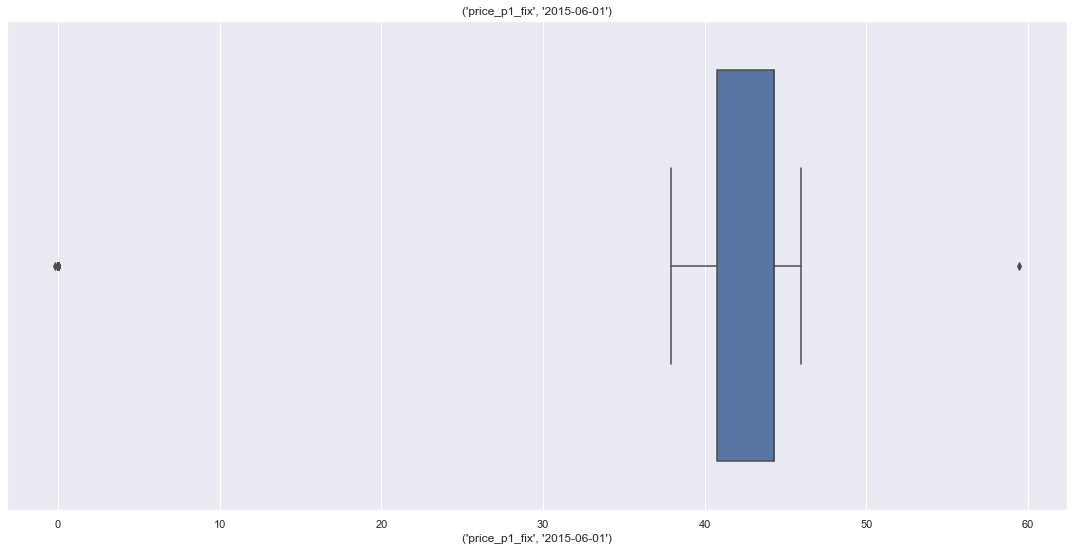

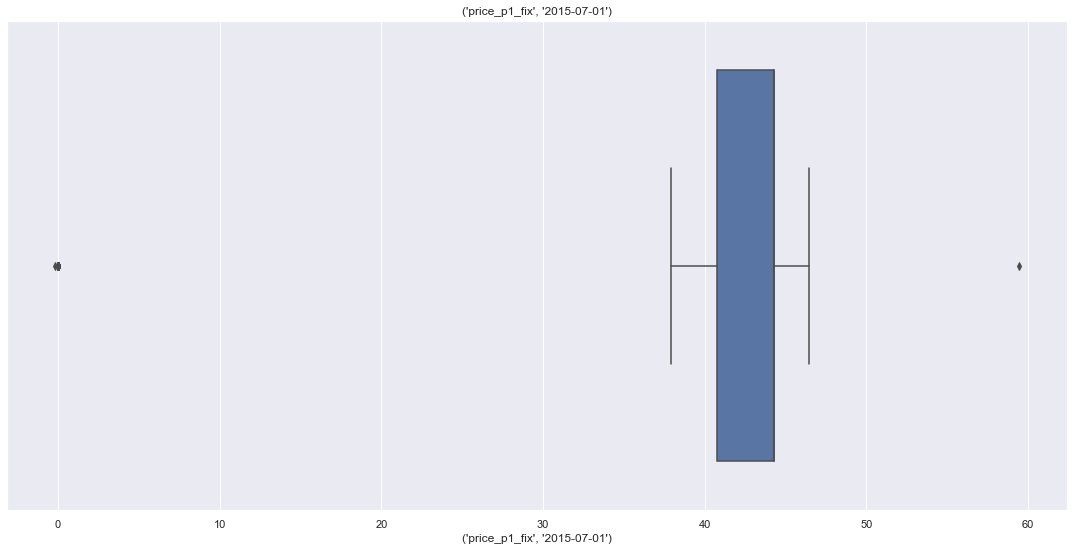

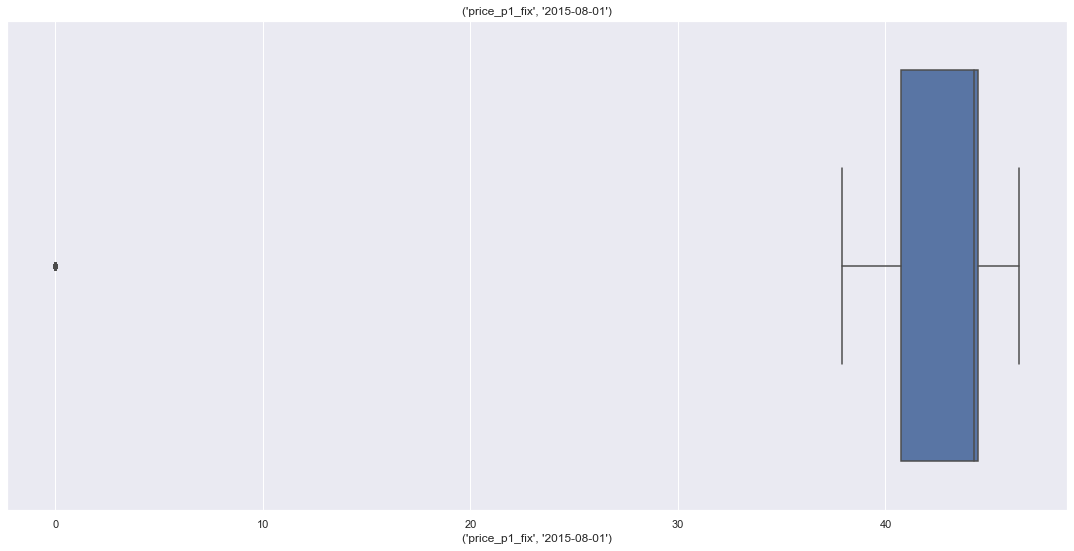

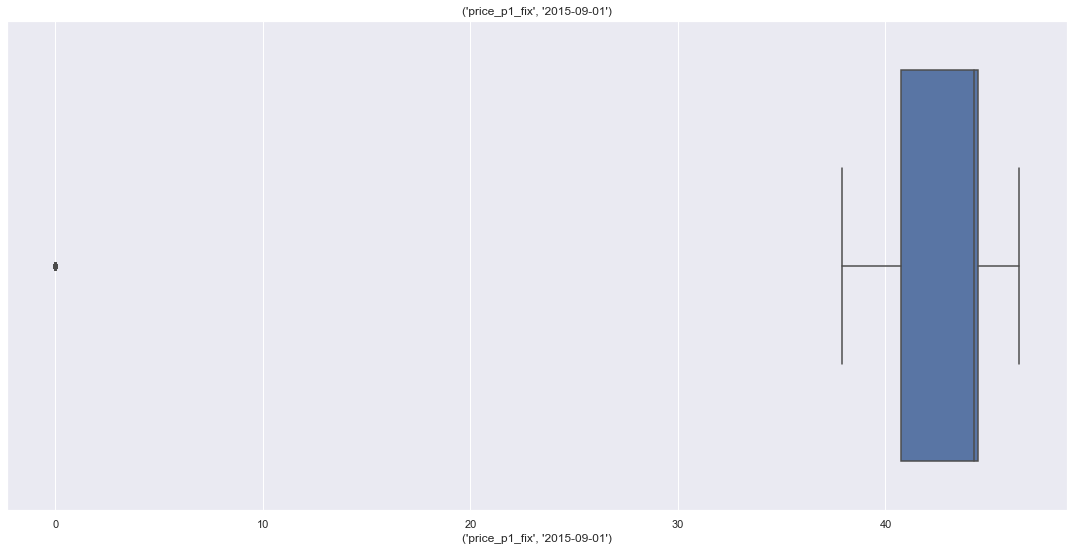

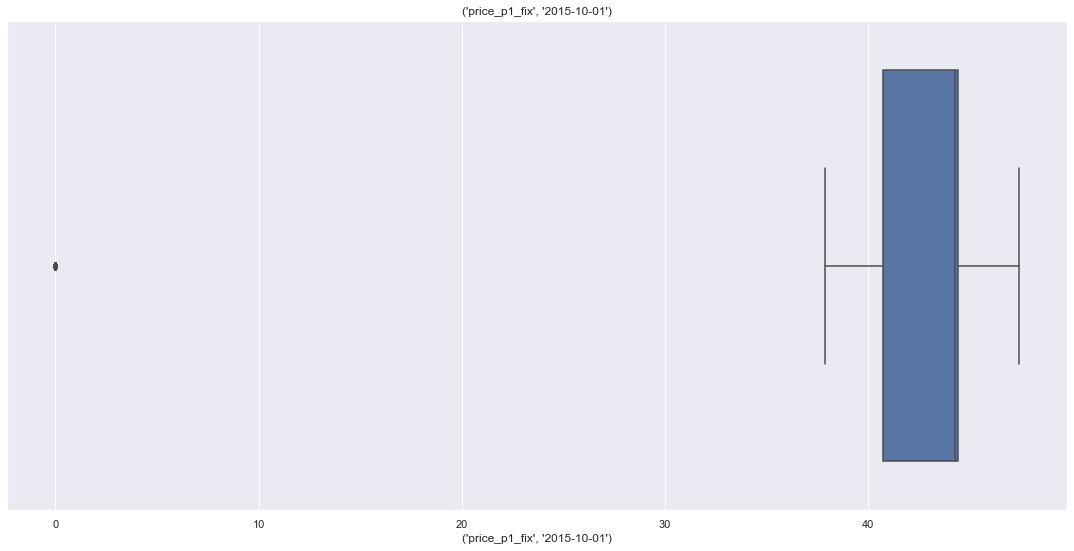

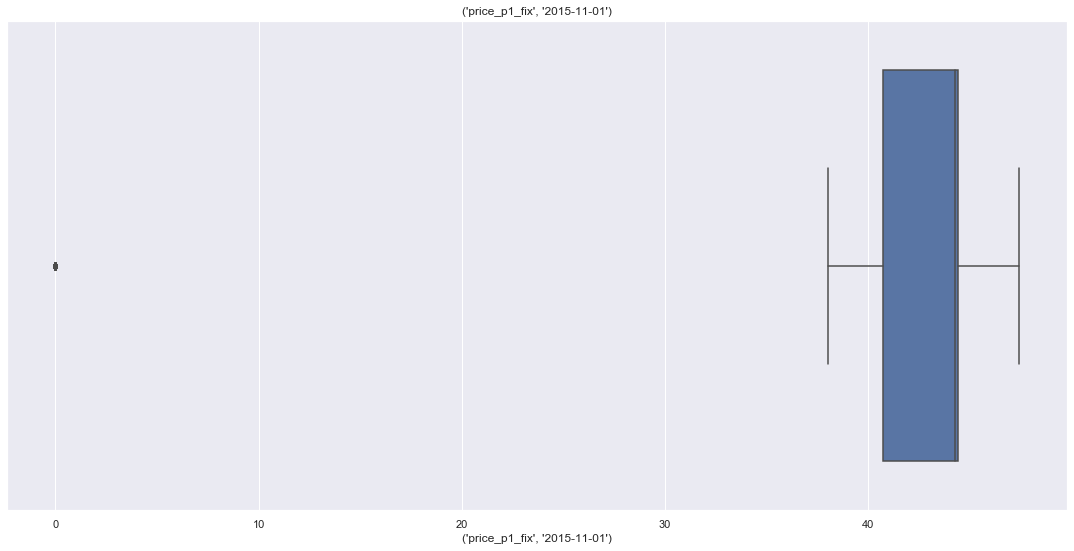

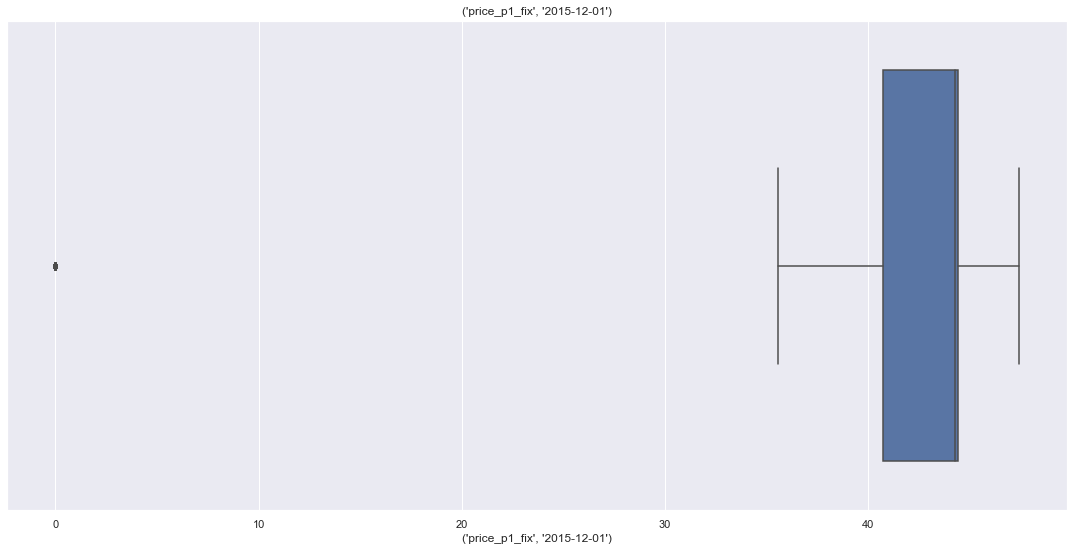

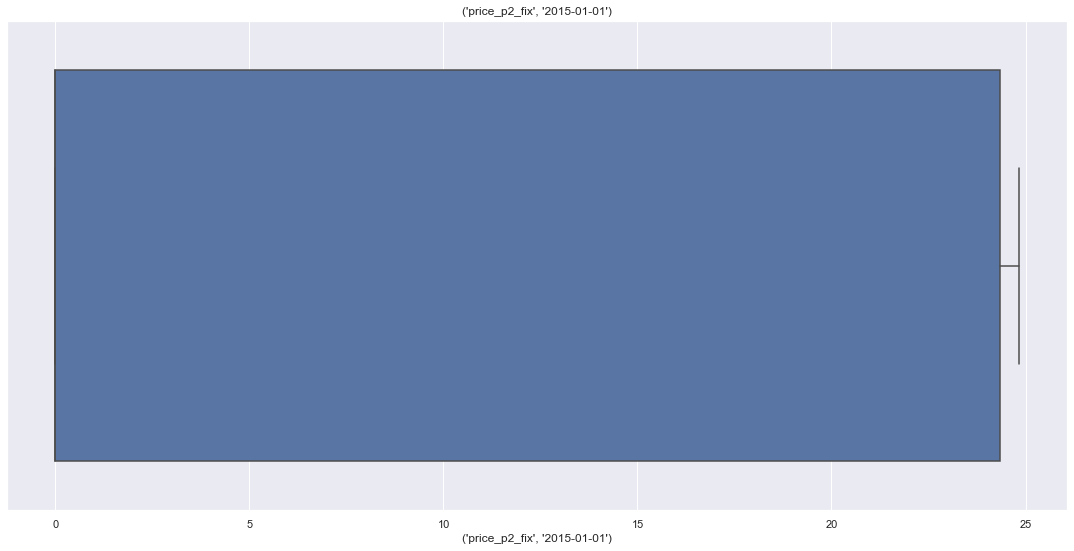

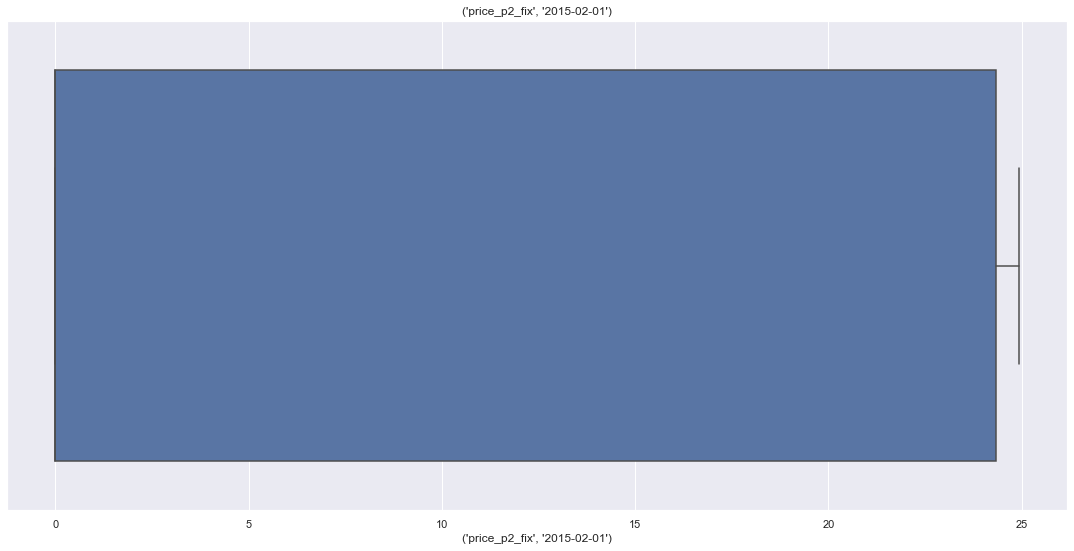

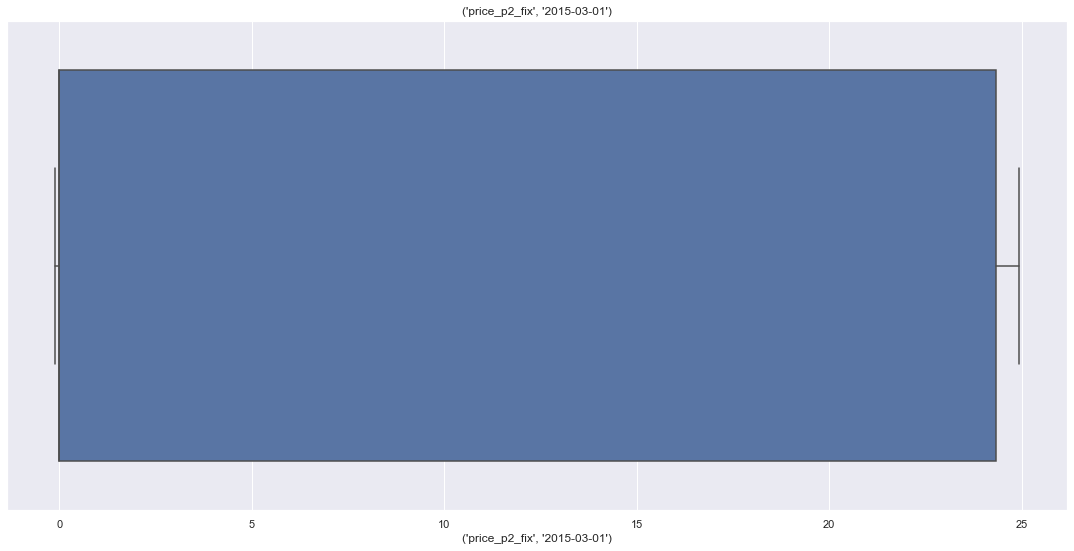

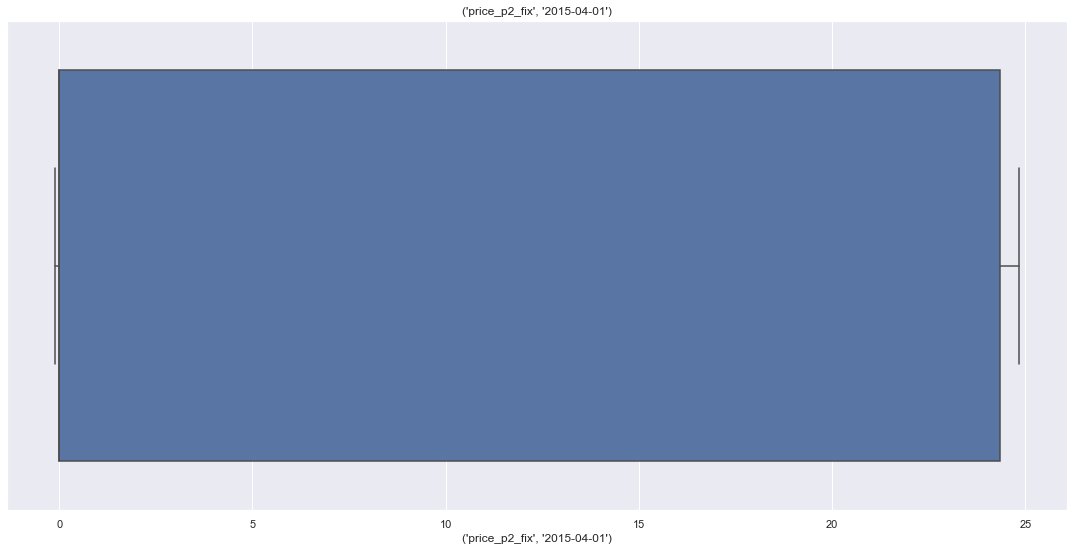

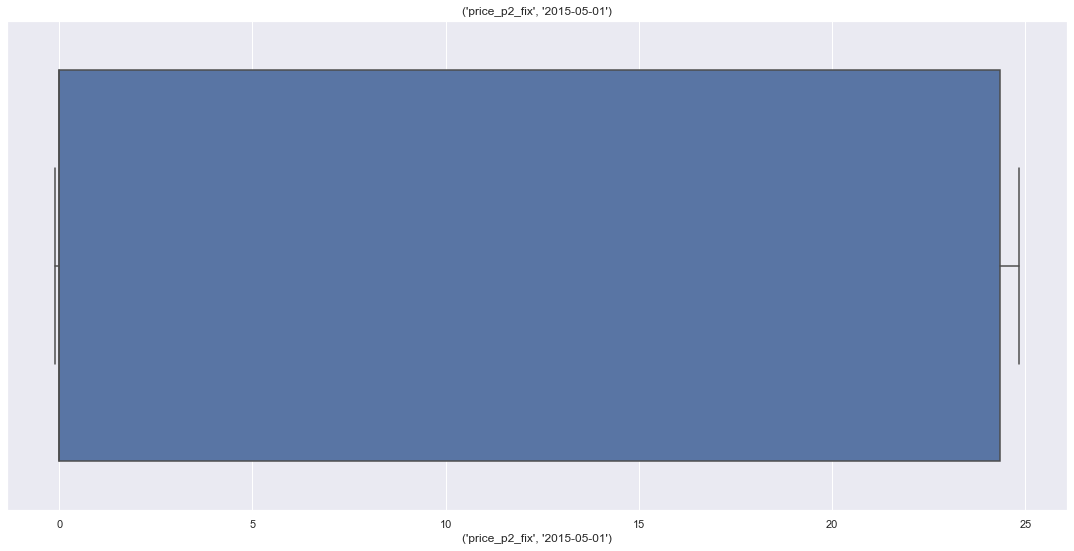

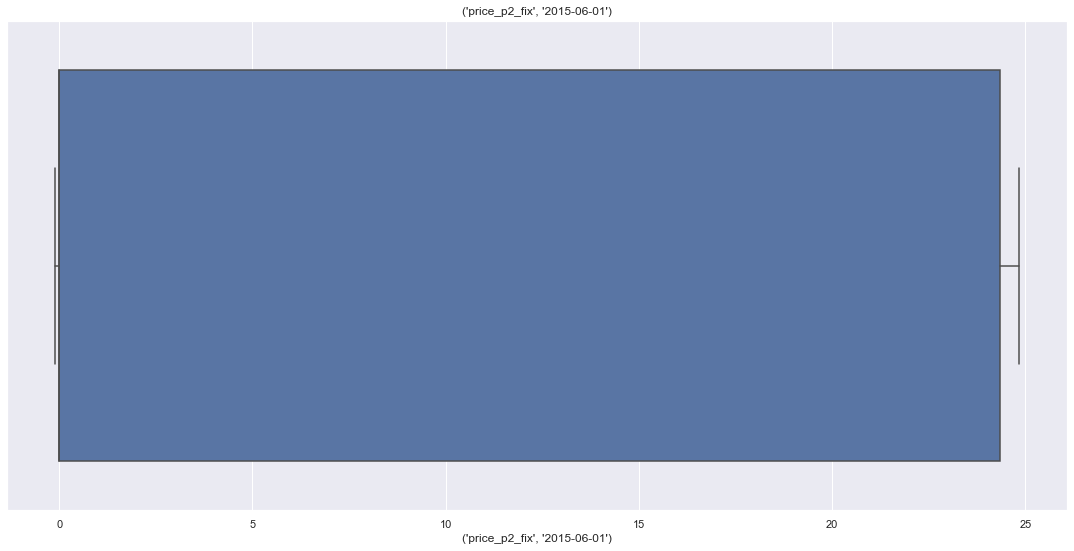

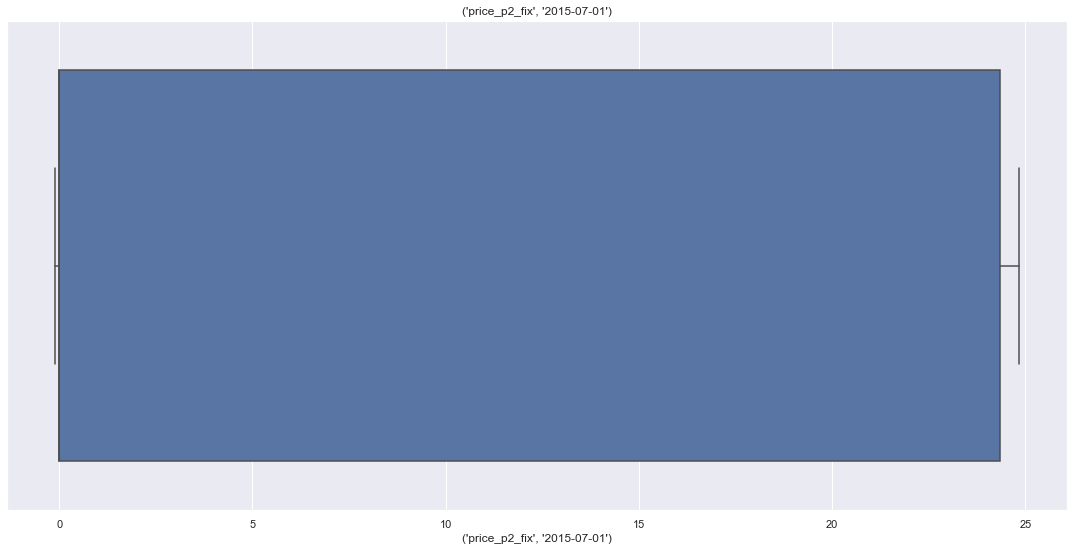

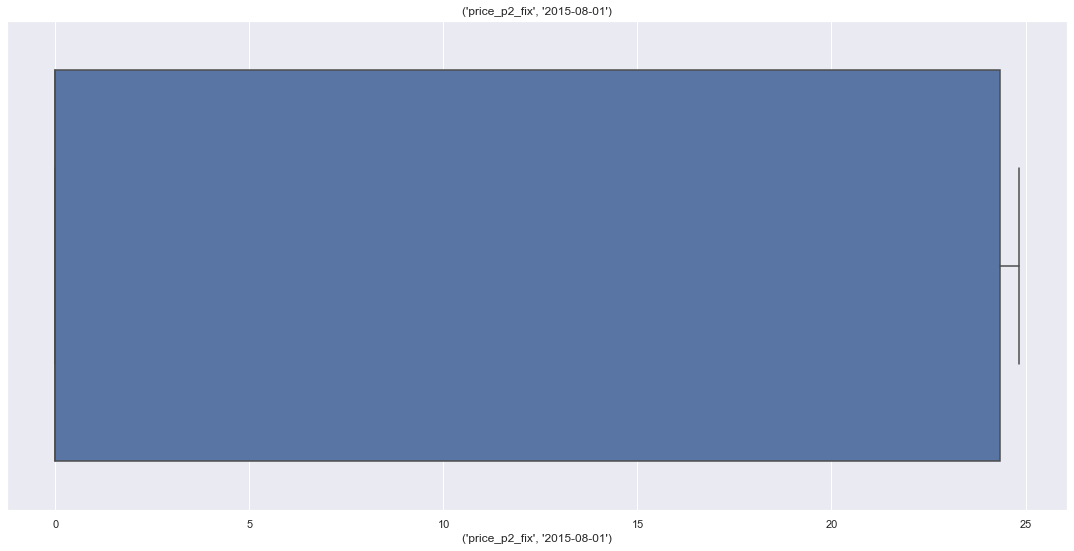

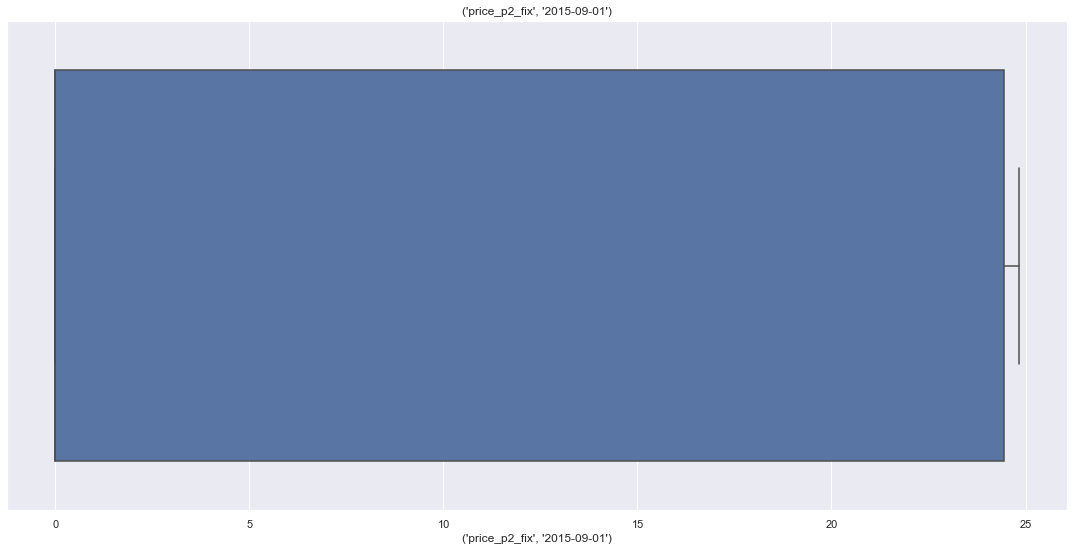

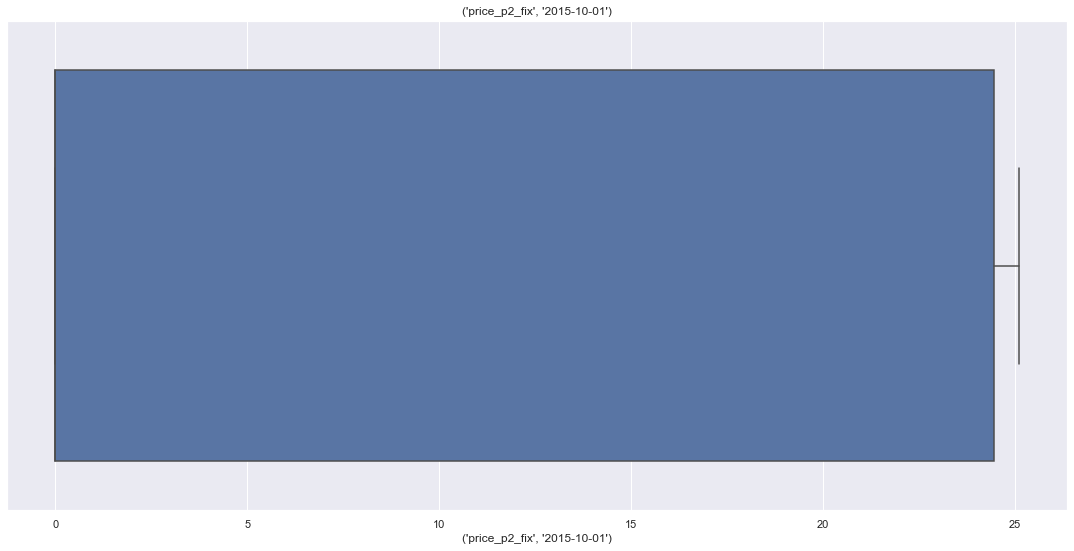

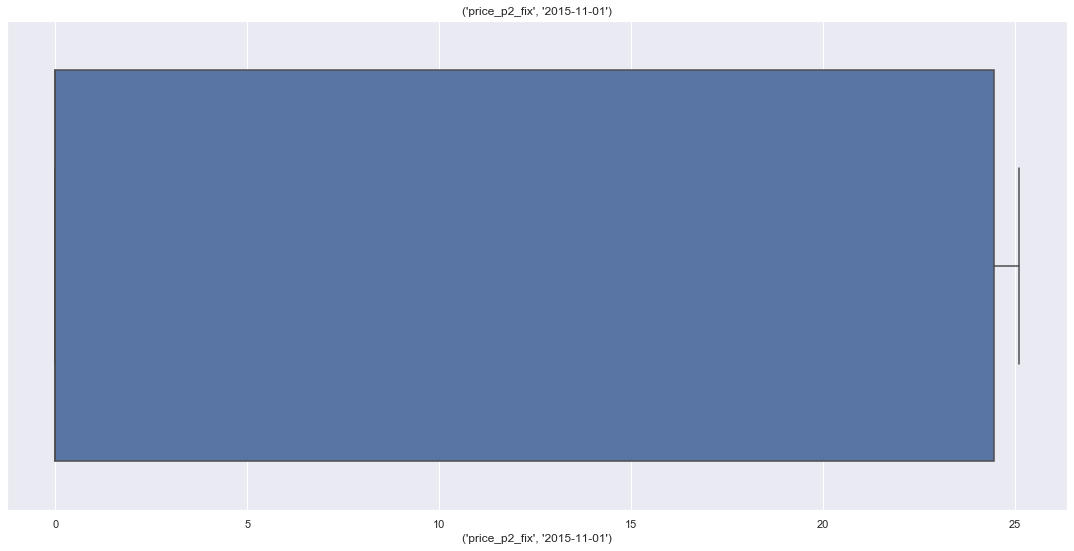

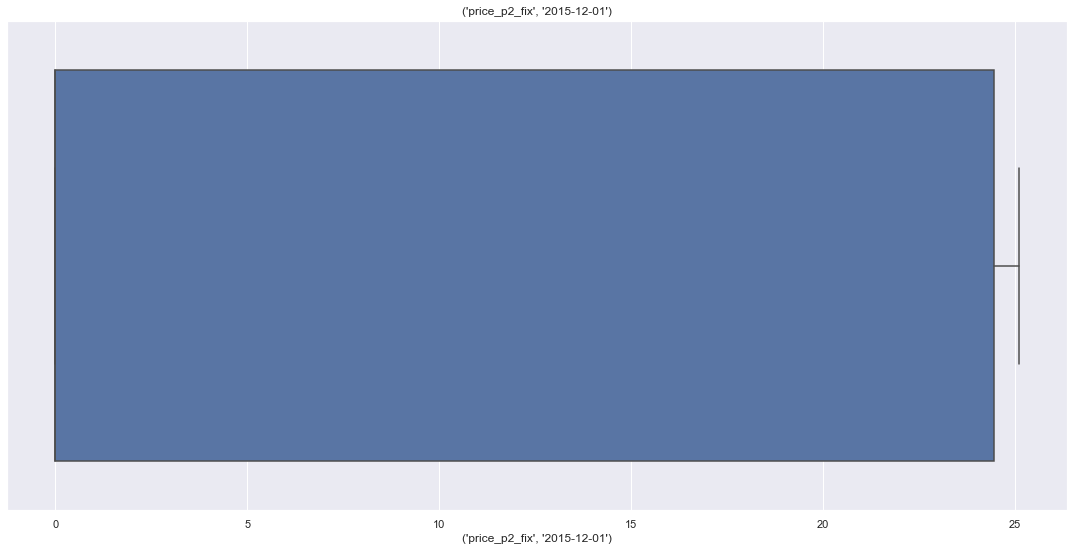

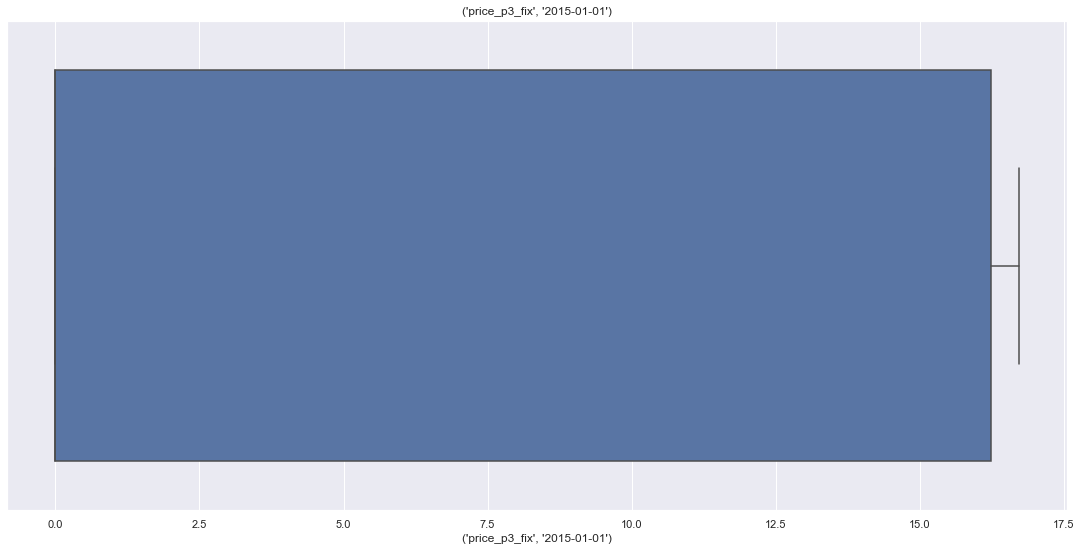

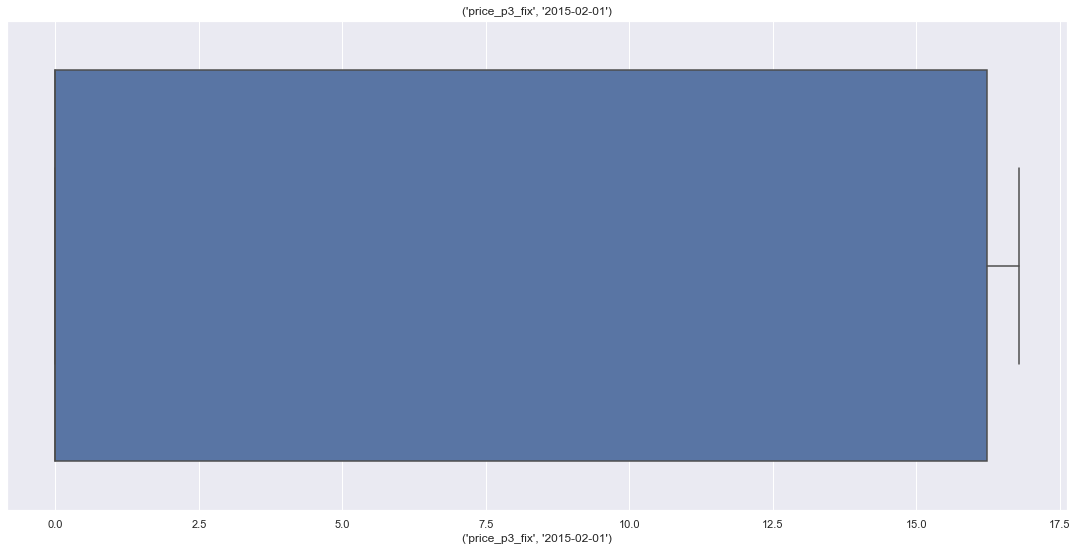

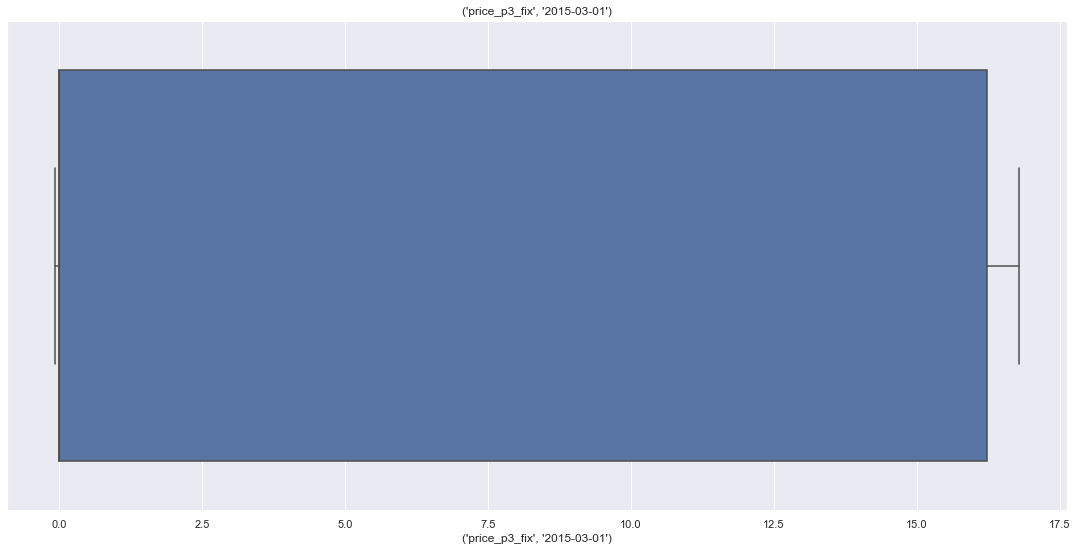

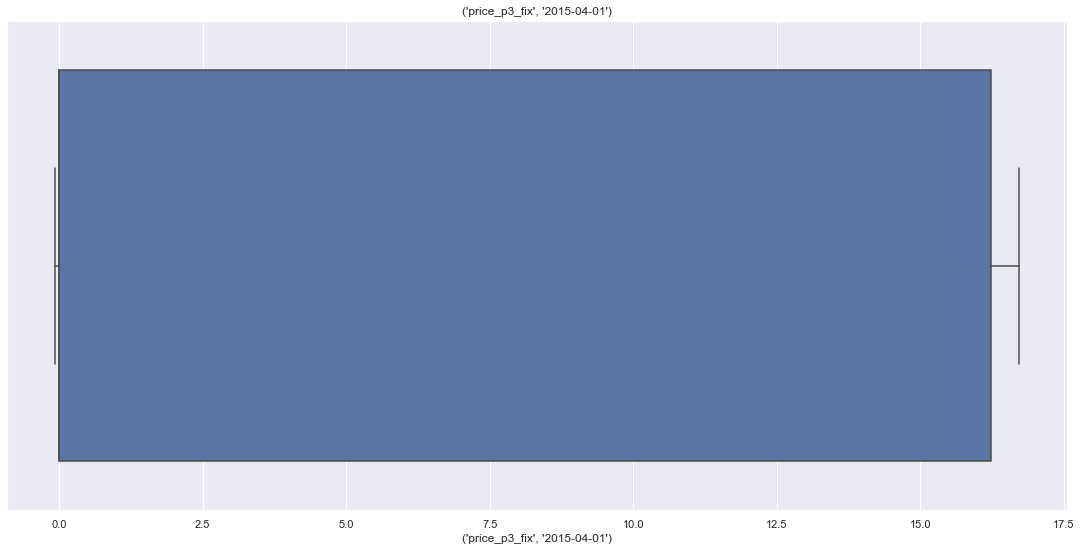

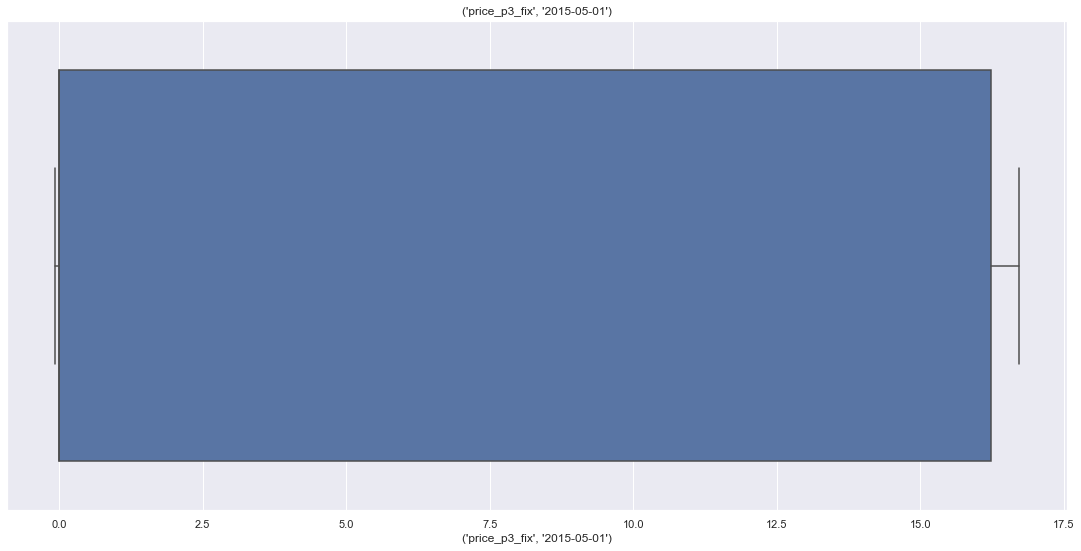

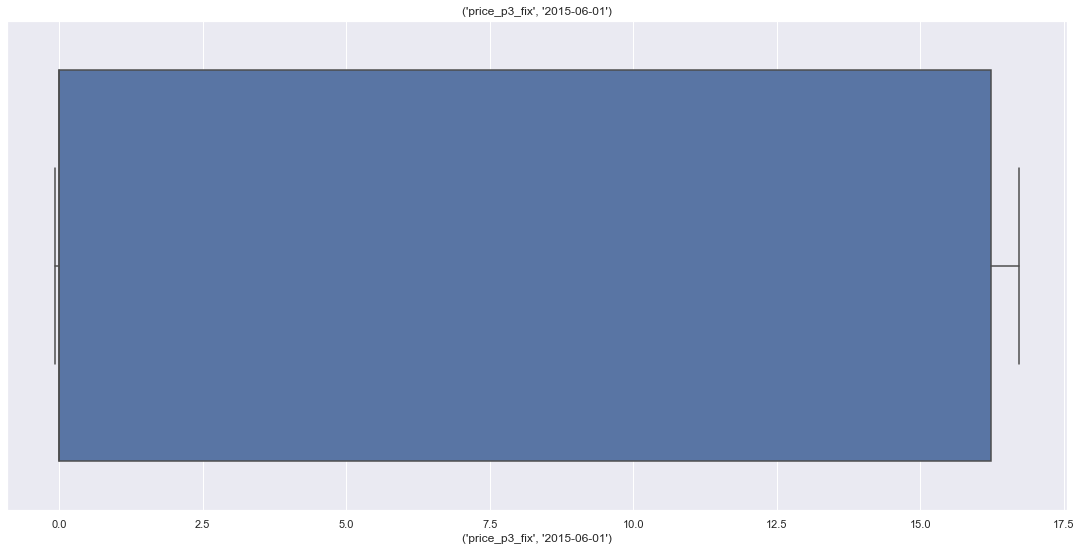

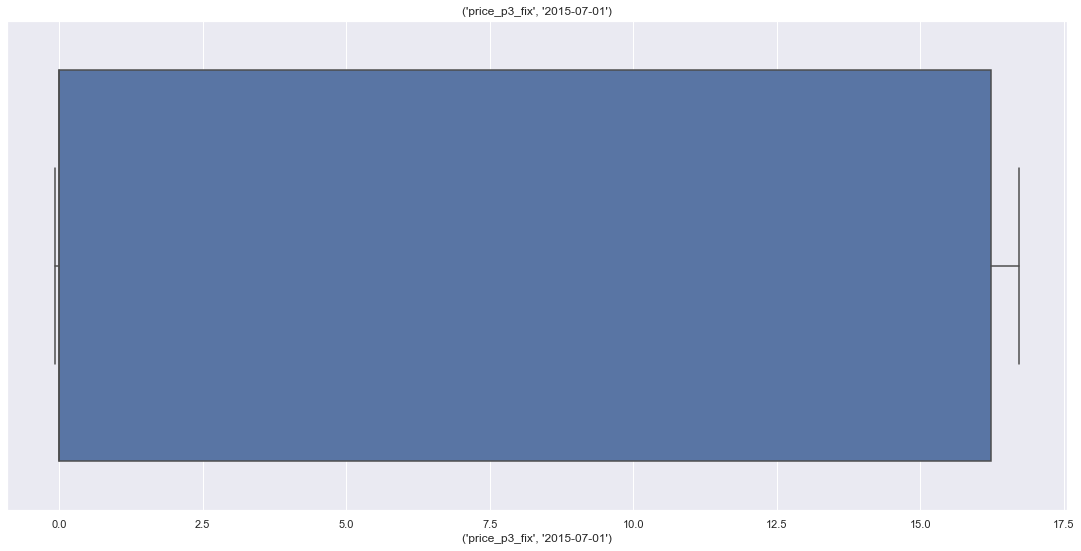

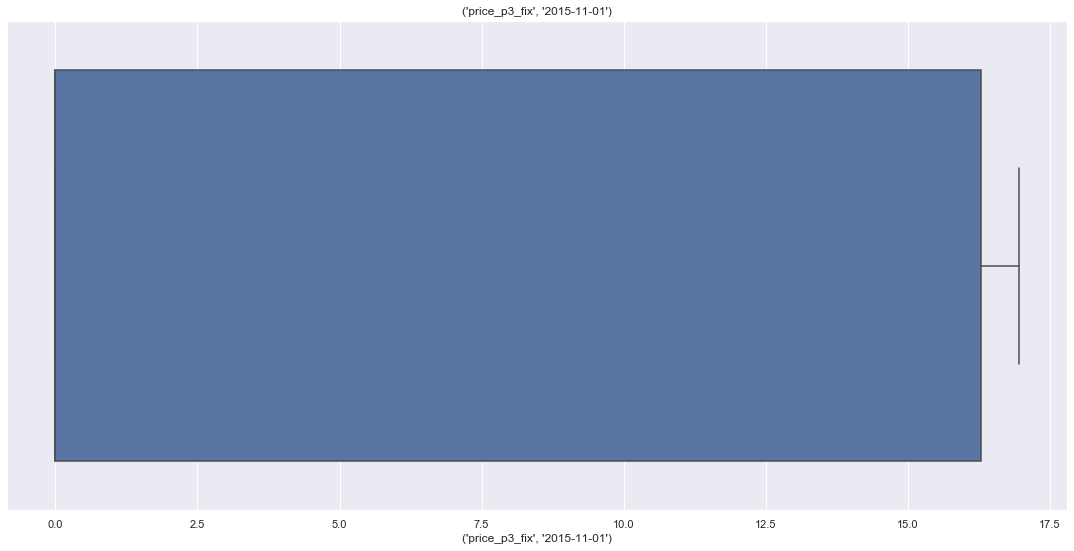

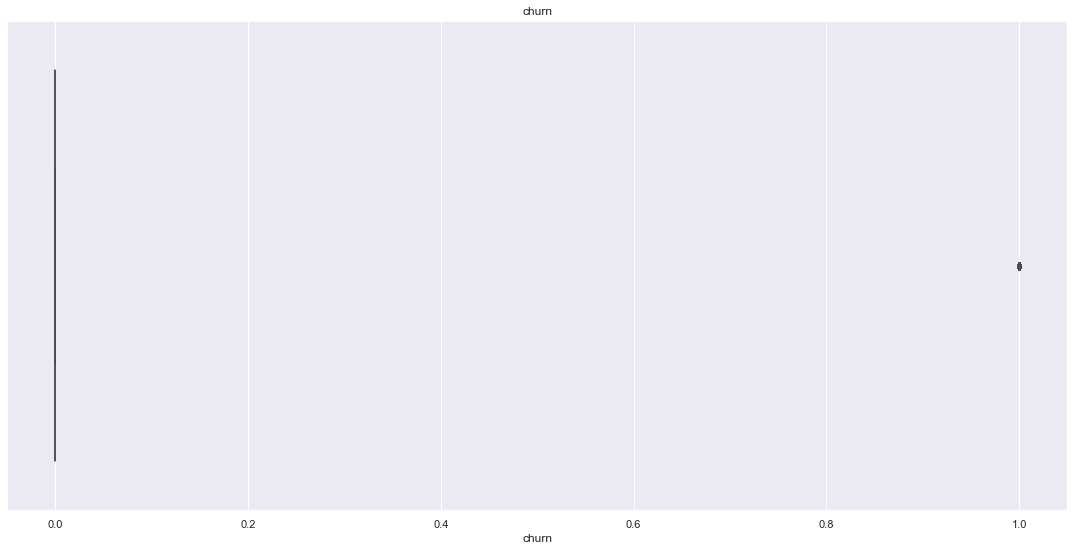

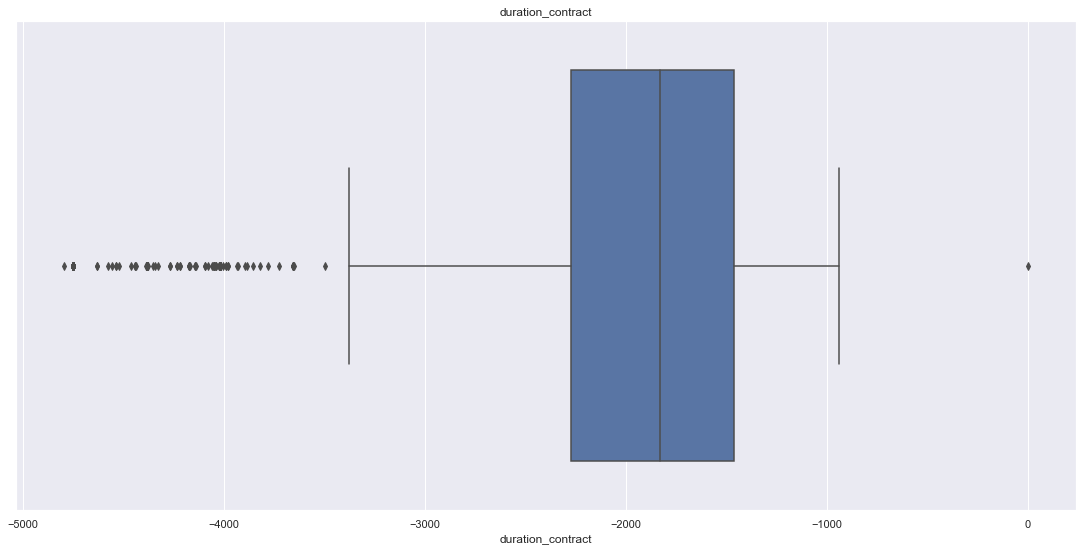

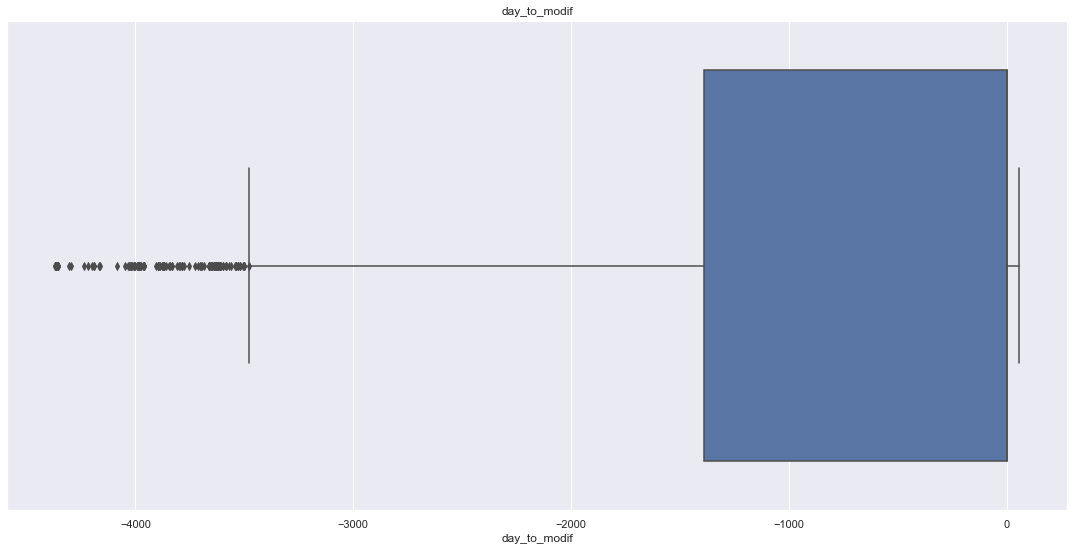

In [711]:
for i in train:
    plt.figure(figsize = (19,9))
    sns.boxplot(train[i])
    plt.title(i)
    plt.show()

### Modelling

In [654]:
x=train.drop('churn',axis=1)
y=train['churn']

In [669]:
y_train.value_counts()

0    9374
1     978
Name: churn, dtype: int64

In [697]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=5)

In [690]:
# from imblearn.over_sampling import SMOTE
# # oversample = SMOTE()
# # X_train, y_train = oversample.fit_resample(X_train, y_train)

# from sklearn.preprocessing import RobustScaler
# sc = RobustScaler()
# scaler = sc.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [700]:
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=500,n_jobs=-1,scale_pos_weight=10)
result = model.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [694]:
predictions = result.predict(X_test)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

print('\n accuracy:', accuracy_score(y_test, predictions))

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3135
           1       0.31      0.23      0.27       316

    accuracy                           0.88      3451
   macro avg       0.62      0.59      0.60      3451
weighted avg       0.87      0.88      0.87      3451

Confusion matrix:
[[2969  166]
 [ 242   74]]

 accuracy: 0.8817733990147784


In [681]:
import shap
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold


def calculate_roc_auc(model_, X_test_, y_test_):
 """
 Evaluate the roc-auc score
 """

 # Get the model predictions
 # Note that we are using the prediction for the class 1 -> churn
 prediction_test_ = model_.predict_proba(X_test_)[:,1]
 # Compute roc-auc
 fpr, tpr, thresholds = metrics.roc_curve(y_test_, prediction_test_)

 # Print the evaluation metrics as pandas dataframe
 score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})
 return fpr, tpr, score
def plot_roc_auc(fpr,tpr):
    # Initialize plot
     f, ax = plt.subplots(figsize=(14,8))

     # Plot ROC
     roc_auc = metrics.auc(fpr, tpr)
     ax.plot(fpr, tpr, lw=2, alpha=0.3,
     label="AUC = %0.2f" % (roc_auc))
     # Plot the random line.
     plt.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r',
     label="Random", alpha=.8)

     # Fine tune and show the plot.
     ax.set_xlim([-0.05, 1.05])
     ax.set_ylim([-0.05, 1.05])
     ax.set_xlabel("False Positive Rate (FPR)")
     ax.set_ylabel("True Positive Rate (TPR)")
     ax.set_title("ROC-AUC")
     ax.legend(loc="lower right")
     plt.show()


In [695]:
fpr, tpr, auc_score = calculate_roc_auc(model, X_test, y_test)


In [696]:
auc_score

,ROC-AUC
0,0.666026


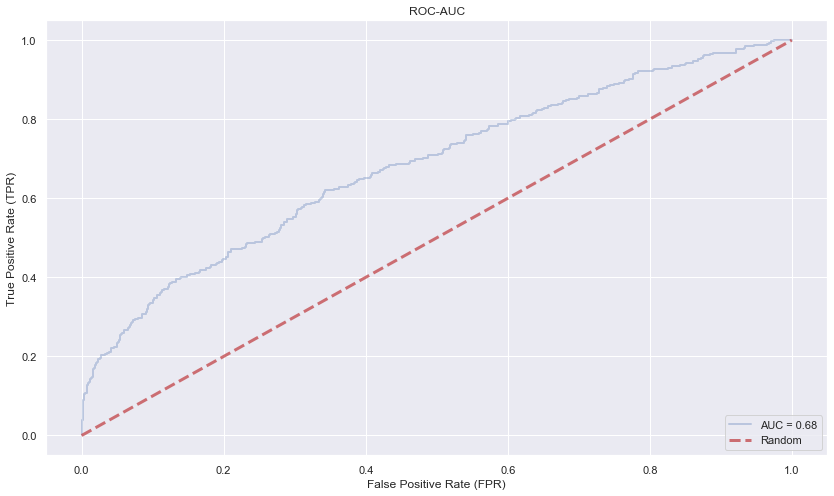

In [661]:
plot_roc_auc(fpr, tpr)
plt.show()

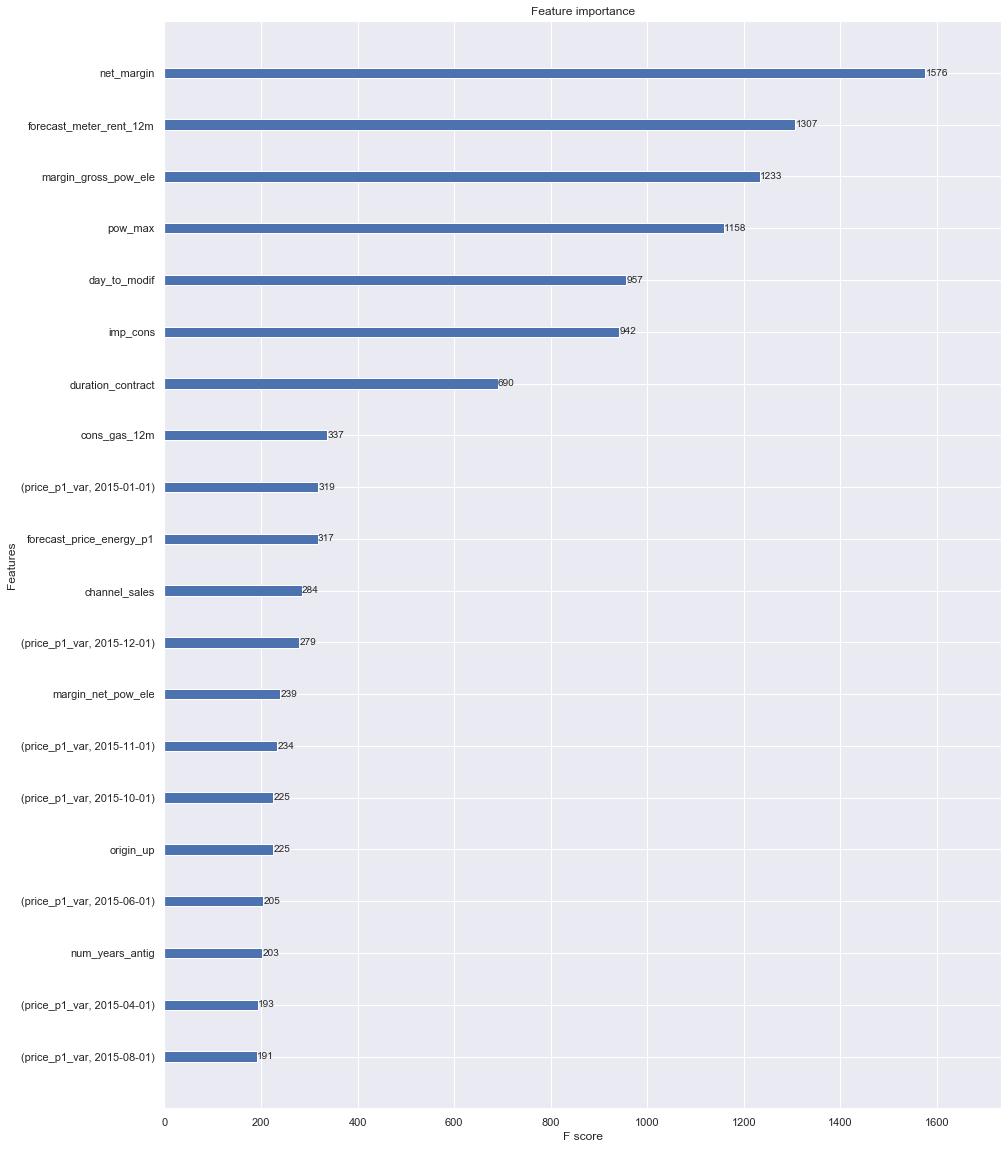

In [688]:
fig, ax = plt.subplots(figsize=(15,20))
xgb.plot_importance(model, ax=ax,max_num_features=20)

In [701]:
predict = GradientBoostingClassifier(criterion="friedman_mse", init=None,
 learning_rate=0.1, loss="deviance", max_depth=3,
 max_features=7, max_leaf_nodes=None,
  min_samples_leaf=9,
 min_samples_split=60, min_weight_fraction_leaf=0.0,
 n_estimators=1750,  random_state=None,
 subsample=0.7, verbose=0, warm_start=False)

In [703]:
predict.fit(X_train, y_train)

GradientBoostingClassifier(max_features=7, min_samples_leaf=9,
                           min_samples_split=60, n_estimators=1750,
                           subsample=0.7)

In [704]:
predictions = predict.predict(X_test)


In [705]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

print('\n accuracy:', accuracy_score(y_test, predictions))

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3135
           1       0.49      0.13      0.20       316

    accuracy                           0.91      3451
   macro avg       0.71      0.56      0.58      3451
weighted avg       0.88      0.91      0.88      3451

Confusion matrix:
[[3094   41]
 [ 276   40]]

 accuracy: 0.9081425673717763


In [159]:
importance = predict.feature_importances_
feat_imp = pd.DataFrame({'Feature': pd.DataFrame(X_train).columns,"importance":importance})
feat_imp.head(20)

,Feature,importance
0,channel_sales,0.007323
1,cons_12m,0.047263
2,cons_gas_12m,0.013110
3,cons_last_month,0.030757
4,forecast_cons_12m,0.038715
5,forecast_cons_year,0.021064
6,forecast_discount_energy,0.001612
7,forecast_meter_rent_12m,0.037336
8,forecast_price_energy_p1,0.019706
9,forecast_price_energy_p2,0.011785
